# Doc2Vec算法

In [1]:
import pandas as pd
import numpy as np
import gensim, logging
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile
import matplotlib.pyplot as plt
import ast

In [2]:
movie_profile = pd.read_csv('movie_profile.csv')
movie_profile

MOVIE_ID                 NAME  \
0       26670818                 情定河州   
1       25815002               我不是李小龙   
2       26392287              曼哈顿中国女孩   
3       26695995                 绿毛水怪   
4       26392292                 为了祖国   
...          ...                  ...   
136447   5108157  Longe da Vista - 电影   
136448   5108126           Phera - 电影   
136449   5108078      Fast Track - 电影   
136450   5108060          7-9-13 - 电影   
136451   1291545              大鱼 - 电影   

                                                  PROFILE  \
0       ['临夏', '宣传伊斯兰教的电影', '甘肃', '伊斯兰', '中国大陆', '2016...   
1                                ['穿越', '华语', '动作', '爱情']   
2                                                  ['剧情']   
3       ['小波', '王小波', '文学改编', '小说改编', '2017', '爱情', '中...   
4                                            ['剧情', '历史']   
...                                                   ...   
136447                                             ['剧情']   
136448                         ['India', '10', '7', '剧情']   
136449                                       ['剧情', '动作']   
136450                                             ['喜剧']   
136451  ['TimBurton', '奇幻', '童话', '魔幻', '亲情', '家庭', '冒...   

                                                  WEIGHTS  
0       {'临夏': 0.5133773014499408, '宣传伊斯兰教的电影': 0.5133...  
1       {'穿越': 0.7136470387832085, '华语': 0.63509936398...  
2                                             {'剧情': 1.0}  
3       {'小波': 0.607881377207677, '王小波': 0.55139953487...  
4                                  {'剧情': 1.0, '历史': 1.0}  
...                                                   ...  
136447                                        {'剧情': 1.0}  
136448  {'India': 0.6037789518421052, '10': 0.56442000...  
136449                             {'剧情': 1.0, '动作': 1.0}  
136450                                        {'喜剧': 1.0}  
136451  {'TimBurton': 0.5760599418067902, '奇幻': 1.0, '...  

[136452 rows x 4 columns]

In [3]:
movie_profile['PROFILE'] = movie_profile['PROFILE'].apply(lambda x: ast.literal_eval(x))
movie_profile

MOVIE_ID                 NAME  \
0       26670818                 情定河州   
1       25815002               我不是李小龙   
2       26392287              曼哈顿中国女孩   
3       26695995                 绿毛水怪   
4       26392292                 为了祖国   
...          ...                  ...   
136447   5108157  Longe da Vista - 电影   
136448   5108126           Phera - 电影   
136449   5108078      Fast Track - 电影   
136450   5108060          7-9-13 - 电影   
136451   1291545              大鱼 - 电影   

                                                  PROFILE  \
0       [临夏, 宣传伊斯兰教的电影, 甘肃, 伊斯兰, 中国大陆, 2016, 烂片, 中国, 爱...   
1                                        [穿越, 华语, 动作, 爱情]   
2                                                    [剧情]   
3                 [小波, 王小波, 文学改编, 小说改编, 2017, 爱情, 中国, 剧情]   
4                                                [剧情, 历史]   
...                                                   ...   
136447                                               [剧情]   
136448                                 [India, 10, 7, 剧情]   
136449                                           [剧情, 动作]   
136450                                               [喜剧]   
136451  [TimBurton, 奇幻, 童话, 魔幻, 亲情, 家庭, 冒险, 美国电影, 剧情, 美国]   

                                                  WEIGHTS  
0       {'临夏': 0.5133773014499408, '宣传伊斯兰教的电影': 0.5133...  
1       {'穿越': 0.7136470387832085, '华语': 0.63509936398...  
2                                             {'剧情': 1.0}  
3       {'小波': 0.607881377207677, '王小波': 0.55139953487...  
4                                  {'剧情': 1.0, '历史': 1.0}  
...                                                   ...  
136447                                        {'剧情': 1.0}  
136448  {'India': 0.6037789518421052, '10': 0.56442000...  
136449                             {'剧情': 1.0, '动作': 1.0}  
136450                                        {'喜剧': 1.0}  
136451  {'TimBurton': 0.5760599418067902, '奇幻': 1.0, '...  

[136452 rows x 4 columns]

In [4]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
documents = [TaggedDocument(words, [movie_id]) for movie_id, words in movie_profile['PROFILE'].iteritems()]
documents

[TaggedDocument(words=['临夏', '宣传伊斯兰教的电影', '甘肃', '伊斯兰', '中国大陆', '2016', '烂片', '中国', '爱情', '剧情'], tags=[0]),
 TaggedDocument(words=['穿越', '华语', '动作', '爱情'], tags=[1]),
 TaggedDocument(words=['剧情'], tags=[2]),
 TaggedDocument(words=['小波', '王小波', '文学改编', '小说改编', '2017', '爱情', '中国', '剧情'], tags=[3]),
 TaggedDocument(words=['剧情', '历史'], tags=[4]),
 TaggedDocument(words=['上映', '张凡夕', '独立', '独立电影', '人性', '爱情', '剧情'], tags=[5]),
 TaggedDocument(words=['漫画小说真人版', '小说改编', '悬疑', '推理', '日本电影', '日本'], tags=[6]),
 TaggedDocument(words=['夏笳', '科幻', '中国'], tags=[7]),
 TaggedDocument(words=['动作', '悬疑', '古装'], tags=[8]),
 TaggedDocument(words=['科幻'], tags=[9]),
 TaggedDocument(words=['科幻'], tags=[10]),
 TaggedDocument(words=['科幻'], tags=[11]),
 TaggedDocument(words=['太空科幻', '行星绿谷', '良心', '国漫', '动画', '科幻', '国产', '动漫', '剧情'], tags=[12]),
 TaggedDocument(words=['2017', '科幻'], tags=[13]),
 TaggedDocument(words=['大陆', '科幻'], tags=[14]),
 TaggedDocument(words=['2033年上映', '2022', '爱情', '美国', '喜剧'], tags=[15]),


### 训练模型和调参

In [6]:
model = Doc2Vec(vector_size=100, window=3, min_count=1, workers=4, epochs=20)

2022-05-25 09:41:31,672 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec(dm/m,d100,n5,w3,s0.001,t4)', 'datetime': '2022-05-25T09:41:31.672132', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}


In [7]:
model.build_vocab(documents)

2022-05-25 09:41:32,647 : INFO : collecting all words and their counts
2022-05-25 09:41:32,648 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2022-05-25 09:41:32,667 : INFO : PROGRESS: at example #10000, processed 58495 words (3026313/s), 8444 word types, 0 tags
2022-05-25 09:41:32,685 : INFO : PROGRESS: at example #20000, processed 119066 words (3610553/s), 14182 word types, 0 tags
2022-05-25 09:41:32,704 : INFO : PROGRESS: at example #30000, processed 182038 words (3475621/s), 20375 word types, 0 tags
2022-05-25 09:41:32,723 : INFO : PROGRESS: at example #40000, processed 247145 words (3407031/s), 27163 word types, 0 tags
2022-05-25 09:41:32,743 : INFO : PROGRESS: at example #50000, processed 310852 words (3467330/s), 33299 word types, 0 tags
2022-05-25 09:41:32,762 : INFO : PROGRESS: at example #60000, processed 372821 words (3323411/s), 38509 word types, 0 tags
2022-05-25 09:41:32,782 : INFO : PROGRESS: at example #70000, processed 432306 words (299

In [8]:
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

2022-05-25 09:41:35,144 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 64868 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=3 shrink_windows=True', 'datetime': '2022-05-25T09:41:35.144965', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'train'}
2022-05-25 09:41:36,360 : INFO : EPOCH 1 - PROGRESS: at 15.84% examples, 89164 words/s, in_qsize 8, out_qsize 0
2022-05-25 09:41:37,503 : INFO : EPOCH 1 - PROGRESS: at 34.24% examples, 101352 words/s, in_qsize 8, out_qsize 0
2022-05-25 09:41:38,530 : INFO : EPOCH 1 - PROGRESS: at 52.23% examples, 107068 words/s, in_qsize 7, out_qsize 0
2022-05-25 09:41:39,540 : INFO : EPOCH 1 - PROGRESS: at 67.04% examples, 103515 words/s, in_qsize 7, out_qsize 0
2022-05-25 09:41:40,769 : INFO : EPOCH 1 - PROGRESS: at 83.21% examples, 101324 words/s, in_qsize 8, out_qsize 0
2022-05-25 09:41:41,502 : INFO : 

2022-05-25 09:42:23,062 : INFO : EPOCH 8 - PROGRESS: at 34.24% examples, 98830 words/s, in_qsize 7, out_qsize 0
2022-05-25 09:42:24,066 : INFO : EPOCH 8 - PROGRESS: at 49.71% examples, 100940 words/s, in_qsize 8, out_qsize 0
2022-05-25 09:42:25,069 : INFO : EPOCH 8 - PROGRESS: at 67.70% examples, 102802 words/s, in_qsize 8, out_qsize 0
2022-05-25 09:42:26,271 : INFO : EPOCH 8 - PROGRESS: at 83.21% examples, 101230 words/s, in_qsize 7, out_qsize 0
2022-05-25 09:42:27,114 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 09:42:27,135 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 09:42:27,155 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 09:42:27,169 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 09:42:27,170 : INFO : EPOCH - 8 : training on 804638 raw words (663385 effective words) took 6.5s, 101961 effective words/s
2022-05-25 09:42:28,413 : INFO : EPOCH 9 - PROGRES

2022-05-25 09:43:12,552 : INFO : EPOCH 15 - PROGRESS: at 81.72% examples, 102648 words/s, in_qsize 7, out_qsize 0
2022-05-25 09:43:13,507 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 09:43:13,535 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 09:43:13,574 : INFO : EPOCH 15 - PROGRESS: at 97.77% examples, 101270 words/s, in_qsize 1, out_qsize 1
2022-05-25 09:43:13,575 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 09:43:13,581 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 09:43:13,582 : INFO : EPOCH - 15 : training on 804638 raw words (663212 effective words) took 6.5s, 102419 effective words/s
2022-05-25 09:43:14,605 : INFO : EPOCH 16 - PROGRESS: at 12.34% examples, 80887 words/s, in_qsize 8, out_qsize 0
2022-05-25 09:43:15,809 : INFO : EPOCH 16 - PROGRESS: at 29.63% examples, 92236 words/s, in_qsize 8, out_qsize 0
2022-05-25 09:43:16,833 : INFO : EPOCH 16 - PR

In [9]:
most_similarity = 0
doc_similarities = []
for doc_id in range(len(documents)):
    inferred_vector = model.infer_vector(documents[doc_id].words)
    sims = model.dv.most_similar([inferred_vector], topn=1)
    if sims[0][0] == doc_id:
        most_similarity = most_similarity + 1
    doc_similarities.append(inferred_vector.dot(model.dv[doc_id] / (np.linalg.norm(inferred_vector) * np.linalg.norm(model.dv[doc_id]))))

In [10]:
most_similarity / len(documents)

0.27087180840148917

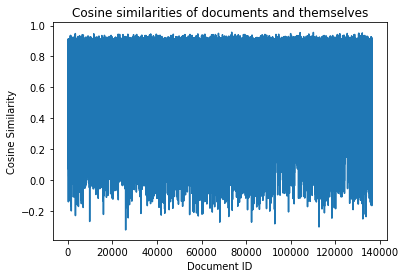

In [12]:
plt.plot(range(len(documents)), doc_similarities)
plt.xlabel('Document ID')
plt.ylabel('Cosine Similarity')
plt.title('Cosine similarities of documents and themselves')
plt.show()

In [13]:
model = Doc2Vec(vector_size=100, window=3, min_count=1, workers=4, epochs=40)

2022-05-25 11:24:15,206 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec(dm/m,d100,n5,w3,s0.001,t4)', 'datetime': '2022-05-25T11:24:15.206994', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}


In [14]:
model.build_vocab(documents)

2022-05-25 11:24:16,509 : INFO : collecting all words and their counts
2022-05-25 11:24:16,509 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2022-05-25 11:24:16,537 : INFO : PROGRESS: at example #10000, processed 58495 words (2226921/s), 8444 word types, 0 tags
2022-05-25 11:24:16,553 : INFO : PROGRESS: at example #20000, processed 119066 words (3744845/s), 14182 word types, 0 tags
2022-05-25 11:24:16,585 : INFO : PROGRESS: at example #30000, processed 182038 words (2047097/s), 20375 word types, 0 tags
2022-05-25 11:24:16,604 : INFO : PROGRESS: at example #40000, processed 247145 words (3530748/s), 27163 word types, 0 tags
2022-05-25 11:24:16,624 : INFO : PROGRESS: at example #50000, processed 310852 words (3318574/s), 33299 word types, 0 tags
2022-05-25 11:24:16,646 : INFO : PROGRESS: at example #60000, processed 372821 words (2799757/s), 38509 word types, 0 tags
2022-05-25 11:24:16,664 : INFO : PROGRESS: at example #70000, processed 432306 words (349

In [15]:
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

2022-05-25 11:24:19,535 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 64868 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=3 shrink_windows=True', 'datetime': '2022-05-25T11:24:19.535166', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'train'}
2022-05-25 11:24:20,563 : INFO : EPOCH 1 - PROGRESS: at 12.34% examples, 81605 words/s, in_qsize 7, out_qsize 0
2022-05-25 11:24:21,750 : INFO : EPOCH 1 - PROGRESS: at 29.63% examples, 93309 words/s, in_qsize 7, out_qsize 0
2022-05-25 11:24:22,761 : INFO : EPOCH 1 - PROGRESS: at 44.84% examples, 96842 words/s, in_qsize 8, out_qsize 0
2022-05-25 11:24:23,772 : INFO : EPOCH 1 - PROGRESS: at 60.09% examples, 97662 words/s, in_qsize 8, out_qsize 0
2022-05-25 11:24:24,805 : INFO : EPOCH 1 - PROGRESS: at 76.83% examples, 100193 words/s, in_qsize 8, out_qsize 0
2022-05-25 11:24:25,969 : INFO : EPO

2022-05-25 11:25:05,648 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 11:25:05,648 : INFO : EPOCH - 7 : training on 804638 raw words (663253 effective words) took 6.6s, 99790 effective words/s
2022-05-25 11:25:06,674 : INFO : EPOCH 8 - PROGRESS: at 13.50% examples, 88942 words/s, in_qsize 8, out_qsize 0
2022-05-25 11:25:07,892 : INFO : EPOCH 8 - PROGRESS: at 29.63% examples, 91682 words/s, in_qsize 7, out_qsize 0
2022-05-25 11:25:08,915 : INFO : EPOCH 8 - PROGRESS: at 47.22% examples, 100326 words/s, in_qsize 7, out_qsize 0
2022-05-25 11:25:09,920 : INFO : EPOCH 8 - PROGRESS: at 61.54% examples, 98609 words/s, in_qsize 7, out_qsize 0
2022-05-25 11:25:11,107 : INFO : EPOCH 8 - PROGRESS: at 77.95% examples, 98075 words/s, in_qsize 8, out_qsize 0
2022-05-25 11:25:12,132 : INFO : EPOCH 8 - PROGRESS: at 95.05% examples, 99293 words/s, in_qsize 3, out_qsize 1
2022-05-25 11:25:12,133 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 

2022-05-25 11:25:54,165 : INFO : EPOCH 15 - PROGRESS: at 33.13% examples, 99896 words/s, in_qsize 7, out_qsize 0
2022-05-25 11:25:55,324 : INFO : EPOCH 15 - PROGRESS: at 48.47% examples, 97059 words/s, in_qsize 8, out_qsize 0
2022-05-25 11:25:56,465 : INFO : EPOCH 15 - PROGRESS: at 64.74% examples, 95104 words/s, in_qsize 7, out_qsize 0
2022-05-25 11:25:57,534 : INFO : EPOCH 15 - PROGRESS: at 81.72% examples, 98853 words/s, in_qsize 8, out_qsize 0
2022-05-25 11:25:58,456 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 11:25:58,483 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 11:25:58,538 : INFO : EPOCH 15 - PROGRESS: at 97.77% examples, 98356 words/s, in_qsize 1, out_qsize 1
2022-05-25 11:25:58,538 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 11:25:58,557 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 11:25:58,557 : INFO : EPOCH - 15 : training on 804638 raw wo

2022-05-25 11:26:43,991 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 11:26:44,039 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 11:26:44,074 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 11:26:44,078 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 11:26:44,079 : INFO : EPOCH - 22 : training on 804638 raw words (663016 effective words) took 6.5s, 102387 effective words/s
2022-05-25 11:26:45,304 : INFO : EPOCH 23 - PROGRESS: at 15.84% examples, 87969 words/s, in_qsize 7, out_qsize 0
2022-05-25 11:26:46,547 : INFO : EPOCH 23 - PROGRESS: at 34.24% examples, 96541 words/s, in_qsize 8, out_qsize 0
2022-05-25 11:26:47,802 : INFO : EPOCH 23 - PROGRESS: at 53.53% examples, 99428 words/s, in_qsize 8, out_qsize 0
2022-05-25 11:26:48,839 : INFO : EPOCH 23 - PROGRESS: at 72.61% examples, 103871 words/s, in_qsize 8, out_qsize 0
2022-05-25 11:26:49,857 : INFO : EPOCH 23 - PRO

2022-05-25 11:27:32,931 : INFO : EPOCH 30 - PROGRESS: at 50.98% examples, 101923 words/s, in_qsize 7, out_qsize 0
2022-05-25 11:27:33,939 : INFO : EPOCH 30 - PROGRESS: at 68.71% examples, 103318 words/s, in_qsize 8, out_qsize 0
2022-05-25 11:27:35,130 : INFO : EPOCH 30 - PROGRESS: at 83.21% examples, 100400 words/s, in_qsize 8, out_qsize 0
2022-05-25 11:27:35,800 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 11:27:35,835 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 11:27:35,885 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 11:27:35,889 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 11:27:35,890 : INFO : EPOCH - 30 : training on 804638 raw words (663149 effective words) took 6.4s, 103441 effective words/s
2022-05-25 11:27:37,119 : INFO : EPOCH 31 - PROGRESS: at 15.84% examples, 87506 words/s, in_qsize 7, out_qsize 0
2022-05-25 11:27:38,322 : INFO : EPOCH 31 - P

2022-05-25 11:28:21,435 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 11:28:21,436 : INFO : EPOCH - 37 : training on 804638 raw words (663118 effective words) took 6.5s, 102124 effective words/s
2022-05-25 11:28:22,470 : INFO : EPOCH 38 - PROGRESS: at 13.50% examples, 88222 words/s, in_qsize 8, out_qsize 0
2022-05-25 11:28:23,642 : INFO : EPOCH 38 - PROGRESS: at 29.63% examples, 93287 words/s, in_qsize 8, out_qsize 0
2022-05-25 11:28:24,684 : INFO : EPOCH 38 - PROGRESS: at 47.22% examples, 100930 words/s, in_qsize 8, out_qsize 0
2022-05-25 11:28:25,735 : INFO : EPOCH 38 - PROGRESS: at 63.07% examples, 99912 words/s, in_qsize 8, out_qsize 0
2022-05-25 11:28:26,849 : INFO : EPOCH 38 - PROGRESS: at 77.95% examples, 98921 words/s, in_qsize 8, out_qsize 0
2022-05-25 11:28:27,952 : INFO : EPOCH 38 - PROGRESS: at 95.05% examples, 98790 words/s, in_qsize 3, out_qsize 1
2022-05-25 11:28:27,953 : INFO : worker thread finished; awaiting finish of 3 more threads
202

In [16]:
most_similarity = 0
doc_similarities = []
for doc_id in range(len(documents)):
    inferred_vector = model.infer_vector(documents[doc_id].words)
    sims = model.dv.most_similar([inferred_vector], topn=1)
    if sims[0][0] == doc_id:
        most_similarity = most_similarity + 1
    doc_similarities.append(inferred_vector.dot(model.dv[doc_id] / (np.linalg.norm(inferred_vector) * np.linalg.norm(model.dv[doc_id]))))

In [17]:
most_similarity / len(documents)

0.44561457508867586

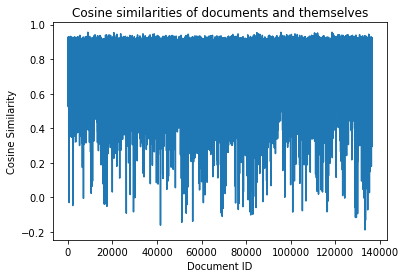

In [18]:
plt.plot(range(len(documents)), doc_similarities)
plt.xlabel('Document ID')
plt.ylabel('Cosine Similarity')
plt.title('Cosine similarities of documents and themselves')
plt.show()

In [31]:
model = Doc2Vec(vector_size=100, window=3, min_count=1, workers=4, epochs=100)

2022-05-25 13:06:35,444 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec(dm/m,d100,n5,w3,s0.001,t4)', 'datetime': '2022-05-25T13:06:35.443728', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}


In [32]:
model.build_vocab(documents)

2022-05-25 13:06:36,018 : INFO : collecting all words and their counts
2022-05-25 13:06:36,019 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2022-05-25 13:06:36,043 : INFO : PROGRESS: at example #10000, processed 58495 words (2590016/s), 8444 word types, 0 tags
2022-05-25 13:06:36,060 : INFO : PROGRESS: at example #20000, processed 119066 words (3743410/s), 14182 word types, 0 tags
2022-05-25 13:06:36,077 : INFO : PROGRESS: at example #30000, processed 182038 words (3784102/s), 20375 word types, 0 tags
2022-05-25 13:06:36,096 : INFO : PROGRESS: at example #40000, processed 247145 words (3710265/s), 27163 word types, 0 tags
2022-05-25 13:06:36,114 : INFO : PROGRESS: at example #50000, processed 310852 words (3471846/s), 33299 word types, 0 tags
2022-05-25 13:06:36,132 : INFO : PROGRESS: at example #60000, processed 372821 words (3449045/s), 38509 word types, 0 tags
2022-05-25 13:06:36,152 : INFO : PROGRESS: at example #70000, processed 432306 words (313

In [33]:
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

2022-05-25 13:06:37,459 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 64868 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=3 shrink_windows=True', 'datetime': '2022-05-25T13:06:37.459906', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'train'}
2022-05-25 13:06:38,486 : INFO : EPOCH 1 - PROGRESS: at 14.76% examples, 97514 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:06:39,600 : INFO : EPOCH 1 - PROGRESS: at 29.63% examples, 96417 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:06:40,632 : INFO : EPOCH 1 - PROGRESS: at 45.98% examples, 100865 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:06:41,645 : INFO : EPOCH 1 - PROGRESS: at 61.54% examples, 100771 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:06:42,834 : INFO : EPOCH 1 - PROGRESS: at 78.07% examples, 99688 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:06:43,909 : INFO : EP

2022-05-25 13:07:25,916 : INFO : EPOCH 8 - PROGRESS: at 53.53% examples, 101404 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:07:27,095 : INFO : EPOCH 8 - PROGRESS: at 73.71% examples, 104078 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:07:28,107 : INFO : EPOCH 8 - PROGRESS: at 90.15% examples, 104575 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:07:28,480 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:07:28,491 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:07:28,523 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:07:28,535 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:07:28,536 : INFO : EPOCH - 8 : training on 804638 raw words (663599 effective words) took 6.3s, 106044 effective words/s
2022-05-25 13:07:29,803 : INFO : EPOCH 9 - PROGRESS: at 15.84% examples, 84949 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:07:30,975 : INFO : EPOCH 9 - PROGRES

2022-05-25 13:08:15,114 : INFO : EPOCH 15 - PROGRESS: at 11.20% examples, 66838 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:08:16,355 : INFO : EPOCH 15 - PROGRESS: at 29.63% examples, 87285 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:08:17,607 : INFO : EPOCH 15 - PROGRESS: at 48.47% examples, 93106 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:08:18,633 : INFO : EPOCH 15 - PROGRESS: at 64.35% examples, 94460 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:08:19,696 : INFO : EPOCH 15 - PROGRESS: at 81.72% examples, 98449 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:08:20,635 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:08:20,651 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:08:20,683 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:08:20,701 : INFO : EPOCH 15 - PROGRESS: at 100.00% examples, 99229 words/s, in_qsize 0, out_qsize 1
2022-05-25 13:08:20,701 : INFO : worker thread f

2022-05-25 13:09:04,834 : INFO : EPOCH 22 - PROGRESS: at 83.21% examples, 101010 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:09:05,598 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:09:05,620 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:09:05,651 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:09:05,665 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:09:05,665 : INFO : EPOCH - 22 : training on 804638 raw words (663507 effective words) took 6.4s, 102877 effective words/s
2022-05-25 13:09:06,908 : INFO : EPOCH 23 - PROGRESS: at 15.84% examples, 86517 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:09:08,130 : INFO : EPOCH 23 - PROGRESS: at 34.24% examples, 96590 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:09:09,440 : INFO : EPOCH 23 - PROGRESS: at 53.53% examples, 97975 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:09:10,480 : INFO : EPOCH 23 - PRO

2022-05-25 13:09:51,852 : INFO : EPOCH 30 - PROGRESS: at 14.76% examples, 98119 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:09:52,955 : INFO : EPOCH 30 - PROGRESS: at 29.63% examples, 97196 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:09:53,959 : INFO : EPOCH 30 - PROGRESS: at 47.22% examples, 104971 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:09:54,969 : INFO : EPOCH 30 - PROGRESS: at 61.54% examples, 101948 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:09:56,114 : INFO : EPOCH 30 - PROGRESS: at 77.95% examples, 101446 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:09:57,116 : INFO : EPOCH 30 - PROGRESS: at 93.52% examples, 101202 words/s, in_qsize 4, out_qsize 0
2022-05-25 13:09:57,318 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:09:57,346 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:09:57,383 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:09:57,388 : INFO : worker threa

2022-05-25 13:10:41,820 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:10:41,838 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:10:41,889 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:10:41,900 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:10:41,901 : INFO : EPOCH - 37 : training on 804638 raw words (663661 effective words) took 6.3s, 106179 effective words/s
2022-05-25 13:10:42,913 : INFO : EPOCH 38 - PROGRESS: at 11.20% examples, 73632 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:10:43,919 : INFO : EPOCH 38 - PROGRESS: at 28.49% examples, 97858 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:10:45,034 : INFO : EPOCH 38 - PROGRESS: at 43.64% examples, 96644 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:10:46,086 : INFO : EPOCH 38 - PROGRESS: at 61.54% examples, 100631 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:10:47,090 : INFO : EPOCH 38 - PRO

2022-05-25 13:11:28,167 : INFO : EPOCH 45 - PROGRESS: at 14.76% examples, 98086 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:11:29,339 : INFO : EPOCH 45 - PROGRESS: at 29.63% examples, 93995 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:11:30,349 : INFO : EPOCH 45 - PROGRESS: at 44.84% examples, 97236 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:11:31,368 : INFO : EPOCH 45 - PROGRESS: at 61.54% examples, 99846 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:11:32,398 : INFO : EPOCH 45 - PROGRESS: at 76.83% examples, 100397 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:11:33,563 : INFO : EPOCH 45 - PROGRESS: at 93.52% examples, 99057 words/s, in_qsize 4, out_qsize 0
2022-05-25 13:11:33,654 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:11:33,709 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:11:33,739 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:11:33,746 : INFO : worker thread f

2022-05-25 13:12:18,398 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:12:18,415 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:12:18,466 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:12:18,472 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:12:18,472 : INFO : EPOCH - 52 : training on 804638 raw words (663097 effective words) took 6.4s, 102864 effective words/s
2022-05-25 13:12:19,716 : INFO : EPOCH 53 - PROGRESS: at 15.84% examples, 86627 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:12:20,931 : INFO : EPOCH 53 - PROGRESS: at 34.24% examples, 96825 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:12:21,937 : INFO : EPOCH 53 - PROGRESS: at 48.47% examples, 96916 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:12:23,039 : INFO : EPOCH 53 - PROGRESS: at 64.35% examples, 95771 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:12:24,264 : INFO : EPOCH 53 - PROG

2022-05-25 13:13:07,243 : INFO : EPOCH 60 - PROGRESS: at 52.23% examples, 105852 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:13:08,249 : INFO : EPOCH 60 - PROGRESS: at 68.71% examples, 104562 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:13:09,460 : INFO : EPOCH 60 - PROGRESS: at 83.21% examples, 101050 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:13:10,190 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:13:10,234 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:13:10,242 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:13:10,257 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:13:10,258 : INFO : EPOCH - 60 : training on 804638 raw words (663675 effective words) took 6.4s, 103421 effective words/s
2022-05-25 13:13:11,468 : INFO : EPOCH 61 - PROGRESS: at 15.84% examples, 88794 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:13:12,589 : INFO : EPOCH 61 - P

2022-05-25 13:13:55,448 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:13:55,459 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:13:55,460 : INFO : EPOCH - 67 : training on 804638 raw words (663194 effective words) took 6.5s, 102393 effective words/s
2022-05-25 13:13:56,734 : INFO : EPOCH 68 - PROGRESS: at 15.84% examples, 84694 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:13:57,738 : INFO : EPOCH 68 - PROGRESS: at 33.13% examples, 101261 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:13:58,843 : INFO : EPOCH 68 - PROGRESS: at 48.47% examples, 99466 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:14:00,020 : INFO : EPOCH 68 - PROGRESS: at 64.74% examples, 96028 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:14:01,029 : INFO : EPOCH 68 - PROGRESS: at 81.72% examples, 100684 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:14:01,957 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:14:01,965 

2022-05-25 13:14:43,585 : INFO : EPOCH 75 - PROGRESS: at 47.22% examples, 104817 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:14:44,776 : INFO : EPOCH 75 - PROGRESS: at 64.74% examples, 101367 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:14:45,966 : INFO : EPOCH 75 - PROGRESS: at 83.21% examples, 103310 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:14:46,724 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:14:46,744 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:14:46,770 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:14:46,781 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:14:46,781 : INFO : EPOCH - 75 : training on 804638 raw words (663325 effective words) took 6.3s, 105137 effective words/s
2022-05-25 13:14:47,993 : INFO : EPOCH 76 - PROGRESS: at 15.84% examples, 88902 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:14:48,998 : INFO : EPOCH 76 - P

2022-05-25 13:15:31,627 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:15:31,638 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:15:31,639 : INFO : EPOCH - 82 : training on 804638 raw words (663221 effective words) took 6.4s, 103005 effective words/s
2022-05-25 13:15:32,909 : INFO : EPOCH 83 - PROGRESS: at 15.84% examples, 84663 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:15:34,126 : INFO : EPOCH 83 - PROGRESS: at 34.24% examples, 95687 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:15:35,137 : INFO : EPOCH 83 - PROGRESS: at 48.47% examples, 95983 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:15:36,208 : INFO : EPOCH 83 - PROGRESS: at 64.35% examples, 95751 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:15:37,223 : INFO : EPOCH 83 - PROGRESS: at 81.72% examples, 100364 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:15:38,154 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:15:38,177 :

2022-05-25 13:16:19,098 : INFO : EPOCH 90 - PROGRESS: at 34.24% examples, 99526 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:16:20,111 : INFO : EPOCH 90 - PROGRESS: at 49.71% examples, 101187 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:16:21,155 : INFO : EPOCH 90 - PROGRESS: at 64.35% examples, 98357 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:16:22,403 : INFO : EPOCH 90 - PROGRESS: at 83.21% examples, 99840 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:16:23,111 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:16:23,134 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:16:23,167 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:16:23,180 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:16:23,180 : INFO : EPOCH - 90 : training on 804638 raw words (663670 effective words) took 6.5s, 102654 effective words/s
2022-05-25 13:16:24,211 : INFO : EPOCH 91 - PRO

2022-05-25 13:17:09,030 : INFO : EPOCH 97 - PROGRESS: at 89.05% examples, 94489 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:17:09,520 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:17:09,522 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:17:09,568 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:17:09,585 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:17:09,585 : INFO : EPOCH - 97 : training on 804638 raw words (663377 effective words) took 6.9s, 95904 effective words/s
2022-05-25 13:17:10,643 : INFO : EPOCH 98 - PROGRESS: at 11.20% examples, 70470 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:17:11,822 : INFO : EPOCH 98 - PROGRESS: at 29.63% examples, 91954 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:17:12,842 : INFO : EPOCH 98 - PROGRESS: at 44.84% examples, 95503 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:17:13,869 : INFO : EPOCH 98 - PROGR

In [34]:
most_similarity = 0
doc_similarities = []
for doc_id in range(len(documents)):
    inferred_vector = model.infer_vector(documents[doc_id].words)
    sims = model.dv.most_similar([inferred_vector], topn=1)
    if sims[0][0] == doc_id:
        most_similarity = most_similarity + 1
    doc_similarities.append(inferred_vector.dot(model.dv[doc_id] / (np.linalg.norm(inferred_vector) * np.linalg.norm(model.dv[doc_id]))))

In [35]:
most_similarity / len(documents)

0.5983789171283674

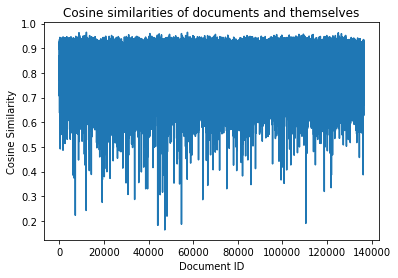

In [36]:
plt.plot(range(len(documents)), doc_similarities)
plt.xlabel('Document ID')
plt.ylabel('Cosine Similarity')
plt.title('Cosine similarities of documents and themselves')
plt.show()

In [37]:
model = Doc2Vec(vector_size=100, window=3, min_count=10, workers=4, epochs=100)

2022-05-25 13:32:55,758 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec(dm/m,d100,n5,w3,mc10,s0.001,t4)', 'datetime': '2022-05-25T13:32:55.758026', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}


In [38]:
model.build_vocab(documents)

2022-05-25 13:32:55,797 : INFO : collecting all words and their counts
2022-05-25 13:32:55,799 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2022-05-25 13:32:55,851 : INFO : PROGRESS: at example #10000, processed 58495 words (1164167/s), 8444 word types, 0 tags
2022-05-25 13:32:55,887 : INFO : PROGRESS: at example #20000, processed 119066 words (1737575/s), 14182 word types, 0 tags
2022-05-25 13:32:55,915 : INFO : PROGRESS: at example #30000, processed 182038 words (2335089/s), 20375 word types, 0 tags
2022-05-25 13:32:55,934 : INFO : PROGRESS: at example #40000, processed 247145 words (3572557/s), 27163 word types, 0 tags
2022-05-25 13:32:55,952 : INFO : PROGRESS: at example #50000, processed 310852 words (3650140/s), 33299 word types, 0 tags
2022-05-25 13:32:55,970 : INFO : PROGRESS: at example #60000, processed 372821 words (3648089/s), 38509 word types, 0 tags
2022-05-25 13:32:55,989 : INFO : PROGRESS: at example #70000, processed 432306 words (327

In [39]:
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

2022-05-25 13:32:56,304 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 4295 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=3 shrink_windows=True', 'datetime': '2022-05-25T13:32:56.304073', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'train'}
2022-05-25 13:32:57,583 : INFO : EPOCH 1 - PROGRESS: at 15.84% examples, 69358 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:32:58,792 : INFO : EPOCH 1 - PROGRESS: at 34.24% examples, 78428 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:32:59,803 : INFO : EPOCH 1 - PROGRESS: at 49.71% examples, 80700 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:33:00,899 : INFO : EPOCH 1 - PROGRESS: at 64.74% examples, 78651 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:33:01,902 : INFO : EPOCH 1 - PROGRESS: at 81.72% examples, 82830 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:33:02,976 : INFO : EPOCH

2022-05-25 13:33:44,518 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:33:44,519 : INFO : EPOCH - 7 : training on 804638 raw words (548928 effective words) took 7.0s, 78393 effective words/s
2022-05-25 13:33:45,551 : INFO : EPOCH 8 - PROGRESS: at 13.50% examples, 72872 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:33:46,717 : INFO : EPOCH 8 - PROGRESS: at 29.63% examples, 76850 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:33:47,743 : INFO : EPOCH 8 - PROGRESS: at 44.84% examples, 79012 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:33:48,809 : INFO : EPOCH 8 - PROGRESS: at 58.76% examples, 77573 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:33:49,887 : INFO : EPOCH 8 - PROGRESS: at 76.83% examples, 81158 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:33:50,959 : INFO : EPOCH 8 - PROGRESS: at 89.94% examples, 78484 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:33:51,337 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 1

2022-05-25 13:34:32,177 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:34:32,178 : INFO : EPOCH - 14 : training on 804638 raw words (549036 effective words) took 6.7s, 81618 effective words/s
2022-05-25 13:34:33,232 : INFO : EPOCH 15 - PROGRESS: at 11.20% examples, 58188 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:34:34,237 : INFO : EPOCH 15 - PROGRESS: at 25.22% examples, 69265 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:34:35,278 : INFO : EPOCH 15 - PROGRESS: at 40.04% examples, 73436 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:34:36,293 : INFO : EPOCH 15 - PROGRESS: at 54.84% examples, 75553 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:34:37,347 : INFO : EPOCH 15 - PROGRESS: at 69.64% examples, 75190 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:34:38,534 : INFO : EPOCH 15 - PROGRESS: at 89.05% examples, 78462 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:34:38,999 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-

2022-05-25 13:35:19,934 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:35:19,935 : INFO : EPOCH - 21 : training on 804638 raw words (548948 effective words) took 6.9s, 79845 effective words/s
2022-05-25 13:35:21,197 : INFO : EPOCH 22 - PROGRESS: at 15.84% examples, 70144 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:35:22,419 : INFO : EPOCH 22 - PROGRESS: at 34.24% examples, 78377 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:35:23,459 : INFO : EPOCH 22 - PROGRESS: at 49.71% examples, 79950 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:35:24,532 : INFO : EPOCH 22 - PROGRESS: at 64.35% examples, 78412 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:35:25,725 : INFO : EPOCH 22 - PROGRESS: at 83.21% examples, 81175 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:35:26,479 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:35:26,505 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:35:26,529 : I

2022-05-25 13:36:08,092 : INFO : EPOCH - 28 : training on 804638 raw words (549044 effective words) took 6.9s, 79378 effective words/s
2022-05-25 13:36:09,111 : INFO : EPOCH 29 - PROGRESS: at 12.34% examples, 66726 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:36:10,350 : INFO : EPOCH 29 - PROGRESS: at 29.63% examples, 74587 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:36:11,361 : INFO : EPOCH 29 - PROGRESS: at 44.84% examples, 77762 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:36:12,391 : INFO : EPOCH 29 - PROGRESS: at 60.09% examples, 78996 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:36:13,414 : INFO : EPOCH 29 - PROGRESS: at 73.55% examples, 77949 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:36:14,461 : INFO : EPOCH 29 - PROGRESS: at 89.94% examples, 79299 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:36:14,871 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:36:14,909 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-

2022-05-25 13:36:56,319 : INFO : EPOCH 36 - PROGRESS: at 11.20% examples, 58590 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:36:57,326 : INFO : EPOCH 36 - PROGRESS: at 28.49% examples, 78982 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:36:58,490 : INFO : EPOCH 36 - PROGRESS: at 43.64% examples, 76934 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:36:59,582 : INFO : EPOCH 36 - PROGRESS: at 58.76% examples, 77176 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:37:00,654 : INFO : EPOCH 36 - PROGRESS: at 73.71% examples, 77179 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:37:01,715 : INFO : EPOCH 36 - PROGRESS: at 89.94% examples, 78459 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:37:02,060 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:37:02,103 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:37:02,113 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:37:02,126 : INFO : worker thread fi

2022-05-25 13:37:44,044 : INFO : EPOCH 43 - PROGRESS: at 11.17% examples, 54971 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:37:45,064 : INFO : EPOCH 43 - PROGRESS: at 28.49% examples, 76031 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:37:46,144 : INFO : EPOCH 43 - PROGRESS: at 43.64% examples, 77084 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:37:47,175 : INFO : EPOCH 43 - PROGRESS: at 58.76% examples, 78362 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:37:48,200 : INFO : EPOCH 43 - PROGRESS: at 73.71% examples, 78806 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:37:49,207 : INFO : EPOCH 43 - PROGRESS: at 89.94% examples, 80509 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:37:49,613 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:37:49,651 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:37:49,669 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:37:49,680 : INFO : worker thread fi

2022-05-25 13:38:32,925 : INFO : EPOCH 50 - PROGRESS: at 43.64% examples, 77207 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:38:33,950 : INFO : EPOCH 50 - PROGRESS: at 58.76% examples, 78544 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:38:34,984 : INFO : EPOCH 50 - PROGRESS: at 73.71% examples, 78832 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:38:36,009 : INFO : EPOCH 50 - PROGRESS: at 89.05% examples, 79224 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:38:36,457 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:38:36,500 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:38:36,511 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:38:36,521 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:38:36,522 : INFO : EPOCH - 50 : training on 804638 raw words (548956 effective words) took 6.8s, 80888 effective words/s
2022-05-25 13:38:37,580 : INFO : EPOCH 51 - PROGR

2022-05-25 13:39:22,565 : INFO : EPOCH 57 - PROGRESS: at 77.95% examples, 79617 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:39:23,579 : INFO : EPOCH 57 - PROGRESS: at 93.52% examples, 79917 words/s, in_qsize 4, out_qsize 0
2022-05-25 13:39:23,717 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:39:23,763 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:39:23,788 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:39:23,799 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:39:23,800 : INFO : EPOCH - 57 : training on 804638 raw words (548884 effective words) took 6.8s, 80982 effective words/s
2022-05-25 13:39:24,817 : INFO : EPOCH 58 - PROGRESS: at 14.76% examples, 80814 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:39:26,047 : INFO : EPOCH 58 - PROGRESS: at 29.63% examples, 75203 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:39:27,107 : INFO : EPOCH 58 - PROGR

2022-05-25 13:40:10,106 : INFO : EPOCH 64 - PROGRESS: at 76.83% examples, 82291 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:40:11,187 : INFO : EPOCH 64 - PROGRESS: at 93.52% examples, 82432 words/s, in_qsize 4, out_qsize 0
2022-05-25 13:40:11,349 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:40:11,390 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:40:11,404 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:40:11,416 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:40:11,416 : INFO : EPOCH - 64 : training on 804638 raw words (548781 effective words) took 6.6s, 83327 effective words/s
2022-05-25 13:40:12,448 : INFO : EPOCH 65 - PROGRESS: at 11.17% examples, 59402 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:40:13,481 : INFO : EPOCH 65 - PROGRESS: at 26.28% examples, 72173 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:40:14,510 : INFO : EPOCH 65 - PROGR

2022-05-25 13:40:58,006 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:40:58,038 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:40:58,082 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:40:58,093 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:40:58,093 : INFO : EPOCH - 71 : training on 804638 raw words (548472 effective words) took 6.8s, 80252 effective words/s
2022-05-25 13:40:59,114 : INFO : EPOCH 72 - PROGRESS: at 12.34% examples, 66554 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:41:00,119 : INFO : EPOCH 72 - PROGRESS: at 26.28% examples, 73339 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:41:01,335 : INFO : EPOCH 72 - PROGRESS: at 43.64% examples, 76295 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:41:02,357 : INFO : EPOCH 72 - PROGRESS: at 61.54% examples, 81347 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:41:03,401 : INFO : EPOCH 72 - PROGR

2022-05-25 13:41:45,791 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:41:45,818 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:41:45,857 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:41:45,867 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:41:45,868 : INFO : EPOCH - 78 : training on 804638 raw words (549324 effective words) took 7.0s, 78881 effective words/s
2022-05-25 13:41:46,945 : INFO : EPOCH 79 - PROGRESS: at 11.20% examples, 56828 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:41:48,149 : INFO : EPOCH 79 - PROGRESS: at 29.63% examples, 74017 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:41:49,206 : INFO : EPOCH 79 - PROGRESS: at 43.64% examples, 74223 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:41:50,251 : INFO : EPOCH 79 - PROGRESS: at 58.76% examples, 75873 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:41:51,278 : INFO : EPOCH 79 - PROGR

2022-05-25 13:42:33,419 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:42:33,473 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:42:33,478 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:42:33,495 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:42:33,496 : INFO : EPOCH - 85 : training on 804638 raw words (549194 effective words) took 6.8s, 80761 effective words/s
2022-05-25 13:42:34,504 : INFO : EPOCH 86 - PROGRESS: at 13.50% examples, 74095 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:42:35,628 : INFO : EPOCH 86 - PROGRESS: at 29.63% examples, 78944 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:42:36,630 : INFO : EPOCH 86 - PROGRESS: at 43.64% examples, 78739 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:42:37,654 : INFO : EPOCH 86 - PROGRESS: at 58.76% examples, 79801 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:42:38,665 : INFO : EPOCH 86 - PROGR

2022-05-25 13:43:21,396 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:43:21,410 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:43:21,425 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:43:21,426 : INFO : EPOCH - 92 : training on 804638 raw words (549548 effective words) took 7.0s, 79068 effective words/s
2022-05-25 13:43:22,443 : INFO : EPOCH 93 - PROGRESS: at 12.34% examples, 66827 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:43:23,460 : INFO : EPOCH 93 - PROGRESS: at 26.28% examples, 73235 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:43:24,642 : INFO : EPOCH 93 - PROGRESS: at 43.64% examples, 76987 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:43:25,657 : INFO : EPOCH 93 - PROGRESS: at 60.09% examples, 80297 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:43:26,669 : INFO : EPOCH 93 - PROGRESS: at 75.65% examples, 81667 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:43:27,683 : I

2022-05-25 13:44:12,156 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:44:12,166 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:44:12,194 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:44:12,212 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:44:12,213 : INFO : EPOCH - 99 : training on 804638 raw words (548974 effective words) took 7.3s, 75017 effective words/s
2022-05-25 13:44:13,261 : INFO : EPOCH 100 - PROGRESS: at 11.20% examples, 58237 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:44:14,268 : INFO : EPOCH 100 - PROGRESS: at 26.28% examples, 72358 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:44:15,311 : INFO : EPOCH 100 - PROGRESS: at 42.42% examples, 77584 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:44:16,311 : INFO : EPOCH 100 - PROGRESS: at 54.84% examples, 75610 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:44:17,369 : INFO : EPOCH 100 - 

In [40]:
most_similarity = 0
doc_similarities = []
for doc_id in range(len(documents)):
    inferred_vector = model.infer_vector(documents[doc_id].words)
    sims = model.dv.most_similar([inferred_vector], topn=1)
    if sims[0][0] == doc_id:
        most_similarity = most_similarity + 1
    doc_similarities.append(inferred_vector.dot(model.dv[doc_id] / (np.linalg.norm(inferred_vector) * np.linalg.norm(model.dv[doc_id]))))

In [41]:
most_similarity / len(documents)

0.5952862545070794

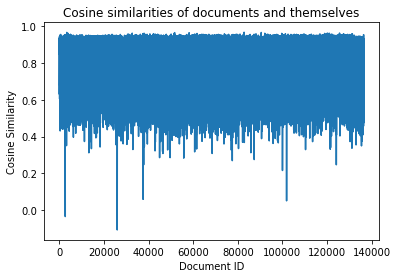

In [42]:
plt.plot(range(len(documents)), doc_similarities)
plt.xlabel('Document ID')
plt.ylabel('Cosine Similarity')
plt.title('Cosine similarities of documents and themselves')
plt.show()

In [43]:
model = Doc2Vec(vector_size=100, window=3, min_count=10, workers=4, epochs=500)

2022-05-25 13:58:36,666 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec(dm/m,d100,n5,w3,mc10,s0.001,t4)', 'datetime': '2022-05-25T13:58:36.666246', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}


In [44]:
model.build_vocab(documents)

2022-05-25 13:58:36,682 : INFO : collecting all words and their counts
2022-05-25 13:58:36,683 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2022-05-25 13:58:36,714 : INFO : PROGRESS: at example #10000, processed 58495 words (1888403/s), 8444 word types, 0 tags
2022-05-25 13:58:36,736 : INFO : PROGRESS: at example #20000, processed 119066 words (2859078/s), 14182 word types, 0 tags
2022-05-25 13:58:36,754 : INFO : PROGRESS: at example #30000, processed 182038 words (3744789/s), 20375 word types, 0 tags
2022-05-25 13:58:36,772 : INFO : PROGRESS: at example #40000, processed 247145 words (3605358/s), 27163 word types, 0 tags
2022-05-25 13:58:36,791 : INFO : PROGRESS: at example #50000, processed 310852 words (3502848/s), 33299 word types, 0 tags
2022-05-25 13:58:36,809 : INFO : PROGRESS: at example #60000, processed 372821 words (3476073/s), 38509 word types, 0 tags
2022-05-25 13:58:36,828 : INFO : PROGRESS: at example #70000, processed 432306 words (326

In [45]:
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

2022-05-25 13:58:37,129 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 4295 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=3 shrink_windows=True', 'datetime': '2022-05-25T13:58:37.129516', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'train'}
2022-05-25 13:58:38,323 : INFO : EPOCH 1 - PROGRESS: at 11.20% examples, 51876 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:58:39,536 : INFO : EPOCH 1 - PROGRESS: at 29.63% examples, 70605 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:58:40,607 : INFO : EPOCH 1 - PROGRESS: at 43.64% examples, 71589 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:58:41,667 : INFO : EPOCH 1 - PROGRESS: at 58.77% examples, 73538 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:58:42,670 : INFO : EPOCH 1 - PROGRESS: at 76.83% examples, 78811 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:58:43,839 : INFO : EPOCH

2022-05-25 13:59:25,900 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 13:59:25,909 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 13:59:25,939 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 13:59:25,952 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 13:59:25,952 : INFO : EPOCH - 7 : training on 804638 raw words (549116 effective words) took 6.9s, 79899 effective words/s
2022-05-25 13:59:27,033 : INFO : EPOCH 8 - PROGRESS: at 11.20% examples, 56400 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:59:28,240 : INFO : EPOCH 8 - PROGRESS: at 29.63% examples, 73559 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:59:29,269 : INFO : EPOCH 8 - PROGRESS: at 46.07% examples, 78700 words/s, in_qsize 7, out_qsize 0
2022-05-25 13:59:30,334 : INFO : EPOCH 8 - PROGRESS: at 61.54% examples, 79146 words/s, in_qsize 8, out_qsize 0
2022-05-25 13:59:31,546 : INFO : EPOCH 8 - PROGRESS: a

2022-05-25 14:00:13,741 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:00:13,755 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:00:13,767 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:00:13,767 : INFO : EPOCH - 14 : training on 804638 raw words (549202 effective words) took 7.3s, 75539 effective words/s
2022-05-25 14:00:14,795 : INFO : EPOCH 15 - PROGRESS: at 11.17% examples, 59422 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:00:16,025 : INFO : EPOCH 15 - PROGRESS: at 29.63% examples, 74700 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:00:17,042 : INFO : EPOCH 15 - PROGRESS: at 44.84% examples, 77677 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:00:18,086 : INFO : EPOCH 15 - PROGRESS: at 58.76% examples, 76986 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:00:19,087 : INFO : EPOCH 15 - PROGRESS: at 74.56% examples, 79284 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:00:20,132 : I

2022-05-25 14:01:01,186 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:01:01,199 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:01:01,200 : INFO : EPOCH - 21 : training on 804638 raw words (549299 effective words) took 6.6s, 83849 effective words/s
2022-05-25 14:01:02,232 : INFO : EPOCH 22 - PROGRESS: at 11.17% examples, 59175 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:01:03,256 : INFO : EPOCH 22 - PROGRESS: at 25.22% examples, 69089 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:01:04,257 : INFO : EPOCH 22 - PROGRESS: at 41.20% examples, 76350 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:01:05,274 : INFO : EPOCH 22 - PROGRESS: at 54.84% examples, 76070 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:01:06,327 : INFO : EPOCH 22 - PROGRESS: at 70.61% examples, 76925 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:01:07,377 : INFO : EPOCH 22 - PROGRESS: at 83.21% examples, 76053 words/s, in_qsize 8, out_qsize 0
2022-

2022-05-25 14:01:49,812 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:01:49,821 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:01:49,822 : INFO : EPOCH - 28 : training on 804638 raw words (549069 effective words) took 6.7s, 81438 effective words/s
2022-05-25 14:01:50,925 : INFO : EPOCH 29 - PROGRESS: at 11.20% examples, 55381 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:01:51,934 : INFO : EPOCH 29 - PROGRESS: at 28.49% examples, 76690 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:01:52,960 : INFO : EPOCH 29 - PROGRESS: at 42.42% examples, 76622 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:01:53,979 : INFO : EPOCH 29 - PROGRESS: at 56.15% examples, 76388 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:01:54,995 : INFO : EPOCH 29 - PROGRESS: at 69.64% examples, 75036 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:01:56,032 : INFO : EPOCH 29 - PROGRESS: at 83.21% examples, 75723 words/s, in_qsize 8, out_qsize 0
2022-

2022-05-25 14:02:38,028 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:02:38,038 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:02:38,039 : INFO : EPOCH - 35 : training on 804638 raw words (548876 effective words) took 7.0s, 77928 effective words/s
2022-05-25 14:02:39,094 : INFO : EPOCH 36 - PROGRESS: at 11.20% examples, 57941 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:02:40,116 : INFO : EPOCH 36 - PROGRESS: at 25.22% examples, 68552 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:02:41,303 : INFO : EPOCH 36 - PROGRESS: at 43.64% examples, 75774 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:02:42,367 : INFO : EPOCH 36 - PROGRESS: at 58.76% examples, 76714 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:02:43,474 : INFO : EPOCH 36 - PROGRESS: at 76.83% examples, 80005 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:02:44,486 : INFO : EPOCH 36 - PROGRESS: at 89.94% examples, 78228 words/s, in_qsize 7, out_qsize 0
2022-

2022-05-25 14:03:28,345 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:03:28,376 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:03:28,389 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:03:28,390 : INFO : EPOCH - 42 : training on 804638 raw words (548907 effective words) took 6.7s, 81591 effective words/s
2022-05-25 14:03:29,471 : INFO : EPOCH 43 - PROGRESS: at 11.20% examples, 56555 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:03:30,481 : INFO : EPOCH 43 - PROGRESS: at 26.28% examples, 71222 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:03:31,714 : INFO : EPOCH 43 - PROGRESS: at 43.64% examples, 74384 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:03:32,727 : INFO : EPOCH 43 - PROGRESS: at 58.76% examples, 76584 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:03:33,832 : INFO : EPOCH 43 - PROGRESS: at 76.83% examples, 79893 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:03:34,974 : I

2022-05-25 14:04:19,359 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:04:19,388 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:04:19,402 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:04:19,402 : INFO : EPOCH - 49 : training on 804638 raw words (548894 effective words) took 7.2s, 75886 effective words/s
2022-05-25 14:04:20,434 : INFO : EPOCH 50 - PROGRESS: at 13.50% examples, 73297 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:04:21,487 : INFO : EPOCH 50 - PROGRESS: at 26.31% examples, 71696 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:04:22,545 : INFO : EPOCH 50 - PROGRESS: at 40.04% examples, 72525 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:04:23,546 : INFO : EPOCH 50 - PROGRESS: at 54.84% examples, 75068 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:04:24,665 : INFO : EPOCH 50 - PROGRESS: at 69.64% examples, 73904 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:04:25,842 : I

2022-05-25 14:05:08,952 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:05:08,986 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:05:08,997 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:05:08,998 : INFO : EPOCH - 56 : training on 804638 raw words (549312 effective words) took 6.9s, 79467 effective words/s
2022-05-25 14:05:10,067 : INFO : EPOCH 57 - PROGRESS: at 11.17% examples, 57465 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:05:11,304 : INFO : EPOCH 57 - PROGRESS: at 29.63% examples, 73332 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:05:12,305 : INFO : EPOCH 57 - PROGRESS: at 47.22% examples, 81120 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:05:13,330 : INFO : EPOCH 57 - PROGRESS: at 60.09% examples, 78508 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:05:14,381 : INFO : EPOCH 57 - PROGRESS: at 76.83% examples, 80897 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:05:15,494 : I

2022-05-25 14:05:58,658 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:05:58,684 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:05:58,695 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:05:58,696 : INFO : EPOCH - 63 : training on 804638 raw words (548865 effective words) took 6.8s, 81299 effective words/s
2022-05-25 14:05:59,719 : INFO : EPOCH 64 - PROGRESS: at 12.34% examples, 66513 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:06:00,893 : INFO : EPOCH 64 - PROGRESS: at 29.63% examples, 76820 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:06:01,952 : INFO : EPOCH 64 - PROGRESS: at 43.64% examples, 76036 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:06:03,020 : INFO : EPOCH 64 - PROGRESS: at 58.76% examples, 76913 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:06:04,156 : INFO : EPOCH 64 - PROGRESS: at 73.71% examples, 76075 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:06:05,162 : I

2022-05-25 14:06:47,437 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:06:47,438 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:06:47,452 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:06:47,452 : INFO : EPOCH - 70 : training on 804638 raw words (548981 effective words) took 7.2s, 76713 effective words/s
2022-05-25 14:06:48,580 : INFO : EPOCH 71 - PROGRESS: at 11.17% examples, 54159 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:06:49,635 : INFO : EPOCH 71 - PROGRESS: at 25.22% examples, 65146 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:06:50,669 : INFO : EPOCH 71 - PROGRESS: at 40.04% examples, 70566 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:06:51,721 : INFO : EPOCH 71 - PROGRESS: at 53.53% examples, 70973 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:06:52,757 : INFO : EPOCH 71 - PROGRESS: at 72.61% examples, 76960 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:06:53,781 : I

2022-05-25 14:07:36,702 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:07:36,736 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:07:36,746 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:07:36,747 : INFO : EPOCH - 77 : training on 804638 raw words (549009 effective words) took 7.0s, 78089 effective words/s
2022-05-25 14:07:37,762 : INFO : EPOCH 78 - PROGRESS: at 11.20% examples, 60093 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:07:38,777 : INFO : EPOCH 78 - PROGRESS: at 27.36% examples, 76547 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:07:39,789 : INFO : EPOCH 78 - PROGRESS: at 42.42% examples, 79110 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:07:40,875 : INFO : EPOCH 78 - PROGRESS: at 53.53% examples, 73407 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:07:41,895 : INFO : EPOCH 78 - PROGRESS: at 69.64% examples, 75412 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:07:43,018 : I

2022-05-25 14:08:26,216 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:08:26,240 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:08:26,252 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:08:26,252 : INFO : EPOCH - 84 : training on 804638 raw words (549846 effective words) took 6.9s, 80144 effective words/s
2022-05-25 14:08:27,309 : INFO : EPOCH 85 - PROGRESS: at 11.17% examples, 57769 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:08:28,356 : INFO : EPOCH 85 - PROGRESS: at 25.22% examples, 67619 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:08:29,380 : INFO : EPOCH 85 - PROGRESS: at 42.42% examples, 76930 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:08:30,406 : INFO : EPOCH 85 - PROGRESS: at 54.84% examples, 74664 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:08:31,426 : INFO : EPOCH 85 - PROGRESS: at 70.59% examples, 76305 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:08:32,453 : I

2022-05-25 14:09:15,303 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:09:15,322 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:09:15,336 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:09:15,336 : INFO : EPOCH - 91 : training on 804638 raw words (548884 effective words) took 7.2s, 75918 effective words/s
2022-05-25 14:09:16,378 : INFO : EPOCH 92 - PROGRESS: at 11.17% examples, 58654 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:09:17,386 : INFO : EPOCH 92 - PROGRESS: at 26.28% examples, 72728 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:09:18,440 : INFO : EPOCH 92 - PROGRESS: at 40.04% examples, 73236 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:09:19,472 : INFO : EPOCH 92 - PROGRESS: at 53.53% examples, 73261 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:09:20,498 : INFO : EPOCH 92 - PROGRESS: at 69.64% examples, 75204 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:09:21,571 : I

2022-05-25 14:10:04,910 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:10:04,944 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:10:04,957 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:10:04,957 : INFO : EPOCH - 98 : training on 804638 raw words (549216 effective words) took 6.8s, 81199 effective words/s
2022-05-25 14:10:06,011 : INFO : EPOCH 99 - PROGRESS: at 11.20% examples, 58253 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:10:07,023 : INFO : EPOCH 99 - PROGRESS: at 26.28% examples, 72272 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:10:08,049 : INFO : EPOCH 99 - PROGRESS: at 42.42% examples, 77966 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:10:09,065 : INFO : EPOCH 99 - PROGRESS: at 57.45% examples, 79231 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:10:10,066 : INFO : EPOCH 99 - PROGRESS: at 70.59% examples, 77382 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:10:11,138 : I

2022-05-25 14:10:54,484 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:10:54,525 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:10:54,536 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:10:54,536 : INFO : EPOCH - 105 : training on 804638 raw words (549733 effective words) took 7.3s, 74941 effective words/s
2022-05-25 14:10:55,563 : INFO : EPOCH 106 - PROGRESS: at 11.20% examples, 59722 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:10:56,579 : INFO : EPOCH 106 - PROGRESS: at 26.28% examples, 72955 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:10:57,584 : INFO : EPOCH 106 - PROGRESS: at 42.42% examples, 78922 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:10:58,595 : INFO : EPOCH 106 - PROGRESS: at 57.45% examples, 80021 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:10:59,610 : INFO : EPOCH 106 - PROGRESS: at 72.61% examples, 80465 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:11:00,6

2022-05-25 14:11:43,597 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:11:43,615 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:11:43,652 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:11:43,656 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:11:43,657 : INFO : EPOCH - 112 : training on 804638 raw words (548581 effective words) took 6.8s, 80626 effective words/s
2022-05-25 14:11:44,688 : INFO : EPOCH 113 - PROGRESS: at 11.17% examples, 59377 words/s, in_qsize 8, out_qsize 1
2022-05-25 14:11:45,691 : INFO : EPOCH 113 - PROGRESS: at 26.28% examples, 73175 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:11:46,778 : INFO : EPOCH 113 - PROGRESS: at 40.04% examples, 72822 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:11:48,024 : INFO : EPOCH 113 - PROGRESS: at 58.76% examples, 76112 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:11:49,055 : INFO : EPOCH 113 -

2022-05-25 14:12:32,963 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:12:32,988 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:12:33,010 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:12:33,018 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:12:33,018 : INFO : EPOCH - 119 : training on 804638 raw words (549071 effective words) took 7.1s, 77697 effective words/s
2022-05-25 14:12:34,104 : INFO : EPOCH 120 - PROGRESS: at 11.17% examples, 56147 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:12:35,127 : INFO : EPOCH 120 - PROGRESS: at 26.28% examples, 70422 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:12:36,156 : INFO : EPOCH 120 - PROGRESS: at 40.04% examples, 72309 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:12:37,294 : INFO : EPOCH 120 - PROGRESS: at 53.53% examples, 70800 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:12:38,444 : INFO : EPOCH 120 -

2022-05-25 14:13:23,049 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:13:23,063 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:13:23,103 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:13:23,110 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:13:23,110 : INFO : EPOCH - 126 : training on 804638 raw words (549074 effective words) took 7.4s, 74445 effective words/s
2022-05-25 14:13:24,166 : INFO : EPOCH 127 - PROGRESS: at 11.20% examples, 58021 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:13:25,422 : INFO : EPOCH 127 - PROGRESS: at 29.63% examples, 73019 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:13:26,423 : INFO : EPOCH 127 - PROGRESS: at 46.07% examples, 78918 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:13:27,427 : INFO : EPOCH 127 - PROGRESS: at 58.76% examples, 77054 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:13:28,489 : INFO : EPOCH 127 -

2022-05-25 14:14:12,247 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:14:12,267 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:14:12,288 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:14:12,301 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:14:12,301 : INFO : EPOCH - 133 : training on 804638 raw words (549255 effective words) took 7.1s, 77155 effective words/s
2022-05-25 14:14:13,414 : INFO : EPOCH 134 - PROGRESS: at 11.20% examples, 54739 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:14:14,653 : INFO : EPOCH 134 - PROGRESS: at 29.63% examples, 71620 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:14:15,755 : INFO : EPOCH 134 - PROGRESS: at 43.64% examples, 71570 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:14:16,904 : INFO : EPOCH 134 - PROGRESS: at 58.76% examples, 72139 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:14:17,980 : INFO : EPOCH 134 -

2022-05-25 14:15:03,607 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:15:03,632 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:15:03,718 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:15:03,726 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:15:03,728 : INFO : EPOCH - 140 : training on 804638 raw words (548992 effective words) took 7.3s, 74948 effective words/s
2022-05-25 14:15:04,752 : INFO : EPOCH 141 - PROGRESS: at 12.34% examples, 66720 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:15:05,961 : INFO : EPOCH 141 - PROGRESS: at 29.63% examples, 75597 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:15:07,069 : INFO : EPOCH 141 - PROGRESS: at 43.64% examples, 74094 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:15:08,161 : INFO : EPOCH 141 - PROGRESS: at 58.76% examples, 75001 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:15:09,334 : INFO : EPOCH 141 -

2022-05-25 14:15:54,167 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:15:54,181 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:15:54,220 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:15:54,231 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:15:54,232 : INFO : EPOCH - 147 : training on 804638 raw words (549348 effective words) took 7.2s, 75805 effective words/s
2022-05-25 14:15:55,265 : INFO : EPOCH 148 - PROGRESS: at 11.20% examples, 59129 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:15:56,289 : INFO : EPOCH 148 - PROGRESS: at 25.22% examples, 69137 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:15:57,326 : INFO : EPOCH 148 - PROGRESS: at 40.04% examples, 73460 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:15:58,348 : INFO : EPOCH 148 - PROGRESS: at 53.53% examples, 73588 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:15:59,513 : INFO : EPOCH 148 -

2022-05-25 14:16:43,920 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:16:43,948 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:16:43,970 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:16:43,982 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:16:43,983 : INFO : EPOCH - 154 : training on 804638 raw words (549599 effective words) took 6.9s, 79704 effective words/s
2022-05-25 14:16:45,011 : INFO : EPOCH 155 - PROGRESS: at 13.50% examples, 72883 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:16:46,038 : INFO : EPOCH 155 - PROGRESS: at 26.28% examples, 72442 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:16:47,096 : INFO : EPOCH 155 - PROGRESS: at 40.04% examples, 72925 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:16:48,137 : INFO : EPOCH 155 - PROGRESS: at 53.53% examples, 72902 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:16:49,249 : INFO : EPOCH 155 -

2022-05-25 14:17:33,803 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:17:33,819 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:17:33,843 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:17:33,854 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:17:33,855 : INFO : EPOCH - 161 : training on 804638 raw words (548567 effective words) took 7.5s, 73112 effective words/s
2022-05-25 14:17:35,151 : INFO : EPOCH 162 - PROGRESS: at 15.84% examples, 68306 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:17:36,160 : INFO : EPOCH 162 - PROGRESS: at 33.13% examples, 81752 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:17:37,363 : INFO : EPOCH 162 - PROGRESS: at 48.47% examples, 78382 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:17:38,537 : INFO : EPOCH 162 - PROGRESS: at 64.08% examples, 77029 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:17:39,555 : INFO : EPOCH 162 -

2022-05-25 14:18:23,132 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:18:23,163 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:18:23,183 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:18:23,194 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:18:23,195 : INFO : EPOCH - 168 : training on 804638 raw words (549009 effective words) took 7.0s, 78006 effective words/s
2022-05-25 14:18:24,251 : INFO : EPOCH 169 - PROGRESS: at 11.20% examples, 57822 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:18:25,259 : INFO : EPOCH 169 - PROGRESS: at 25.22% examples, 68954 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:18:26,264 : INFO : EPOCH 169 - PROGRESS: at 41.20% examples, 76136 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:18:27,285 : INFO : EPOCH 169 - PROGRESS: at 53.53% examples, 74020 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:18:28,504 : INFO : EPOCH 169 -

2022-05-25 14:19:13,630 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:19:13,652 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:19:13,682 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:19:13,691 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:19:13,691 : INFO : EPOCH - 175 : training on 804638 raw words (549352 effective words) took 6.9s, 79728 effective words/s
2022-05-25 14:19:14,787 : INFO : EPOCH 176 - PROGRESS: at 11.20% examples, 55675 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:19:15,828 : INFO : EPOCH 176 - PROGRESS: at 25.22% examples, 66521 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:19:16,842 : INFO : EPOCH 176 - PROGRESS: at 42.42% examples, 76336 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:19:17,850 : INFO : EPOCH 176 - PROGRESS: at 57.45% examples, 78086 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:19:19,027 : INFO : EPOCH 176 -

2022-05-25 14:20:03,410 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:20:03,419 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:20:03,449 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:20:03,465 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:20:03,465 : INFO : EPOCH - 182 : training on 804638 raw words (548544 effective words) took 7.4s, 74244 effective words/s
2022-05-25 14:20:04,510 : INFO : EPOCH 183 - PROGRESS: at 11.17% examples, 58584 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:20:05,545 : INFO : EPOCH 183 - PROGRESS: at 25.22% examples, 68470 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:20:06,578 : INFO : EPOCH 183 - PROGRESS: at 40.04% examples, 72999 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:20:07,634 : INFO : EPOCH 183 - PROGRESS: at 53.54% examples, 72704 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:20:08,673 : INFO : EPOCH 183 -

2022-05-25 14:20:53,455 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:20:53,473 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:20:53,488 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:20:53,505 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:20:53,506 : INFO : EPOCH - 189 : training on 804638 raw words (549024 effective words) took 7.2s, 76297 effective words/s
2022-05-25 14:20:54,528 : INFO : EPOCH 190 - PROGRESS: at 12.34% examples, 66586 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:20:55,750 : INFO : EPOCH 190 - PROGRESS: at 29.63% examples, 75266 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:20:56,808 : INFO : EPOCH 190 - PROGRESS: at 43.64% examples, 75001 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:20:57,961 : INFO : EPOCH 190 - PROGRESS: at 58.76% examples, 74678 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:20:59,023 : INFO : EPOCH 190 -

2022-05-25 14:21:42,837 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:21:42,867 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:21:42,933 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:21:42,960 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:21:42,961 : INFO : EPOCH - 196 : training on 804638 raw words (549120 effective words) took 6.9s, 79153 effective words/s
2022-05-25 14:21:44,256 : INFO : EPOCH 197 - PROGRESS: at 11.17% examples, 47198 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:21:45,309 : INFO : EPOCH 197 - PROGRESS: at 25.22% examples, 60738 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:21:46,337 : INFO : EPOCH 197 - PROGRESS: at 40.11% examples, 67486 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:21:47,393 : INFO : EPOCH 197 - PROGRESS: at 53.53% examples, 68459 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:21:48,495 : INFO : EPOCH 197 -

2022-05-25 14:22:33,819 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:22:33,844 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:22:33,877 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:22:33,888 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:22:33,889 : INFO : EPOCH - 203 : training on 804638 raw words (548790 effective words) took 7.3s, 75067 effective words/s
2022-05-25 14:22:34,909 : INFO : EPOCH 204 - PROGRESS: at 11.20% examples, 59966 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:22:35,936 : INFO : EPOCH 204 - PROGRESS: at 25.22% examples, 69518 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:22:37,178 : INFO : EPOCH 204 - PROGRESS: at 43.64% examples, 75183 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:22:38,296 : INFO : EPOCH 204 - PROGRESS: at 58.76% examples, 75379 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:22:39,364 : INFO : EPOCH 204 -

2022-05-25 14:23:24,467 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:23:24,531 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:23:24,561 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:23:24,566 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:23:24,566 : INFO : EPOCH - 210 : training on 804638 raw words (548976 effective words) took 7.3s, 75439 effective words/s
2022-05-25 14:23:25,704 : INFO : EPOCH 211 - PROGRESS: at 11.20% examples, 53929 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:23:26,775 : INFO : EPOCH 211 - PROGRESS: at 25.22% examples, 64525 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:23:27,907 : INFO : EPOCH 211 - PROGRESS: at 38.89% examples, 66196 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:23:28,977 : INFO : EPOCH 211 - PROGRESS: at 53.53% examples, 68789 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:23:30,049 : INFO : EPOCH 211 -

2022-05-25 14:24:15,253 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:24:15,291 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:24:15,309 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:24:15,318 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:24:15,319 : INFO : EPOCH - 217 : training on 804638 raw words (549483 effective words) took 7.1s, 77931 effective words/s
2022-05-25 14:24:16,410 : INFO : EPOCH 218 - PROGRESS: at 11.20% examples, 56090 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:24:17,426 : INFO : EPOCH 218 - PROGRESS: at 26.28% examples, 70710 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:24:18,434 : INFO : EPOCH 218 - PROGRESS: at 40.04% examples, 73012 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:24:19,525 : INFO : EPOCH 218 - PROGRESS: at 54.84% examples, 73802 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:24:20,658 : INFO : EPOCH 218 -

2022-05-25 14:25:05,263 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:25:05,301 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:25:05,309 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:25:05,324 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:25:05,324 : INFO : EPOCH - 224 : training on 804638 raw words (548520 effective words) took 7.1s, 77443 effective words/s
2022-05-25 14:25:06,395 : INFO : EPOCH 225 - PROGRESS: at 11.20% examples, 57001 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:25:07,398 : INFO : EPOCH 225 - PROGRESS: at 25.22% examples, 68674 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:25:08,532 : INFO : EPOCH 225 - PROGRESS: at 38.89% examples, 68867 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:25:09,567 : INFO : EPOCH 225 - PROGRESS: at 53.53% examples, 71464 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:25:10,690 : INFO : EPOCH 225 -

2022-05-25 14:25:54,941 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:25:54,967 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:25:55,021 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:25:55,024 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:25:55,025 : INFO : EPOCH - 231 : training on 804638 raw words (548584 effective words) took 7.0s, 78771 effective words/s
2022-05-25 14:25:56,244 : INFO : EPOCH 232 - PROGRESS: at 15.84% examples, 72773 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:25:57,425 : INFO : EPOCH 232 - PROGRESS: at 34.24% examples, 81332 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:25:58,454 : INFO : EPOCH 232 - PROGRESS: at 50.98% examples, 84484 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:25:59,488 : INFO : EPOCH 232 - PROGRESS: at 64.74% examples, 81030 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:26:00,537 : INFO : EPOCH 232 -

2022-05-25 14:26:44,561 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:26:44,570 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:26:44,612 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:26:44,623 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:26:44,624 : INFO : EPOCH - 238 : training on 804638 raw words (548442 effective words) took 7.2s, 75888 effective words/s
2022-05-25 14:26:45,737 : INFO : EPOCH 239 - PROGRESS: at 11.20% examples, 55020 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:26:46,806 : INFO : EPOCH 239 - PROGRESS: at 25.22% examples, 65317 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:26:47,851 : INFO : EPOCH 239 - PROGRESS: at 38.89% examples, 68495 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:26:49,005 : INFO : EPOCH 239 - PROGRESS: at 53.53% examples, 69225 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:26:50,053 : INFO : EPOCH 239 -

2022-05-25 14:27:34,910 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:27:34,952 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:27:34,973 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:27:34,985 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:27:34,985 : INFO : EPOCH - 245 : training on 804638 raw words (549325 effective words) took 7.1s, 77684 effective words/s
2022-05-25 14:27:36,068 : INFO : EPOCH 246 - PROGRESS: at 11.20% examples, 56619 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:27:37,085 : INFO : EPOCH 246 - PROGRESS: at 26.28% examples, 71049 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:27:38,135 : INFO : EPOCH 246 - PROGRESS: at 40.04% examples, 72281 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:27:39,194 : INFO : EPOCH 246 - PROGRESS: at 53.53% examples, 72107 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:27:40,418 : INFO : EPOCH 246 -

2022-05-25 14:28:24,254 : INFO : EPOCH 252 - PROGRESS: at 83.21% examples, 74596 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:28:25,145 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:28:25,163 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:28:25,190 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:28:25,201 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:28:25,202 : INFO : EPOCH - 252 : training on 804638 raw words (548861 effective words) took 7.2s, 75831 effective words/s
2022-05-25 14:28:26,283 : INFO : EPOCH 253 - PROGRESS: at 11.20% examples, 56926 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:28:27,309 : INFO : EPOCH 253 - PROGRESS: at 25.22% examples, 67850 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:28:28,310 : INFO : EPOCH 253 - PROGRESS: at 41.20% examples, 75447 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:28:29,346 : INFO : EPOCH 253 -

2022-05-25 14:29:15,244 : INFO : EPOCH 259 - PROGRESS: at 83.21% examples, 72865 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:29:15,924 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:29:15,973 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:29:15,998 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:29:16,012 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:29:16,012 : INFO : EPOCH - 259 : training on 804638 raw words (548568 effective words) took 7.2s, 76134 effective words/s
2022-05-25 14:29:17,054 : INFO : EPOCH 260 - PROGRESS: at 13.50% examples, 71902 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:29:18,077 : INFO : EPOCH 260 - PROGRESS: at 26.28% examples, 72086 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:29:19,212 : INFO : EPOCH 260 - PROGRESS: at 38.89% examples, 68949 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:29:20,295 : INFO : EPOCH 260 -

2022-05-25 14:30:05,935 : INFO : EPOCH 266 - PROGRESS: at 83.21% examples, 74250 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:30:06,726 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:30:06,768 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:30:06,800 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:30:06,811 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:30:06,811 : INFO : EPOCH - 266 : training on 804638 raw words (548742 effective words) took 7.2s, 76276 effective words/s
2022-05-25 14:30:07,938 : INFO : EPOCH 267 - PROGRESS: at 11.20% examples, 54209 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:30:08,955 : INFO : EPOCH 267 - PROGRESS: at 26.28% examples, 69524 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:30:09,974 : INFO : EPOCH 267 - PROGRESS: at 38.89% examples, 69837 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:30:11,043 : INFO : EPOCH 267 -

2022-05-25 14:30:56,535 : INFO : EPOCH 273 - PROGRESS: at 89.05% examples, 75224 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:30:57,112 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:30:57,122 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:30:57,165 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:30:57,174 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:30:57,174 : INFO : EPOCH - 273 : training on 804638 raw words (549115 effective words) took 7.3s, 75735 effective words/s
2022-05-25 14:30:58,261 : INFO : EPOCH 274 - PROGRESS: at 11.17% examples, 55973 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:30:59,359 : INFO : EPOCH 274 - PROGRESS: at 25.22% examples, 64977 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:31:00,376 : INFO : EPOCH 274 - PROGRESS: at 38.89% examples, 68830 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:31:01,451 : INFO : EPOCH 274 -

2022-05-25 14:31:46,437 : INFO : EPOCH 280 - PROGRESS: at 83.21% examples, 75022 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:31:47,345 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:31:47,351 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:31:47,394 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:31:47,405 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:31:47,405 : INFO : EPOCH - 280 : training on 804638 raw words (549020 effective words) took 7.2s, 75988 effective words/s
2022-05-25 14:31:48,678 : INFO : EPOCH 281 - PROGRESS: at 15.84% examples, 69634 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:31:49,709 : INFO : EPOCH 281 - PROGRESS: at 29.63% examples, 73222 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:31:50,733 : INFO : EPOCH 281 - PROGRESS: at 43.64% examples, 74419 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:31:51,815 : INFO : EPOCH 281 -

2022-05-25 14:32:36,882 : INFO : EPOCH 287 - PROGRESS: at 83.21% examples, 72625 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:32:37,697 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:32:37,706 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:32:37,740 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:32:37,753 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:32:37,753 : INFO : EPOCH - 287 : training on 804638 raw words (549067 effective words) took 7.3s, 74859 effective words/s
2022-05-25 14:32:38,830 : INFO : EPOCH 288 - PROGRESS: at 11.20% examples, 56632 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:32:39,873 : INFO : EPOCH 288 - PROGRESS: at 26.28% examples, 70347 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:32:40,913 : INFO : EPOCH 288 - PROGRESS: at 38.89% examples, 69863 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:32:41,940 : INFO : EPOCH 288 -

2022-05-25 14:33:27,635 : INFO : EPOCH 294 - PROGRESS: at 89.94% examples, 76034 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:33:28,002 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:33:28,022 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:33:28,052 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:33:28,060 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:33:28,060 : INFO : EPOCH - 294 : training on 804638 raw words (549337 effective words) took 7.1s, 77835 effective words/s
2022-05-25 14:33:29,114 : INFO : EPOCH 295 - PROGRESS: at 11.17% examples, 58298 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:33:30,153 : INFO : EPOCH 295 - PROGRESS: at 26.28% examples, 71326 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:33:31,158 : INFO : EPOCH 295 - PROGRESS: at 42.42% examples, 77721 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:33:32,182 : INFO : EPOCH 295 -

2022-05-25 14:34:16,122 : INFO : EPOCH 301 - PROGRESS: at 53.54% examples, 70275 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:34:17,164 : INFO : EPOCH 301 - PROGRESS: at 69.64% examples, 72452 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:34:18,305 : INFO : EPOCH 301 - PROGRESS: at 83.21% examples, 72358 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:34:19,257 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:34:19,271 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:34:19,318 : INFO : EPOCH 301 - PROGRESS: at 97.77% examples, 72238 words/s, in_qsize 1, out_qsize 1
2022-05-25 14:34:19,319 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:34:19,329 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:34:19,330 : INFO : EPOCH - 301 : training on 804638 raw words (548543 effective words) took 7.5s, 73100 effective words/s
2022-05-25 14:34:20,484 : INFO : EPOCH 302 -

2022-05-25 14:35:05,109 : INFO : EPOCH 308 - PROGRESS: at 25.22% examples, 65416 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:35:06,155 : INFO : EPOCH 308 - PROGRESS: at 40.04% examples, 70488 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:35:07,175 : INFO : EPOCH 308 - PROGRESS: at 54.84% examples, 73105 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:35:08,194 : INFO : EPOCH 308 - PROGRESS: at 70.61% examples, 75015 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:35:09,194 : INFO : EPOCH 308 - PROGRESS: at 86.61% examples, 77350 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:35:09,967 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:35:09,996 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:35:10,016 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:35:10,029 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:35:10,029 : INFO : EPOCH - 308 : training on 804638 

2022-05-25 14:35:55,630 : INFO : EPOCH 315 - PROGRESS: at 26.28% examples, 69928 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:35:56,658 : INFO : EPOCH 315 - PROGRESS: at 40.04% examples, 71952 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:35:57,704 : INFO : EPOCH 315 - PROGRESS: at 53.53% examples, 72088 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:35:58,748 : INFO : EPOCH 315 - PROGRESS: at 69.64% examples, 73991 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:35:59,923 : INFO : EPOCH 315 - PROGRESS: at 83.21% examples, 73243 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:36:00,676 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:36:00,704 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:36:00,717 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:36:00,730 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:36:00,730 : INFO : EPOCH - 315 : training on 804638 

2022-05-25 14:36:46,228 : INFO : EPOCH 322 - PROGRESS: at 26.28% examples, 69096 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:36:47,260 : INFO : EPOCH 322 - PROGRESS: at 40.04% examples, 71235 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:36:48,548 : INFO : EPOCH 322 - PROGRESS: at 58.76% examples, 74235 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:36:49,694 : INFO : EPOCH 322 - PROGRESS: at 76.83% examples, 77397 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:36:50,739 : INFO : EPOCH 322 - PROGRESS: at 89.94% examples, 75699 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:36:51,120 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:36:51,151 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:36:51,170 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:36:51,188 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:36:51,189 : INFO : EPOCH - 322 : training on 804638 

2022-05-25 14:37:36,819 : INFO : EPOCH 329 - PROGRESS: at 25.22% examples, 67886 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:37:37,861 : INFO : EPOCH 329 - PROGRESS: at 40.04% examples, 72436 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:37:38,968 : INFO : EPOCH 329 - PROGRESS: at 53.53% examples, 71427 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:37:40,007 : INFO : EPOCH 329 - PROGRESS: at 70.61% examples, 74723 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:37:41,073 : INFO : EPOCH 329 - PROGRESS: at 83.21% examples, 74060 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:37:41,808 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:37:41,836 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:37:41,861 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:37:41,872 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:37:41,873 : INFO : EPOCH - 329 : training on 804638 

2022-05-25 14:38:27,263 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:38:27,274 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:38:27,275 : INFO : EPOCH - 335 : training on 804638 raw words (548596 effective words) took 8.1s, 67845 effective words/s
2022-05-25 14:38:28,381 : INFO : EPOCH 336 - PROGRESS: at 11.20% examples, 55158 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:38:29,384 : INFO : EPOCH 336 - PROGRESS: at 27.36% examples, 73661 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:38:30,388 : INFO : EPOCH 336 - PROGRESS: at 38.89% examples, 70912 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:38:31,538 : INFO : EPOCH 336 - PROGRESS: at 53.53% examples, 71063 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:38:32,634 : INFO : EPOCH 336 - PROGRESS: at 69.64% examples, 72446 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:38:33,771 : INFO : EPOCH 336 - PROGRESS: at 83.21% examples, 72391 words/s, in_qsize 8, out_qsize 

2022-05-25 14:39:18,416 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:39:18,455 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:39:18,466 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:39:18,466 : INFO : EPOCH - 342 : training on 804638 raw words (549293 effective words) took 7.3s, 75552 effective words/s
2022-05-25 14:39:19,486 : INFO : EPOCH 343 - PROGRESS: at 11.17% examples, 59933 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:39:20,543 : INFO : EPOCH 343 - PROGRESS: at 25.22% examples, 68550 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:39:21,565 : INFO : EPOCH 343 - PROGRESS: at 38.89% examples, 71261 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:39:22,623 : INFO : EPOCH 343 - PROGRESS: at 53.53% examples, 72891 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:39:23,629 : INFO : EPOCH 343 - PROGRESS: at 71.56% examples, 77775 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:39:24,7

2022-05-25 14:40:09,453 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:40:09,501 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:40:09,534 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:40:09,543 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:40:09,543 : INFO : EPOCH - 349 : training on 804638 raw words (548954 effective words) took 7.5s, 73038 effective words/s
2022-05-25 14:40:10,748 : INFO : EPOCH 350 - PROGRESS: at 11.17% examples, 50650 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:40:11,791 : INFO : EPOCH 350 - PROGRESS: at 25.22% examples, 63304 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:40:12,825 : INFO : EPOCH 350 - PROGRESS: at 40.04% examples, 69165 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:40:13,929 : INFO : EPOCH 350 - PROGRESS: at 53.53% examples, 69028 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:40:15,048 : INFO : EPOCH 350 -

2022-05-25 14:40:59,670 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:40:59,699 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:40:59,734 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:40:59,741 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:40:59,741 : INFO : EPOCH - 356 : training on 804638 raw words (549152 effective words) took 6.7s, 81704 effective words/s
2022-05-25 14:41:00,752 : INFO : EPOCH 357 - PROGRESS: at 11.20% examples, 60493 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:41:01,786 : INFO : EPOCH 357 - PROGRESS: at 26.28% examples, 72924 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:41:02,902 : INFO : EPOCH 357 - PROGRESS: at 43.64% examples, 78390 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:41:04,000 : INFO : EPOCH 357 - PROGRESS: at 58.76% examples, 78118 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:41:05,005 : INFO : EPOCH 357 -

2022-05-25 14:41:50,077 : INFO : EPOCH 363 - PROGRESS: at 93.52% examples, 73166 words/s, in_qsize 4, out_qsize 0
2022-05-25 14:41:50,192 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:41:50,243 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:41:50,266 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:41:50,279 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:41:50,279 : INFO : EPOCH - 363 : training on 804638 raw words (549417 effective words) took 7.4s, 74542 effective words/s
2022-05-25 14:41:51,336 : INFO : EPOCH 364 - PROGRESS: at 11.20% examples, 57873 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:41:52,359 : INFO : EPOCH 364 - PROGRESS: at 27.36% examples, 74842 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:41:53,379 : INFO : EPOCH 364 - PROGRESS: at 41.20% examples, 75540 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:41:54,387 : INFO : EPOCH 364 -

2022-05-25 14:42:39,144 : INFO : EPOCH 370 - PROGRESS: at 89.94% examples, 78600 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:42:39,650 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:42:39,652 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:42:39,690 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:42:39,698 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:42:39,699 : INFO : EPOCH - 370 : training on 804638 raw words (548504 effective words) took 7.0s, 78809 effective words/s
2022-05-25 14:42:40,734 : INFO : EPOCH 371 - PROGRESS: at 13.50% examples, 72446 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:42:41,780 : INFO : EPOCH 371 - PROGRESS: at 26.28% examples, 71573 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:42:42,783 : INFO : EPOCH 371 - PROGRESS: at 41.20% examples, 75855 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:42:43,807 : INFO : EPOCH 371 -

2022-05-25 14:43:29,592 : INFO : EPOCH 377 - PROGRESS: at 83.21% examples, 71049 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:43:30,487 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:43:30,513 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:43:30,550 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:43:30,561 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:43:30,561 : INFO : EPOCH - 377 : training on 804638 raw words (549044 effective words) took 7.6s, 72465 effective words/s
2022-05-25 14:43:31,728 : INFO : EPOCH 378 - PROGRESS: at 11.20% examples, 52278 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:43:32,802 : INFO : EPOCH 378 - PROGRESS: at 25.22% examples, 63483 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:43:33,817 : INFO : EPOCH 378 - PROGRESS: at 40.04% examples, 69740 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:43:35,002 : INFO : EPOCH 378 -

2022-05-25 14:44:21,595 : INFO : EPOCH 384 - PROGRESS: at 69.66% examples, 70063 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:44:22,720 : INFO : EPOCH 384 - PROGRESS: at 83.21% examples, 70537 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:44:23,496 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:44:23,517 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:44:23,563 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:44:23,570 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:44:23,571 : INFO : EPOCH - 384 : training on 804638 raw words (548876 effective words) took 7.5s, 73174 effective words/s
2022-05-25 14:44:24,583 : INFO : EPOCH 385 - PROGRESS: at 12.34% examples, 67236 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:44:25,590 : INFO : EPOCH 385 - PROGRESS: at 25.22% examples, 70508 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:44:26,619 : INFO : EPOCH 385 -

2022-05-25 14:45:13,497 : INFO : EPOCH 391 - PROGRESS: at 81.72% examples, 77703 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:45:14,605 : INFO : EPOCH 391 - PROGRESS: at 95.05% examples, 75240 words/s, in_qsize 3, out_qsize 1
2022-05-25 14:45:14,606 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:45:14,618 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:45:14,653 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:45:14,666 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:45:14,667 : INFO : EPOCH - 391 : training on 804638 raw words (549087 effective words) took 7.1s, 77109 effective words/s
2022-05-25 14:45:15,776 : INFO : EPOCH 392 - PROGRESS: at 11.20% examples, 55099 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:45:16,778 : INFO : EPOCH 392 - PROGRESS: at 25.22% examples, 67411 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:45:17,795 : INFO : EPOCH 392 -

2022-05-25 14:46:03,742 : INFO : EPOCH 398 - PROGRESS: at 69.64% examples, 73322 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:46:04,965 : INFO : EPOCH 398 - PROGRESS: at 83.21% examples, 72144 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:46:05,816 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:46:05,828 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:46:05,870 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:46:05,876 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:46:05,877 : INFO : EPOCH - 398 : training on 804638 raw words (548761 effective words) took 7.4s, 74027 effective words/s
2022-05-25 14:46:06,932 : INFO : EPOCH 399 - PROGRESS: at 11.17% examples, 58033 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:46:07,989 : INFO : EPOCH 399 - PROGRESS: at 26.28% examples, 70526 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:46:09,018 : INFO : EPOCH 399 -

2022-05-25 14:46:54,492 : INFO : EPOCH 405 - PROGRESS: at 53.53% examples, 67580 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:46:55,551 : INFO : EPOCH 405 - PROGRESS: at 69.64% examples, 70002 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:46:56,720 : INFO : EPOCH 405 - PROGRESS: at 83.21% examples, 70043 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:46:57,588 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:46:57,630 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:46:57,667 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:46:57,677 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:46:57,678 : INFO : EPOCH - 405 : training on 804638 raw words (548315 effective words) took 7.7s, 71671 effective words/s
2022-05-25 14:46:58,801 : INFO : EPOCH 406 - PROGRESS: at 11.17% examples, 54289 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:46:59,876 : INFO : EPOCH 406 -

2022-05-25 14:47:44,551 : INFO : EPOCH 412 - PROGRESS: at 38.89% examples, 70476 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:47:45,645 : INFO : EPOCH 412 - PROGRESS: at 53.53% examples, 71660 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:47:46,665 : INFO : EPOCH 412 - PROGRESS: at 68.71% examples, 72690 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:47:47,829 : INFO : EPOCH 412 - PROGRESS: at 83.21% examples, 73321 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:47:48,627 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:47:48,644 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:47:48,667 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:47:48,683 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:47:48,684 : INFO : EPOCH - 412 : training on 804638 raw words (548758 effective words) took 7.3s, 75665 effective words/s
2022-05-25 14:47:49,777 : INFO : EPOCH 413 -

2022-05-25 14:48:35,495 : INFO : EPOCH 419 - PROGRESS: at 40.04% examples, 72089 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:48:36,595 : INFO : EPOCH 419 - PROGRESS: at 53.53% examples, 71217 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:48:37,699 : INFO : EPOCH 419 - PROGRESS: at 69.64% examples, 72430 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:48:38,848 : INFO : EPOCH 419 - PROGRESS: at 83.21% examples, 72263 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:48:39,799 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:48:39,802 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:48:39,850 : INFO : EPOCH 419 - PROGRESS: at 97.77% examples, 72289 words/s, in_qsize 1, out_qsize 1
2022-05-25 14:48:39,851 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:48:39,856 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:48:39,857 : INFO : EPOCH - 419 : training on 804638 

2022-05-25 14:49:25,583 : INFO : EPOCH 426 - PROGRESS: at 29.63% examples, 71616 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:49:26,603 : INFO : EPOCH 426 - PROGRESS: at 46.07% examples, 77394 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:49:27,710 : INFO : EPOCH 426 - PROGRESS: at 58.76% examples, 74158 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:49:28,813 : INFO : EPOCH 426 - PROGRESS: at 73.71% examples, 74328 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:49:29,923 : INFO : EPOCH 426 - PROGRESS: at 89.05% examples, 74423 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:49:30,399 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:49:30,413 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:49:30,450 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:49:30,461 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:49:30,462 : INFO : EPOCH - 426 : training on 804638 

2022-05-25 14:50:16,315 : INFO : EPOCH 433 - PROGRESS: at 25.22% examples, 66624 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:50:17,330 : INFO : EPOCH 433 - PROGRESS: at 38.89% examples, 70020 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:50:18,520 : INFO : EPOCH 433 - PROGRESS: at 53.53% examples, 69785 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:50:19,619 : INFO : EPOCH 433 - PROGRESS: at 69.64% examples, 71332 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:50:20,778 : INFO : EPOCH 433 - PROGRESS: at 83.21% examples, 71230 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:50:21,537 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:50:21,566 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:50:21,585 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:50:21,600 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:50:21,600 : INFO : EPOCH - 433 : training on 804638 

2022-05-25 14:51:07,409 : INFO : EPOCH 440 - PROGRESS: at 25.22% examples, 64356 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:51:08,474 : INFO : EPOCH 440 - PROGRESS: at 38.89% examples, 67381 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:51:09,633 : INFO : EPOCH 440 - PROGRESS: at 53.53% examples, 68323 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:51:10,710 : INFO : EPOCH 440 - PROGRESS: at 69.64% examples, 70471 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:51:11,712 : INFO : EPOCH 440 - PROGRESS: at 83.21% examples, 72220 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:51:12,534 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:51:12,562 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:51:12,576 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:51:12,593 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:51:12,594 : INFO : EPOCH - 440 : training on 804638 

2022-05-25 14:51:57,487 : INFO : EPOCH 447 - PROGRESS: at 30.79% examples, 76461 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:51:58,499 : INFO : EPOCH 447 - PROGRESS: at 44.84% examples, 76988 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:51:59,553 : INFO : EPOCH 447 - PROGRESS: at 60.09% examples, 77970 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:52:00,566 : INFO : EPOCH 447 - PROGRESS: at 74.71% examples, 78508 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:52:01,613 : INFO : EPOCH 447 - PROGRESS: at 89.05% examples, 77634 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:52:02,068 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:52:02,076 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:52:02,127 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:52:02,129 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:52:02,130 : INFO : EPOCH - 447 : training on 804638 

2022-05-25 14:52:47,719 : INFO : EPOCH 454 - PROGRESS: at 25.22% examples, 68726 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:52:48,763 : INFO : EPOCH 454 - PROGRESS: at 38.89% examples, 70900 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:52:49,898 : INFO : EPOCH 454 - PROGRESS: at 53.53% examples, 71306 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:52:51,047 : INFO : EPOCH 454 - PROGRESS: at 69.64% examples, 71914 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:52:52,142 : INFO : EPOCH 454 - PROGRESS: at 83.21% examples, 72431 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:52:52,944 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:52:52,960 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:52:52,997 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:52:53,005 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 14:52:53,006 : INFO : EPOCH - 454 : training on 804638 

2022-05-25 14:53:37,896 : INFO : EPOCH 461 - PROGRESS: at 14.76% examples, 80756 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:53:38,941 : INFO : EPOCH 461 - PROGRESS: at 25.22% examples, 69189 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:53:40,051 : INFO : EPOCH 461 - PROGRESS: at 38.89% examples, 69701 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:53:41,209 : INFO : EPOCH 461 - PROGRESS: at 53.53% examples, 70061 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:53:42,296 : INFO : EPOCH 461 - PROGRESS: at 69.66% examples, 71755 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:53:43,312 : INFO : EPOCH 461 - PROGRESS: at 84.74% examples, 74239 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:53:44,052 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:53:44,109 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:53:44,128 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:53:44,138 : INFO : worker thr

2022-05-25 14:54:29,120 : INFO : EPOCH 468 - PROGRESS: at 11.20% examples, 58400 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:54:30,182 : INFO : EPOCH 468 - PROGRESS: at 25.22% examples, 67491 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:54:31,266 : INFO : EPOCH 468 - PROGRESS: at 40.04% examples, 71148 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:54:32,370 : INFO : EPOCH 468 - PROGRESS: at 54.84% examples, 72172 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:54:33,489 : INFO : EPOCH 468 - PROGRESS: at 72.61% examples, 75387 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:54:34,494 : INFO : EPOCH 468 - PROGRESS: at 86.61% examples, 75499 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:54:35,178 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:54:35,243 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:54:35,254 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:54:35,267 : INFO : worker thr

2022-05-25 14:55:19,408 : INFO : EPOCH 475 - PROGRESS: at 11.20% examples, 53663 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:55:20,634 : INFO : EPOCH 475 - PROGRESS: at 29.63% examples, 71297 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:55:21,654 : INFO : EPOCH 475 - PROGRESS: at 44.84% examples, 75145 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:55:22,838 : INFO : EPOCH 475 - PROGRESS: at 58.76% examples, 72708 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:55:23,930 : INFO : EPOCH 475 - PROGRESS: at 73.71% examples, 73283 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:55:25,049 : INFO : EPOCH 475 - PROGRESS: at 89.05% examples, 73466 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:55:25,534 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:55:25,556 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:55:25,606 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:55:25,614 : INFO : worker thr

2022-05-25 14:56:10,696 : INFO : EPOCH 482 - PROGRESS: at 11.17% examples, 59078 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:56:11,705 : INFO : EPOCH 482 - PROGRESS: at 28.49% examples, 79258 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:56:12,712 : INFO : EPOCH 482 - PROGRESS: at 38.89% examples, 72328 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:56:13,720 : INFO : EPOCH 482 - PROGRESS: at 53.53% examples, 74623 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:56:14,844 : INFO : EPOCH 482 - PROGRESS: at 69.64% examples, 74858 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:56:15,862 : INFO : EPOCH 482 - PROGRESS: at 84.74% examples, 76960 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:56:16,530 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:56:16,582 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:56:16,604 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:56:16,616 : INFO : worker thr

2022-05-25 14:57:02,144 : INFO : EPOCH 489 - PROGRESS: at 11.20% examples, 59510 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:57:03,160 : INFO : EPOCH 489 - PROGRESS: at 25.22% examples, 69668 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:57:04,235 : INFO : EPOCH 489 - PROGRESS: at 38.89% examples, 70799 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:57:05,511 : INFO : EPOCH 489 - PROGRESS: at 53.53% examples, 68936 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:57:06,564 : INFO : EPOCH 489 - PROGRESS: at 69.64% examples, 71274 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:57:07,693 : INFO : EPOCH 489 - PROGRESS: at 83.21% examples, 71478 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:57:08,429 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:57:08,469 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:57:08,492 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:57:08,509 : INFO : worker thr

2022-05-25 14:57:52,115 : INFO : EPOCH 496 - PROGRESS: at 11.17% examples, 59327 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:57:53,399 : INFO : EPOCH 496 - PROGRESS: at 29.63% examples, 72900 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:57:54,410 : INFO : EPOCH 496 - PROGRESS: at 43.62% examples, 74492 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:57:55,506 : INFO : EPOCH 496 - PROGRESS: at 58.76% examples, 75242 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:57:56,554 : INFO : EPOCH 496 - PROGRESS: at 76.83% examples, 79639 words/s, in_qsize 8, out_qsize 0
2022-05-25 14:57:57,591 : INFO : EPOCH 496 - PROGRESS: at 89.05% examples, 76620 words/s, in_qsize 7, out_qsize 0
2022-05-25 14:57:58,054 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 14:57:58,088 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 14:57:58,102 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 14:57:58,119 : INFO : worker thr

In [46]:
most_similarity = 0
doc_similarities = []
for doc_id in range(len(documents)):
    inferred_vector = model.infer_vector(documents[doc_id].words)
    sims = model.dv.most_similar([inferred_vector], topn=1)
    if sims[0][0] == doc_id:
        most_similarity = most_similarity + 1
    doc_similarities.append(inferred_vector.dot(model.dv[doc_id] / (np.linalg.norm(inferred_vector) * np.linalg.norm(model.dv[doc_id]))))

In [47]:
most_similarity / len(documents)

0.6364802274792601

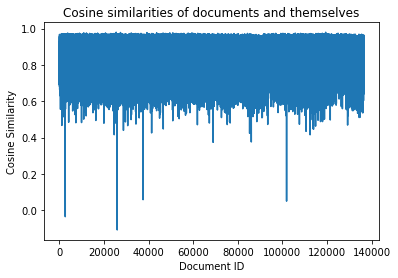

In [48]:
plt.plot(range(len(documents)), doc_similarities)
plt.xlabel('Document ID')
plt.ylabel('Cosine Similarity')
plt.title('Cosine similarities of documents and themselves')
plt.show()

In [49]:
model = Doc2Vec(vector_size=100, window=3, min_count=10, workers=4, epochs=1000)

2022-05-25 15:40:42,990 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec(dm/m,d100,n5,w3,mc10,s0.001,t4)', 'datetime': '2022-05-25T15:40:42.990495', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}


In [50]:
model.build_vocab(documents)

2022-05-25 15:40:44,255 : INFO : collecting all words and their counts
2022-05-25 15:40:44,256 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2022-05-25 15:40:44,287 : INFO : PROGRESS: at example #10000, processed 58495 words (1969488/s), 8444 word types, 0 tags
2022-05-25 15:40:44,306 : INFO : PROGRESS: at example #20000, processed 119066 words (3271826/s), 14182 word types, 0 tags
2022-05-25 15:40:44,324 : INFO : PROGRESS: at example #30000, processed 182038 words (3646470/s), 20375 word types, 0 tags
2022-05-25 15:40:44,343 : INFO : PROGRESS: at example #40000, processed 247145 words (3463414/s), 27163 word types, 0 tags
2022-05-25 15:40:44,362 : INFO : PROGRESS: at example #50000, processed 310852 words (3536860/s), 33299 word types, 0 tags
2022-05-25 15:40:44,380 : INFO : PROGRESS: at example #60000, processed 372821 words (3525733/s), 38509 word types, 0 tags
2022-05-25 15:40:44,398 : INFO : PROGRESS: at example #70000, processed 432306 words (339

In [51]:
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

2022-05-25 15:40:45,687 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 4295 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=3 shrink_windows=True', 'datetime': '2022-05-25T15:40:45.686388', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'train'}
2022-05-25 15:40:46,798 : INFO : EPOCH 1 - PROGRESS: at 11.20% examples, 55315 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:40:47,809 : INFO : EPOCH 1 - PROGRESS: at 28.49% examples, 76724 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:40:49,037 : INFO : EPOCH 1 - PROGRESS: at 43.64% examples, 74081 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:40:50,063 : INFO : EPOCH 1 - PROGRESS: at 60.09% examples, 77765 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:40:51,092 : INFO : EPOCH 1 - PROGRESS: at 76.83% examples, 80671 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:40:52,115 : INFO : EPOCH

2022-05-25 15:41:34,437 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:41:34,448 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:41:34,449 : INFO : EPOCH - 7 : training on 804638 raw words (548963 effective words) took 7.1s, 77748 effective words/s
2022-05-25 15:41:35,509 : INFO : EPOCH 8 - PROGRESS: at 11.17% examples, 57639 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:41:36,804 : INFO : EPOCH 8 - PROGRESS: at 29.63% examples, 71602 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:41:37,822 : INFO : EPOCH 8 - PROGRESS: at 43.62% examples, 73360 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:41:38,834 : INFO : EPOCH 8 - PROGRESS: at 61.54% examples, 79163 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:41:39,851 : INFO : EPOCH 8 - PROGRESS: at 76.83% examples, 80628 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:41:40,863 : INFO : EPOCH 8 - PROGRESS: at 91.04% examples, 79785 words/s, in_qsize 6, out_qsize 0
2022-05-25 1

2022-05-25 15:42:23,296 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:42:23,306 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:42:23,306 : INFO : EPOCH - 14 : training on 804638 raw words (548664 effective words) took 6.9s, 80081 effective words/s
2022-05-25 15:42:24,596 : INFO : EPOCH 15 - PROGRESS: at 15.84% examples, 68640 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:42:25,668 : INFO : EPOCH 15 - PROGRESS: at 30.82% examples, 74167 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:42:26,851 : INFO : EPOCH 15 - PROGRESS: at 48.47% examples, 77575 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:42:28,148 : INFO : EPOCH 15 - PROGRESS: at 64.74% examples, 74614 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:42:29,161 : INFO : EPOCH 15 - PROGRESS: at 77.95% examples, 75582 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:42:30,198 : INFO : EPOCH 15 - PROGRESS: at 93.52% examples, 76271 words/s, in_qsize 4, out_qsize 0
2022-

2022-05-25 15:43:11,607 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:43:11,618 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:43:11,619 : INFO : EPOCH - 21 : training on 804638 raw words (549117 effective words) took 6.8s, 80321 effective words/s
2022-05-25 15:43:12,635 : INFO : EPOCH 22 - PROGRESS: at 11.20% examples, 60189 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:43:13,816 : INFO : EPOCH 22 - PROGRESS: at 29.63% examples, 76729 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:43:14,836 : INFO : EPOCH 22 - PROGRESS: at 43.64% examples, 76922 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:43:15,870 : INFO : EPOCH 22 - PROGRESS: at 58.76% examples, 78129 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:43:16,912 : INFO : EPOCH 22 - PROGRESS: at 76.83% examples, 82209 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:43:17,927 : INFO : EPOCH 22 - PROGRESS: at 89.94% examples, 80028 words/s, in_qsize 7, out_qsize 0
2022-

2022-05-25 15:43:59,718 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:43:59,730 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:43:59,731 : INFO : EPOCH - 28 : training on 804638 raw words (548733 effective words) took 6.9s, 78957 effective words/s
2022-05-25 15:44:00,767 : INFO : EPOCH 29 - PROGRESS: at 11.17% examples, 59114 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:44:01,806 : INFO : EPOCH 29 - PROGRESS: at 26.28% examples, 71737 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:44:02,810 : INFO : EPOCH 29 - PROGRESS: at 40.04% examples, 73786 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:44:03,916 : INFO : EPOCH 29 - PROGRESS: at 53.53% examples, 72442 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:44:05,189 : INFO : EPOCH 29 - PROGRESS: at 69.64% examples, 71130 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:44:06,323 : INFO : EPOCH 29 - PROGRESS: at 83.21% examples, 71367 words/s, in_qsize 7, out_qsize 0
2022-

2022-05-25 15:44:48,942 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:44:48,953 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:44:48,954 : INFO : EPOCH - 35 : training on 804638 raw words (549007 effective words) took 6.8s, 81114 effective words/s
2022-05-25 15:44:49,991 : INFO : EPOCH 36 - PROGRESS: at 11.17% examples, 59028 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:44:51,026 : INFO : EPOCH 36 - PROGRESS: at 25.22% examples, 68719 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:44:52,054 : INFO : EPOCH 36 - PROGRESS: at 38.89% examples, 71231 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:44:53,091 : INFO : EPOCH 36 - PROGRESS: at 53.53% examples, 73261 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:44:54,113 : INFO : EPOCH 36 - PROGRESS: at 69.64% examples, 75275 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:44:55,158 : INFO : EPOCH 36 - PROGRESS: at 83.21% examples, 75811 words/s, in_qsize 7, out_qsize 0
2022-

2022-05-25 15:45:38,611 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:45:38,624 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:45:38,625 : INFO : EPOCH - 42 : training on 804638 raw words (549237 effective words) took 7.1s, 77495 effective words/s
2022-05-25 15:45:39,709 : INFO : EPOCH 43 - PROGRESS: at 11.17% examples, 56401 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:45:40,733 : INFO : EPOCH 43 - PROGRESS: at 26.28% examples, 70683 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:45:41,982 : INFO : EPOCH 43 - PROGRESS: at 43.64% examples, 73750 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:45:43,168 : INFO : EPOCH 43 - PROGRESS: at 58.76% examples, 73158 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:45:44,232 : INFO : EPOCH 43 - PROGRESS: at 76.83% examples, 77658 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:45:45,255 : INFO : EPOCH 43 - PROGRESS: at 91.04% examples, 77207 words/s, in_qsize 6, out_qsize 0
2022-

2022-05-25 15:46:27,580 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:46:27,593 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:46:27,594 : INFO : EPOCH - 49 : training on 804638 raw words (548528 effective words) took 6.8s, 81176 effective words/s
2022-05-25 15:46:28,641 : INFO : EPOCH 50 - PROGRESS: at 11.20% examples, 58492 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:46:29,652 : INFO : EPOCH 50 - PROGRESS: at 26.28% examples, 72412 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:46:30,662 : INFO : EPOCH 50 - PROGRESS: at 41.20% examples, 76225 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:46:31,701 : INFO : EPOCH 50 - PROGRESS: at 56.15% examples, 77283 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:46:32,745 : INFO : EPOCH 50 - PROGRESS: at 70.61% examples, 76635 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:46:33,763 : INFO : EPOCH 50 - PROGRESS: at 83.21% examples, 76250 words/s, in_qsize 7, out_qsize 0
2022-

2022-05-25 15:47:17,080 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:47:17,093 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:47:17,093 : INFO : EPOCH - 56 : training on 804638 raw words (549102 effective words) took 7.0s, 78392 effective words/s
2022-05-25 15:47:18,106 : INFO : EPOCH 57 - PROGRESS: at 11.20% examples, 60272 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:47:19,154 : INFO : EPOCH 57 - PROGRESS: at 26.28% examples, 72252 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:47:20,173 : INFO : EPOCH 57 - PROGRESS: at 40.04% examples, 73781 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:47:21,207 : INFO : EPOCH 57 - PROGRESS: at 53.53% examples, 73622 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:47:22,325 : INFO : EPOCH 57 - PROGRESS: at 69.64% examples, 74159 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:47:23,336 : INFO : EPOCH 57 - PROGRESS: at 84.74% examples, 76450 words/s, in_qsize 7, out_qsize 0
2022-

2022-05-25 15:48:07,387 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:48:07,399 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:48:07,400 : INFO : EPOCH - 63 : training on 804638 raw words (549524 effective words) took 7.4s, 73954 effective words/s
2022-05-25 15:48:08,519 : INFO : EPOCH 64 - PROGRESS: at 11.17% examples, 54473 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:48:09,531 : INFO : EPOCH 64 - PROGRESS: at 26.28% examples, 69879 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:48:10,535 : INFO : EPOCH 64 - PROGRESS: at 42.42% examples, 76691 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:48:11,549 : INFO : EPOCH 64 - PROGRESS: at 57.45% examples, 78256 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:48:12,585 : INFO : EPOCH 64 - PROGRESS: at 70.61% examples, 76092 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:48:13,693 : INFO : EPOCH 64 - PROGRESS: at 83.21% examples, 74685 words/s, in_qsize 8, out_qsize 0
2022-

2022-05-25 15:48:57,470 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:48:57,484 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:48:57,485 : INFO : EPOCH - 70 : training on 804638 raw words (549228 effective words) took 7.2s, 75898 effective words/s
2022-05-25 15:48:58,647 : INFO : EPOCH 71 - PROGRESS: at 11.17% examples, 52666 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:48:59,669 : INFO : EPOCH 71 - PROGRESS: at 25.22% examples, 65247 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:49:00,768 : INFO : EPOCH 71 - PROGRESS: at 38.89% examples, 67250 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:49:01,857 : INFO : EPOCH 71 - PROGRESS: at 53.53% examples, 69323 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:49:02,964 : INFO : EPOCH 71 - PROGRESS: at 69.64% examples, 70863 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:49:04,007 : INFO : EPOCH 71 - PROGRESS: at 83.21% examples, 72126 words/s, in_qsize 7, out_qsize 0
2022-

2022-05-25 15:49:48,040 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:49:48,047 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:49:48,048 : INFO : EPOCH - 77 : training on 804638 raw words (548778 effective words) took 7.2s, 76629 effective words/s
2022-05-25 15:49:49,126 : INFO : EPOCH 78 - PROGRESS: at 11.20% examples, 56806 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:49:50,133 : INFO : EPOCH 78 - PROGRESS: at 26.28% examples, 71575 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:49:51,382 : INFO : EPOCH 78 - PROGRESS: at 43.64% examples, 74357 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:49:52,501 : INFO : EPOCH 78 - PROGRESS: at 58.76% examples, 74746 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:49:53,581 : INFO : EPOCH 78 - PROGRESS: at 73.55% examples, 75083 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:49:54,585 : INFO : EPOCH 78 - PROGRESS: at 89.05% examples, 76284 words/s, in_qsize 8, out_qsize 0
2022-

2022-05-25 15:50:39,102 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:50:39,112 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:50:39,113 : INFO : EPOCH - 84 : training on 804638 raw words (549254 effective words) took 7.1s, 77329 effective words/s
2022-05-25 15:50:40,160 : INFO : EPOCH 85 - PROGRESS: at 11.17% examples, 58377 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:50:41,187 : INFO : EPOCH 85 - PROGRESS: at 25.22% examples, 68729 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:50:42,232 : INFO : EPOCH 85 - PROGRESS: at 40.04% examples, 73000 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:50:43,248 : INFO : EPOCH 85 - PROGRESS: at 56.15% examples, 76881 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:50:44,423 : INFO : EPOCH 85 - PROGRESS: at 69.64% examples, 73190 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:50:45,524 : INFO : EPOCH 85 - PROGRESS: at 83.21% examples, 73447 words/s, in_qsize 7, out_qsize 0
2022-

2022-05-25 15:51:29,643 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:51:29,648 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:51:29,648 : INFO : EPOCH - 91 : training on 804638 raw words (548795 effective words) took 7.3s, 75645 effective words/s
2022-05-25 15:51:30,749 : INFO : EPOCH 92 - PROGRESS: at 11.20% examples, 55517 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:51:31,805 : INFO : EPOCH 92 - PROGRESS: at 26.28% examples, 69045 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:51:32,822 : INFO : EPOCH 92 - PROGRESS: at 42.42% examples, 75875 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:51:34,122 : INFO : EPOCH 92 - PROGRESS: at 58.76% examples, 74311 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:51:35,207 : INFO : EPOCH 92 - PROGRESS: at 73.55% examples, 74671 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:51:36,262 : INFO : EPOCH 92 - PROGRESS: at 89.94% examples, 76343 words/s, in_qsize 7, out_qsize 0
2022-

2022-05-25 15:52:20,873 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 15:52:20,903 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:52:20,910 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:52:20,910 : INFO : EPOCH - 98 : training on 804638 raw words (549094 effective words) took 7.4s, 74204 effective words/s
2022-05-25 15:52:21,937 : INFO : EPOCH 99 - PROGRESS: at 11.17% examples, 59628 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:52:23,015 : INFO : EPOCH 99 - PROGRESS: at 25.22% examples, 67746 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:52:24,039 : INFO : EPOCH 99 - PROGRESS: at 40.04% examples, 72742 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:52:25,073 : INFO : EPOCH 99 - PROGRESS: at 53.53% examples, 72822 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:52:26,228 : INFO : EPOCH 99 - PROGRESS: at 69.64% examples, 72998 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:52:27,474 : I

2022-05-25 15:53:12,063 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 15:53:12,123 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 15:53:12,140 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:53:12,158 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:53:12,158 : INFO : EPOCH - 105 : training on 804638 raw words (549158 effective words) took 7.1s, 77537 effective words/s
2022-05-25 15:53:13,262 : INFO : EPOCH 106 - PROGRESS: at 11.20% examples, 55547 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:53:14,282 : INFO : EPOCH 106 - PROGRESS: at 25.22% examples, 67058 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:53:15,330 : INFO : EPOCH 106 - PROGRESS: at 38.89% examples, 69632 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:53:16,507 : INFO : EPOCH 106 - PROGRESS: at 53.53% examples, 69685 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:53:17,646 : INFO : EPOCH 106 -

2022-05-25 15:54:03,362 : INFO : EPOCH 112 - PROGRESS: at 89.05% examples, 75920 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:54:03,947 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 15:54:03,973 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 15:54:03,993 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:54:04,004 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:54:04,004 : INFO : EPOCH - 112 : training on 804638 raw words (549308 effective words) took 7.2s, 76326 effective words/s
2022-05-25 15:54:05,127 : INFO : EPOCH 113 - PROGRESS: at 11.17% examples, 54347 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:54:06,168 : INFO : EPOCH 113 - PROGRESS: at 25.22% examples, 65742 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:54:07,186 : INFO : EPOCH 113 - PROGRESS: at 42.42% examples, 75682 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:54:08,243 : INFO : EPOCH 113 -

2022-05-25 15:54:53,951 : INFO : EPOCH 119 - PROGRESS: at 83.21% examples, 73003 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:54:54,830 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 15:54:54,855 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 15:54:54,878 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:54:54,886 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:54:54,887 : INFO : EPOCH - 119 : training on 804638 raw words (548766 effective words) took 7.4s, 74546 effective words/s
2022-05-25 15:54:55,907 : INFO : EPOCH 120 - PROGRESS: at 12.34% examples, 66954 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:54:56,912 : INFO : EPOCH 120 - PROGRESS: at 26.28% examples, 73691 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:54:57,986 : INFO : EPOCH 120 - PROGRESS: at 42.42% examples, 77785 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:54:58,991 : INFO : EPOCH 120 -

2022-05-25 15:55:43,504 : INFO : EPOCH 126 - PROGRESS: at 69.64% examples, 74566 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:55:44,509 : INFO : EPOCH 126 - PROGRESS: at 84.74% examples, 76834 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:55:45,177 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 15:55:45,213 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 15:55:45,242 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:55:45,252 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:55:45,253 : INFO : EPOCH - 126 : training on 804638 raw words (549018 effective words) took 6.9s, 79052 effective words/s
2022-05-25 15:55:46,391 : INFO : EPOCH 127 - PROGRESS: at 11.20% examples, 53673 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:55:47,394 : INFO : EPOCH 127 - PROGRESS: at 27.36% examples, 72655 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:55:48,441 : INFO : EPOCH 127 -

2022-05-25 15:56:33,758 : INFO : EPOCH 133 - PROGRESS: at 69.64% examples, 72024 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:56:34,821 : INFO : EPOCH 133 - PROGRESS: at 83.21% examples, 72881 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:56:35,609 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 15:56:35,633 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 15:56:35,670 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:56:35,689 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:56:35,689 : INFO : EPOCH - 133 : training on 804638 raw words (549109 effective words) took 7.3s, 75120 effective words/s
2022-05-25 15:56:36,706 : INFO : EPOCH 134 - PROGRESS: at 11.17% examples, 60036 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:56:37,919 : INFO : EPOCH 134 - PROGRESS: at 29.63% examples, 75574 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:56:38,933 : INFO : EPOCH 134 -

2022-05-25 15:57:24,164 : INFO : EPOCH 140 - PROGRESS: at 73.71% examples, 73856 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:57:25,194 : INFO : EPOCH 140 - PROGRESS: at 89.05% examples, 74952 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:57:25,682 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 15:57:25,698 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 15:57:25,741 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:57:25,757 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:57:25,758 : INFO : EPOCH - 140 : training on 804638 raw words (548627 effective words) took 7.2s, 76256 effective words/s
2022-05-25 15:57:26,838 : INFO : EPOCH 141 - PROGRESS: at 11.20% examples, 56878 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:57:27,885 : INFO : EPOCH 141 - PROGRESS: at 25.22% examples, 67127 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:57:29,003 : INFO : EPOCH 141 -

2022-05-25 15:58:14,563 : INFO : EPOCH 147 - PROGRESS: at 76.83% examples, 81059 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:58:15,591 : INFO : EPOCH 147 - PROGRESS: at 92.50% examples, 81050 words/s, in_qsize 5, out_qsize 0
2022-05-25 15:58:15,949 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 15:58:15,973 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 15:58:16,000 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:58:16,013 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:58:16,013 : INFO : EPOCH - 147 : training on 804638 raw words (549902 effective words) took 6.8s, 80675 effective words/s
2022-05-25 15:58:17,093 : INFO : EPOCH 148 - PROGRESS: at 11.17% examples, 56564 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:58:18,160 : INFO : EPOCH 148 - PROGRESS: at 25.22% examples, 66262 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:58:19,196 : INFO : EPOCH 148 -

2022-05-25 15:59:04,732 : INFO : EPOCH 154 - PROGRESS: at 69.64% examples, 70104 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:59:05,816 : INFO : EPOCH 154 - PROGRESS: at 83.21% examples, 71023 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:59:06,636 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 15:59:06,656 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 15:59:06,698 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:59:06,708 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:59:06,708 : INFO : EPOCH - 154 : training on 804638 raw words (548817 effective words) took 7.5s, 73179 effective words/s
2022-05-25 15:59:07,821 : INFO : EPOCH 155 - PROGRESS: at 11.20% examples, 54902 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:59:08,850 : INFO : EPOCH 155 - PROGRESS: at 26.28% examples, 69606 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:59:09,891 : INFO : EPOCH 155 -

2022-05-25 15:59:55,144 : INFO : EPOCH 161 - PROGRESS: at 76.83% examples, 78610 words/s, in_qsize 8, out_qsize 0
2022-05-25 15:59:56,184 : INFO : EPOCH 161 - PROGRESS: at 89.94% examples, 76764 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:59:56,643 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 15:59:56,645 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 15:59:56,701 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 15:59:56,709 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 15:59:56,710 : INFO : EPOCH - 161 : training on 804638 raw words (549274 effective words) took 7.1s, 77446 effective words/s
2022-05-25 15:59:57,975 : INFO : EPOCH 162 - PROGRESS: at 11.20% examples, 48167 words/s, in_qsize 7, out_qsize 0
2022-05-25 15:59:59,025 : INFO : EPOCH 162 - PROGRESS: at 25.22% examples, 61387 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:00:00,025 : INFO : EPOCH 162 -

2022-05-25 16:00:45,880 : INFO : EPOCH 168 - PROGRESS: at 73.55% examples, 73416 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:00:46,891 : INFO : EPOCH 168 - PROGRESS: at 86.61% examples, 72725 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:00:47,692 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:00:47,712 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:00:47,752 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:00:47,758 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:00:47,759 : INFO : EPOCH - 168 : training on 804638 raw words (549239 effective words) took 7.5s, 73032 effective words/s
2022-05-25 16:00:48,786 : INFO : EPOCH 169 - PROGRESS: at 12.34% examples, 66494 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:00:50,100 : INFO : EPOCH 169 - PROGRESS: at 29.63% examples, 72036 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:00:51,202 : INFO : EPOCH 169 -

2022-05-25 16:01:38,979 : INFO : EPOCH 175 - PROGRESS: at 38.89% examples, 63439 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:01:40,081 : INFO : EPOCH 175 - PROGRESS: at 53.53% examples, 66112 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:01:41,131 : INFO : EPOCH 175 - PROGRESS: at 69.64% examples, 68933 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:01:42,156 : INFO : EPOCH 175 - PROGRESS: at 86.61% examples, 72787 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:01:42,809 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:01:42,853 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:01:42,881 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:01:42,890 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:01:42,891 : INFO : EPOCH - 175 : training on 804638 raw words (548803 effective words) took 7.4s, 74391 effective words/s
2022-05-25 16:01:43,955 : INFO : EPOCH 176 -

2022-05-25 16:02:29,665 : INFO : EPOCH 182 - PROGRESS: at 30.79% examples, 74591 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:02:30,680 : INFO : EPOCH 182 - PROGRESS: at 44.84% examples, 75549 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:02:31,692 : INFO : EPOCH 182 - PROGRESS: at 58.76% examples, 75901 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:02:32,819 : INFO : EPOCH 182 - PROGRESS: at 76.83% examples, 79045 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:02:33,887 : INFO : EPOCH 182 - PROGRESS: at 89.94% examples, 76829 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:02:34,303 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:02:34,312 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:02:34,346 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:02:34,357 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:02:34,358 : INFO : EPOCH - 182 : training on 804638 

2022-05-25 16:03:18,884 : INFO : EPOCH 189 - PROGRESS: at 26.28% examples, 72091 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:03:19,915 : INFO : EPOCH 189 - PROGRESS: at 38.89% examples, 71300 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:03:20,970 : INFO : EPOCH 189 - PROGRESS: at 53.53% examples, 73000 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:03:22,027 : INFO : EPOCH 189 - PROGRESS: at 69.64% examples, 74549 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:03:23,171 : INFO : EPOCH 189 - PROGRESS: at 83.21% examples, 74040 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:03:23,955 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:03:23,979 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:03:23,994 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:03:24,004 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:03:24,005 : INFO : EPOCH - 189 : training on 804638 

2022-05-25 16:04:08,104 : INFO : EPOCH 196 - PROGRESS: at 25.22% examples, 67770 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:04:09,130 : INFO : EPOCH 196 - PROGRESS: at 42.42% examples, 76975 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:04:10,160 : INFO : EPOCH 196 - PROGRESS: at 53.53% examples, 72872 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:04:11,283 : INFO : EPOCH 196 - PROGRESS: at 69.64% examples, 73507 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:04:12,338 : INFO : EPOCH 196 - PROGRESS: at 84.74% examples, 75365 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:04:13,119 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:04:13,130 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:04:13,168 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:04:13,182 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:04:13,183 : INFO : EPOCH - 196 : training on 804638 

2022-05-25 16:04:57,434 : INFO : EPOCH 203 - PROGRESS: at 26.28% examples, 69115 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:04:58,515 : INFO : EPOCH 203 - PROGRESS: at 40.04% examples, 70238 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:04:59,572 : INFO : EPOCH 203 - PROGRESS: at 56.15% examples, 73989 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:05:00,581 : INFO : EPOCH 203 - PROGRESS: at 72.61% examples, 77036 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:05:01,587 : INFO : EPOCH 203 - PROGRESS: at 86.61% examples, 76843 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:05:02,223 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:05:02,266 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:05:02,285 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:05:02,298 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:05:02,299 : INFO : EPOCH - 203 : training on 804638 

2022-05-25 16:05:46,917 : INFO : EPOCH 210 - PROGRESS: at 29.63% examples, 73397 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:05:48,004 : INFO : EPOCH 210 - PROGRESS: at 43.64% examples, 73049 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:05:49,136 : INFO : EPOCH 210 - PROGRESS: at 58.76% examples, 73511 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:05:50,209 : INFO : EPOCH 210 - PROGRESS: at 73.71% examples, 74203 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:05:51,249 : INFO : EPOCH 210 - PROGRESS: at 89.05% examples, 75158 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:05:51,771 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:05:51,776 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:05:51,811 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:05:51,825 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:05:51,826 : INFO : EPOCH - 210 : training on 804638 

2022-05-25 16:06:36,475 : INFO : EPOCH 217 - PROGRESS: at 26.28% examples, 72097 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:06:37,706 : INFO : EPOCH 217 - PROGRESS: at 43.64% examples, 75039 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:06:38,763 : INFO : EPOCH 217 - PROGRESS: at 58.76% examples, 76319 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:06:39,805 : INFO : EPOCH 217 - PROGRESS: at 73.71% examples, 76884 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:06:40,945 : INFO : EPOCH 217 - PROGRESS: at 89.05% examples, 76231 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:06:41,353 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:06:41,388 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:06:41,429 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:06:41,442 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:06:41,443 : INFO : EPOCH - 217 : training on 804638 

2022-05-25 16:07:25,725 : INFO : EPOCH 224 - PROGRESS: at 11.20% examples, 56653 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:07:26,766 : INFO : EPOCH 224 - PROGRESS: at 26.28% examples, 70269 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:07:27,787 : INFO : EPOCH 224 - PROGRESS: at 38.89% examples, 70252 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:07:28,885 : INFO : EPOCH 224 - PROGRESS: at 53.53% examples, 71464 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:07:29,925 : INFO : EPOCH 224 - PROGRESS: at 69.64% examples, 73518 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:07:31,013 : INFO : EPOCH 224 - PROGRESS: at 83.21% examples, 73847 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:07:31,759 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:07:31,803 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:07:31,807 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:07:31,822 : INFO : worker thr

2022-05-25 16:08:16,131 : INFO : EPOCH 231 - PROGRESS: at 12.34% examples, 66775 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:08:17,133 : INFO : EPOCH 231 - PROGRESS: at 25.22% examples, 70387 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:08:18,139 : INFO : EPOCH 231 - PROGRESS: at 41.20% examples, 77241 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:08:19,220 : INFO : EPOCH 231 - PROGRESS: at 53.53% examples, 73713 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:08:20,330 : INFO : EPOCH 231 - PROGRESS: at 69.64% examples, 74358 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:08:21,414 : INFO : EPOCH 231 - PROGRESS: at 83.21% examples, 74576 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:08:22,196 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:08:22,229 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:08:22,263 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:08:22,272 : INFO : worker thr

2022-05-25 16:09:05,699 : INFO : EPOCH 238 - PROGRESS: at 14.76% examples, 80448 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:09:06,703 : INFO : EPOCH 238 - PROGRESS: at 28.49% examples, 80238 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:09:07,749 : INFO : EPOCH 238 - PROGRESS: at 40.04% examples, 74132 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:09:08,814 : INFO : EPOCH 238 - PROGRESS: at 53.53% examples, 73405 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:09:09,826 : INFO : EPOCH 238 - PROGRESS: at 69.64% examples, 75504 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:09:10,847 : INFO : EPOCH 238 - PROGRESS: at 84.74% examples, 77452 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:09:11,590 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:09:11,608 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:09:11,623 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:09:11,636 : INFO : worker thr

2022-05-25 16:09:55,128 : INFO : EPOCH 245 - PROGRESS: at 15.84% examples, 65417 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:09:56,394 : INFO : EPOCH 245 - PROGRESS: at 34.24% examples, 74375 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:09:57,423 : INFO : EPOCH 245 - PROGRESS: at 48.46% examples, 75324 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:09:58,657 : INFO : EPOCH 245 - PROGRESS: at 64.08% examples, 73831 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:09:59,690 : INFO : EPOCH 245 - PROGRESS: at 81.72% examples, 78270 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:10:00,680 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:10:00,705 : INFO : EPOCH 245 - PROGRESS: at 96.53% examples, 77761 words/s, in_qsize 2, out_qsize 1
2022-05-25 16:10:00,706 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:10:00,731 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:10:00,749 : INFO : worker thr

2022-05-25 16:10:44,394 : INFO : EPOCH 252 - PROGRESS: at 12.34% examples, 67171 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:10:45,394 : INFO : EPOCH 252 - PROGRESS: at 26.28% examples, 73943 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:10:46,588 : INFO : EPOCH 252 - PROGRESS: at 43.64% examples, 77140 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:10:47,637 : INFO : EPOCH 252 - PROGRESS: at 60.09% examples, 79772 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:10:48,692 : INFO : EPOCH 252 - PROGRESS: at 76.83% examples, 81905 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:10:49,720 : INFO : EPOCH 252 - PROGRESS: at 92.50% examples, 81763 words/s, in_qsize 5, out_qsize 0
2022-05-25 16:10:50,062 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:10:50,078 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:10:50,100 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:10:50,117 : INFO : worker thr

2022-05-25 16:11:33,394 : INFO : EPOCH 259 - PROGRESS: at 11.20% examples, 59539 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:11:34,627 : INFO : EPOCH 259 - PROGRESS: at 29.63% examples, 74672 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:11:35,627 : INFO : EPOCH 259 - PROGRESS: at 43.64% examples, 75932 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:11:36,699 : INFO : EPOCH 259 - PROGRESS: at 58.76% examples, 76755 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:11:37,828 : INFO : EPOCH 259 - PROGRESS: at 76.83% examples, 79742 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:11:38,891 : INFO : EPOCH 259 - PROGRESS: at 89.94% examples, 77409 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:11:39,354 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:11:39,371 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:11:39,397 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:11:39,405 : INFO : worker thr

2022-05-25 16:12:23,378 : INFO : EPOCH 266 - PROGRESS: at 11.20% examples, 58962 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:12:24,386 : INFO : EPOCH 266 - PROGRESS: at 25.22% examples, 69665 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:12:25,439 : INFO : EPOCH 266 - PROGRESS: at 38.89% examples, 71293 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:12:26,597 : INFO : EPOCH 266 - PROGRESS: at 53.53% examples, 71208 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:12:27,724 : INFO : EPOCH 266 - PROGRESS: at 69.64% examples, 72128 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:12:28,753 : INFO : EPOCH 266 - PROGRESS: at 84.74% examples, 74434 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:12:29,488 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:12:29,494 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:12:29,540 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:12:29,551 : INFO : worker thr

2022-05-25 16:13:13,437 : INFO : EPOCH 273 - PROGRESS: at 11.20% examples, 58060 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:13:14,463 : INFO : EPOCH 273 - PROGRESS: at 25.22% examples, 68430 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:13:15,699 : INFO : EPOCH 273 - PROGRESS: at 43.64% examples, 74653 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:13:16,767 : INFO : EPOCH 273 - PROGRESS: at 58.77% examples, 75731 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:13:17,846 : INFO : EPOCH 273 - PROGRESS: at 76.83% examples, 79635 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:13:18,873 : INFO : EPOCH 273 - PROGRESS: at 91.04% examples, 78828 words/s, in_qsize 6, out_qsize 0
2022-05-25 16:13:19,354 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:13:19,396 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:13:19,438 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:13:19,462 : INFO : worker thr

2022-05-25 16:14:02,701 : INFO : EPOCH 280 - PROGRESS: at 11.20% examples, 58489 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:14:03,911 : INFO : EPOCH 280 - PROGRESS: at 29.63% examples, 74800 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:14:04,946 : INFO : EPOCH 280 - PROGRESS: at 43.64% examples, 75189 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:14:06,004 : INFO : EPOCH 280 - PROGRESS: at 58.76% examples, 76422 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:14:07,022 : INFO : EPOCH 280 - PROGRESS: at 74.71% examples, 78553 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:14:08,059 : INFO : EPOCH 280 - PROGRESS: at 89.05% examples, 77796 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:14:08,559 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:14:08,562 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:14:08,601 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:14:08,608 : INFO : worker thr

2022-05-25 16:14:52,171 : INFO : EPOCH 287 - PROGRESS: at 25.22% examples, 68426 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:14:53,182 : INFO : EPOCH 287 - PROGRESS: at 41.20% examples, 75606 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:14:54,192 : INFO : EPOCH 287 - PROGRESS: at 54.84% examples, 75597 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:14:55,243 : INFO : EPOCH 287 - PROGRESS: at 69.64% examples, 75312 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:14:56,264 : INFO : EPOCH 287 - PROGRESS: at 83.21% examples, 76168 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:14:56,986 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:14:57,025 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:14:57,058 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:14:57,064 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:14:57,064 : INFO : EPOCH - 287 : training on 804638 

2022-05-25 16:15:41,427 : INFO : EPOCH 294 - PROGRESS: at 28.49% examples, 78441 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:15:42,431 : INFO : EPOCH 294 - PROGRESS: at 40.04% examples, 73977 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:15:43,439 : INFO : EPOCH 294 - PROGRESS: at 57.45% examples, 79668 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:15:44,662 : INFO : EPOCH 294 - PROGRESS: at 73.71% examples, 78304 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:15:45,799 : INFO : EPOCH 294 - PROGRESS: at 89.05% examples, 77397 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:15:46,205 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:15:46,241 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:15:46,271 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:15:46,282 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:15:46,283 : INFO : EPOCH - 294 : training on 804638 

2022-05-25 16:16:30,541 : INFO : EPOCH 301 - PROGRESS: at 25.22% examples, 67748 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:16:31,614 : INFO : EPOCH 301 - PROGRESS: at 38.89% examples, 69493 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:16:32,658 : INFO : EPOCH 301 - PROGRESS: at 53.53% examples, 71832 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:16:33,663 : INFO : EPOCH 301 - PROGRESS: at 69.64% examples, 74305 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:16:34,811 : INFO : EPOCH 301 - PROGRESS: at 83.21% examples, 73783 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:16:35,522 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:16:35,547 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:16:35,597 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:16:35,599 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:16:35,600 : INFO : EPOCH - 301 : training on 804638 

2022-05-25 16:17:20,965 : INFO : EPOCH 308 - PROGRESS: at 29.63% examples, 75979 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:17:22,004 : INFO : EPOCH 308 - PROGRESS: at 43.64% examples, 75908 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:17:23,120 : INFO : EPOCH 308 - PROGRESS: at 58.76% examples, 75915 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:17:24,121 : INFO : EPOCH 308 - PROGRESS: at 75.65% examples, 79620 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:17:25,171 : INFO : EPOCH 308 - PROGRESS: at 89.94% examples, 78530 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:17:25,564 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:17:25,577 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:17:25,607 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:17:25,622 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:17:25,622 : INFO : EPOCH - 308 : training on 804638 

2022-05-25 16:18:10,272 : INFO : EPOCH 315 - PROGRESS: at 26.28% examples, 72166 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:18:11,307 : INFO : EPOCH 315 - PROGRESS: at 41.20% examples, 75520 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:18:12,377 : INFO : EPOCH 315 - PROGRESS: at 53.53% examples, 72736 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:18:13,490 : INFO : EPOCH 315 - PROGRESS: at 69.64% examples, 73539 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:18:14,576 : INFO : EPOCH 315 - PROGRESS: at 83.21% examples, 73868 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:18:15,386 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:18:15,391 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:18:15,451 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:18:15,459 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:18:15,459 : INFO : EPOCH - 315 : training on 804638 

2022-05-25 16:19:01,068 : INFO : EPOCH 322 - PROGRESS: at 25.22% examples, 66546 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:19:02,122 : INFO : EPOCH 322 - PROGRESS: at 40.04% examples, 71135 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:19:03,326 : INFO : EPOCH 322 - PROGRESS: at 53.53% examples, 68891 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:19:04,402 : INFO : EPOCH 322 - PROGRESS: at 69.64% examples, 70960 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:19:05,500 : INFO : EPOCH 322 - PROGRESS: at 83.21% examples, 71567 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:19:06,420 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:19:06,440 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:19:06,496 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:19:06,518 : INFO : EPOCH 322 - PROGRESS: at 100.00% examples, 72469 words/s, in_qsize 0, out_qsize 1
2022-05-25 16:19:06,519 : INFO : worker th

2022-05-25 16:19:49,864 : INFO : EPOCH - 328 : training on 804638 raw words (549107 effective words) took 7.1s, 77763 effective words/s
2022-05-25 16:19:51,238 : INFO : EPOCH 329 - PROGRESS: at 15.84% examples, 64332 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:19:52,253 : INFO : EPOCH 329 - PROGRESS: at 29.63% examples, 70422 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:19:53,255 : INFO : EPOCH 329 - PROGRESS: at 43.64% examples, 72835 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:19:54,450 : INFO : EPOCH 329 - PROGRESS: at 58.76% examples, 72365 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:19:55,522 : INFO : EPOCH 329 - PROGRESS: at 73.55% examples, 73215 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:19:56,600 : INFO : EPOCH 329 - PROGRESS: at 89.05% examples, 73865 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:19:57,126 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:19:57,159 : INFO : worker thread finished; awaiting finish of 2 more thread

2022-05-25 16:20:39,917 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:20:39,918 : INFO : EPOCH - 335 : training on 804638 raw words (548911 effective words) took 7.2s, 76598 effective words/s
2022-05-25 16:20:40,939 : INFO : EPOCH 336 - PROGRESS: at 14.76% examples, 80295 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:20:41,967 : INFO : EPOCH 336 - PROGRESS: at 28.49% examples, 79198 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:20:43,181 : INFO : EPOCH 336 - PROGRESS: at 43.64% examples, 75847 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:20:44,284 : INFO : EPOCH 336 - PROGRESS: at 61.54% examples, 79510 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:20:45,285 : INFO : EPOCH 336 - PROGRESS: at 76.83% examples, 81122 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:20:46,320 : INFO : EPOCH 336 - PROGRESS: at 89.05% examples, 77847 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:20:46,766 : INFO : worker thread finished; awaiting finish of 3 more thread

2022-05-25 16:21:28,631 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:21:28,645 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:21:28,646 : INFO : EPOCH - 342 : training on 804638 raw words (549309 effective words) took 6.9s, 80073 effective words/s
2022-05-25 16:21:29,771 : INFO : EPOCH 343 - PROGRESS: at 11.20% examples, 54235 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:21:30,850 : INFO : EPOCH 343 - PROGRESS: at 25.22% examples, 64642 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:21:31,857 : INFO : EPOCH 343 - PROGRESS: at 38.89% examples, 68770 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:21:32,988 : INFO : EPOCH 343 - PROGRESS: at 53.53% examples, 69784 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:21:34,011 : INFO : EPOCH 343 - PROGRESS: at 69.64% examples, 72333 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:21:35,048 : INFO : EPOCH 343 - PROGRESS: at 83.21% examples, 73437 words/s, in_qsize 7, out_qsize 

2022-05-25 16:22:19,208 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:22:19,232 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:22:19,244 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:22:19,244 : INFO : EPOCH - 349 : training on 804638 raw words (549111 effective words) took 6.9s, 79077 effective words/s
2022-05-25 16:22:20,281 : INFO : EPOCH 350 - PROGRESS: at 13.50% examples, 72310 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:22:21,453 : INFO : EPOCH 350 - PROGRESS: at 29.63% examples, 76407 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:22:22,514 : INFO : EPOCH 350 - PROGRESS: at 43.64% examples, 75736 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:22:23,675 : INFO : EPOCH 350 - PROGRESS: at 58.76% examples, 75035 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:22:24,702 : INFO : EPOCH 350 - PROGRESS: at 73.61% examples, 76024 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:22:25,7

2022-05-25 16:23:09,123 : INFO : EPOCH 356 - PROGRESS: at 89.05% examples, 77379 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:23:09,595 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:23:09,621 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:23:09,651 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:23:09,657 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:23:09,657 : INFO : EPOCH - 356 : training on 804638 raw words (549091 effective words) took 7.0s, 78846 effective words/s
2022-05-25 16:23:10,736 : INFO : EPOCH 357 - PROGRESS: at 11.20% examples, 56807 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:23:11,776 : INFO : EPOCH 357 - PROGRESS: at 25.22% examples, 67274 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:23:12,803 : INFO : EPOCH 357 - PROGRESS: at 38.89% examples, 70242 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:23:13,955 : INFO : EPOCH 357 -

2022-05-25 16:23:58,666 : INFO : EPOCH 363 - PROGRESS: at 83.21% examples, 74116 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:23:59,355 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:23:59,392 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:23:59,417 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:23:59,433 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:23:59,434 : INFO : EPOCH - 363 : training on 804638 raw words (548859 effective words) took 7.1s, 77317 effective words/s
2022-05-25 16:24:00,560 : INFO : EPOCH 364 - PROGRESS: at 11.17% examples, 54360 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:24:01,667 : INFO : EPOCH 364 - PROGRESS: at 25.22% examples, 63797 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:24:02,691 : INFO : EPOCH 364 - PROGRESS: at 42.42% examples, 73908 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:24:03,901 : INFO : EPOCH 364 -

2022-05-25 16:24:48,687 : INFO : EPOCH 370 - PROGRESS: at 83.21% examples, 70069 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:24:49,599 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:24:49,615 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:24:49,648 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:24:49,665 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:24:49,666 : INFO : EPOCH - 370 : training on 804638 raw words (548409 effective words) took 7.7s, 71519 effective words/s
2022-05-25 16:24:50,768 : INFO : EPOCH 371 - PROGRESS: at 11.20% examples, 55769 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:24:52,008 : INFO : EPOCH 371 - PROGRESS: at 29.63% examples, 72199 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:24:53,108 : INFO : EPOCH 371 - PROGRESS: at 43.64% examples, 71994 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:24:54,184 : INFO : EPOCH 371 -

2022-05-25 16:25:39,617 : INFO : EPOCH 377 - PROGRESS: at 93.52% examples, 75312 words/s, in_qsize 4, out_qsize 0
2022-05-25 16:25:39,749 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:25:39,801 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:25:39,823 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:25:39,840 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:25:39,841 : INFO : EPOCH - 377 : training on 804638 raw words (549154 effective words) took 7.2s, 76452 effective words/s
2022-05-25 16:25:41,140 : INFO : EPOCH 378 - PROGRESS: at 15.84% examples, 68408 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:25:42,156 : INFO : EPOCH 378 - PROGRESS: at 29.63% examples, 73007 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:25:43,221 : INFO : EPOCH 378 - PROGRESS: at 43.64% examples, 73295 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:25:44,261 : INFO : EPOCH 378 -

2022-05-25 16:26:29,665 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:26:29,703 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:26:29,721 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:26:29,736 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:26:29,737 : INFO : EPOCH - 384 : training on 804638 raw words (548975 effective words) took 7.0s, 78356 effective words/s
2022-05-25 16:26:30,784 : INFO : EPOCH 385 - PROGRESS: at 11.20% examples, 58443 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:26:31,863 : INFO : EPOCH 385 - PROGRESS: at 26.28% examples, 70166 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:26:32,897 : INFO : EPOCH 385 - PROGRESS: at 38.89% examples, 69895 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:26:33,950 : INFO : EPOCH 385 - PROGRESS: at 54.84% examples, 73676 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:26:35,147 : INFO : EPOCH 385 -

2022-05-25 16:27:20,157 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:27:20,172 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:27:20,210 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:27:20,222 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:27:20,222 : INFO : EPOCH - 391 : training on 804638 raw words (549280 effective words) took 7.4s, 74177 effective words/s
2022-05-25 16:27:21,513 : INFO : EPOCH 392 - PROGRESS: at 15.84% examples, 68362 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:27:22,588 : INFO : EPOCH 392 - PROGRESS: at 30.79% examples, 73925 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:27:23,602 : INFO : EPOCH 392 - PROGRESS: at 43.64% examples, 73033 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:27:24,610 : INFO : EPOCH 392 - PROGRESS: at 58.76% examples, 75589 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:27:25,687 : INFO : EPOCH 392 -

2022-05-25 16:28:10,449 : INFO : EPOCH 398 - PROGRESS: at 95.00% examples, 72881 words/s, in_qsize 3, out_qsize 1
2022-05-25 16:28:10,450 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:28:10,454 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:28:10,499 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:28:10,511 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:28:10,512 : INFO : EPOCH - 398 : training on 804638 raw words (548833 effective words) took 7.3s, 74691 effective words/s
2022-05-25 16:28:11,614 : INFO : EPOCH 399 - PROGRESS: at 11.20% examples, 55310 words/s, in_qsize 7, out_qsize 1
2022-05-25 16:28:12,638 : INFO : EPOCH 399 - PROGRESS: at 25.22% examples, 66895 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:28:13,638 : INFO : EPOCH 399 - PROGRESS: at 38.89% examples, 70581 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:28:14,700 : INFO : EPOCH 399 -

2022-05-25 16:28:59,658 : INFO : EPOCH 405 - PROGRESS: at 83.21% examples, 74460 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:29:00,302 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:29:00,358 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:29:00,388 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:29:00,396 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:29:00,397 : INFO : EPOCH - 405 : training on 804638 raw words (548838 effective words) took 7.0s, 77951 effective words/s
2022-05-25 16:29:01,514 : INFO : EPOCH 406 - PROGRESS: at 11.20% examples, 55120 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:29:02,518 : INFO : EPOCH 406 - PROGRESS: at 25.22% examples, 67418 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:29:03,534 : INFO : EPOCH 406 - PROGRESS: at 38.89% examples, 70611 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:29:04,563 : INFO : EPOCH 406 -

2022-05-25 16:29:48,742 : INFO : EPOCH 412 - PROGRESS: at 69.64% examples, 73989 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:29:49,749 : INFO : EPOCH 412 - PROGRESS: at 83.21% examples, 75206 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:29:50,577 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:29:50,596 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:29:50,619 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:29:50,631 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:29:50,632 : INFO : EPOCH - 412 : training on 804638 raw words (549515 effective words) took 7.1s, 77089 effective words/s
2022-05-25 16:29:51,658 : INFO : EPOCH 413 - PROGRESS: at 11.20% examples, 59807 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:29:52,720 : INFO : EPOCH 413 - PROGRESS: at 25.22% examples, 68401 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:29:53,793 : INFO : EPOCH 413 -

2022-05-25 16:30:39,279 : INFO : EPOCH 419 - PROGRESS: at 81.72% examples, 83766 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:30:40,327 : INFO : EPOCH 419 - PROGRESS: at 95.05% examples, 80866 words/s, in_qsize 3, out_qsize 1
2022-05-25 16:30:40,327 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:30:40,383 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:30:40,385 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:30:40,400 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:30:40,400 : INFO : EPOCH - 419 : training on 804638 raw words (548907 effective words) took 6.6s, 82663 effective words/s
2022-05-25 16:30:41,415 : INFO : EPOCH 420 - PROGRESS: at 12.34% examples, 67160 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:30:42,423 : INFO : EPOCH 420 - PROGRESS: at 25.22% examples, 70397 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:30:43,523 : INFO : EPOCH 420 -

2022-05-25 16:31:28,273 : INFO : EPOCH 426 - PROGRESS: at 69.64% examples, 74681 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:31:29,410 : INFO : EPOCH 426 - PROGRESS: at 83.21% examples, 74195 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:31:30,163 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:31:30,196 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:31:30,230 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:31:30,237 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:31:30,238 : INFO : EPOCH - 426 : training on 804638 raw words (548500 effective words) took 7.1s, 76763 effective words/s
2022-05-25 16:31:31,376 : INFO : EPOCH 427 - PROGRESS: at 11.20% examples, 53667 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:31:32,382 : INFO : EPOCH 427 - PROGRESS: at 28.49% examples, 75605 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:31:33,391 : INFO : EPOCH 427 -

2022-05-25 16:32:18,715 : INFO : EPOCH 433 - PROGRESS: at 69.64% examples, 73323 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:32:19,788 : INFO : EPOCH 433 - PROGRESS: at 86.61% examples, 76151 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:32:20,552 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:32:20,560 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:32:20,595 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:32:20,609 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:32:20,609 : INFO : EPOCH - 433 : training on 804638 raw words (548957 effective words) took 7.2s, 76541 effective words/s
2022-05-25 16:32:21,720 : INFO : EPOCH 434 - PROGRESS: at 11.17% examples, 54942 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:32:22,997 : INFO : EPOCH 434 - PROGRESS: at 29.63% examples, 70547 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:32:24,010 : INFO : EPOCH 434 -

2022-05-25 16:33:08,122 : INFO : EPOCH 440 - PROGRESS: at 69.64% examples, 74870 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:33:09,139 : INFO : EPOCH 440 - PROGRESS: at 84.74% examples, 76957 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:33:09,835 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:33:09,851 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:33:09,887 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:33:09,902 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:33:09,902 : INFO : EPOCH - 440 : training on 804638 raw words (549288 effective words) took 7.0s, 78983 effective words/s
2022-05-25 16:33:10,931 : INFO : EPOCH 441 - PROGRESS: at 13.50% examples, 72809 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:33:11,935 : INFO : EPOCH 441 - PROGRESS: at 25.22% examples, 69895 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:33:12,997 : INFO : EPOCH 441 -

2022-05-25 16:33:57,983 : INFO : EPOCH 447 - PROGRESS: at 69.64% examples, 72103 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:33:59,046 : INFO : EPOCH 447 - PROGRESS: at 83.21% examples, 72911 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:33:59,839 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:33:59,865 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:33:59,912 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:33:59,925 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:33:59,926 : INFO : EPOCH - 447 : training on 804638 raw words (548709 effective words) took 7.3s, 75049 effective words/s
2022-05-25 16:34:01,026 : INFO : EPOCH 448 - PROGRESS: at 11.20% examples, 55485 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:34:02,251 : INFO : EPOCH 448 - PROGRESS: at 29.63% examples, 72515 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:34:03,284 : INFO : EPOCH 448 -

2022-05-25 16:34:47,685 : INFO : EPOCH 454 - PROGRESS: at 69.64% examples, 76184 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:34:48,829 : INFO : EPOCH 454 - PROGRESS: at 83.21% examples, 75346 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:34:49,596 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:34:49,630 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:34:49,658 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:34:49,667 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:34:49,668 : INFO : EPOCH - 454 : training on 804638 raw words (548687 effective words) took 7.1s, 77678 effective words/s
2022-05-25 16:34:50,697 : INFO : EPOCH 455 - PROGRESS: at 11.17% examples, 59377 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:34:51,707 : INFO : EPOCH 455 - PROGRESS: at 26.35% examples, 73078 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:34:52,952 : INFO : EPOCH 455 -

2022-05-25 16:35:38,212 : INFO : EPOCH 461 - PROGRESS: at 76.83% examples, 79599 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:35:39,264 : INFO : EPOCH 461 - PROGRESS: at 89.94% examples, 77419 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:35:39,759 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:35:39,765 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:35:39,807 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:35:39,820 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:35:39,821 : INFO : EPOCH - 461 : training on 804638 raw words (548661 effective words) took 7.1s, 77720 effective words/s
2022-05-25 16:35:40,959 : INFO : EPOCH 462 - PROGRESS: at 11.20% examples, 54058 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:35:42,241 : INFO : EPOCH 462 - PROGRESS: at 29.63% examples, 69886 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:35:43,258 : INFO : EPOCH 462 -

2022-05-25 16:36:28,952 : INFO : EPOCH 468 - PROGRESS: at 76.83% examples, 76904 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:36:30,005 : INFO : EPOCH 468 - PROGRESS: at 89.94% examples, 75203 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:36:30,363 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:36:30,396 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:36:30,425 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:36:30,439 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:36:30,439 : INFO : EPOCH - 468 : training on 804638 raw words (549029 effective words) took 7.1s, 76954 effective words/s
2022-05-25 16:36:31,622 : INFO : EPOCH 469 - PROGRESS: at 11.20% examples, 51666 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:36:32,777 : INFO : EPOCH 469 - PROGRESS: at 29.63% examples, 72139 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:36:33,811 : INFO : EPOCH 469 -

2022-05-25 16:37:19,125 : INFO : EPOCH 475 - PROGRESS: at 69.64% examples, 74446 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:37:20,185 : INFO : EPOCH 475 - PROGRESS: at 83.21% examples, 74932 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:37:20,962 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:37:20,993 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:37:21,033 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:37:21,043 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:37:21,044 : INFO : EPOCH - 475 : training on 804638 raw words (548388 effective words) took 7.1s, 77076 effective words/s
2022-05-25 16:37:22,112 : INFO : EPOCH 476 - PROGRESS: at 11.20% examples, 56930 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:37:23,142 : INFO : EPOCH 476 - PROGRESS: at 26.28% examples, 70808 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:37:24,316 : INFO : EPOCH 476 -

2022-05-25 16:38:09,126 : INFO : EPOCH 482 - PROGRESS: at 73.71% examples, 71581 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:38:10,177 : INFO : EPOCH 482 - PROGRESS: at 89.05% examples, 72769 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:38:10,685 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:38:10,706 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:38:10,730 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:38:10,745 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:38:10,746 : INFO : EPOCH - 482 : training on 804638 raw words (549219 effective words) took 7.4s, 74170 effective words/s
2022-05-25 16:38:11,762 : INFO : EPOCH 483 - PROGRESS: at 14.76% examples, 80841 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:38:12,780 : INFO : EPOCH 483 - PROGRESS: at 26.28% examples, 73329 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:38:13,835 : INFO : EPOCH 483 -

2022-05-25 16:38:58,870 : INFO : EPOCH 489 - PROGRESS: at 69.64% examples, 70469 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:38:59,872 : INFO : EPOCH 489 - PROGRESS: at 83.21% examples, 72216 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:39:00,626 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:39:00,644 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:39:00,683 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:39:00,695 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:39:00,695 : INFO : EPOCH - 489 : training on 804638 raw words (549132 effective words) took 7.3s, 74992 effective words/s
2022-05-25 16:39:01,728 : INFO : EPOCH 490 - PROGRESS: at 13.50% examples, 72878 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:39:02,974 : INFO : EPOCH 490 - PROGRESS: at 29.63% examples, 74213 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:39:03,989 : INFO : EPOCH 490 -

2022-05-25 16:39:48,033 : INFO : EPOCH 496 - PROGRESS: at 58.76% examples, 74511 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:39:49,130 : INFO : EPOCH 496 - PROGRESS: at 76.83% examples, 78348 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:39:50,190 : INFO : EPOCH 496 - PROGRESS: at 89.94% examples, 76308 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:39:50,542 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:39:50,583 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:39:50,585 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:39:50,602 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:39:50,602 : INFO : EPOCH - 496 : training on 804638 raw words (549004 effective words) took 7.0s, 78253 effective words/s
2022-05-25 16:39:51,633 : INFO : EPOCH 497 - PROGRESS: at 11.20% examples, 59483 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:39:52,688 : INFO : EPOCH 497 -

2022-05-25 16:40:37,574 : INFO : EPOCH 503 - PROGRESS: at 43.64% examples, 74068 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:40:38,578 : INFO : EPOCH 503 - PROGRESS: at 60.09% examples, 78135 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:40:39,586 : INFO : EPOCH 503 - PROGRESS: at 74.65% examples, 78717 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:40:40,615 : INFO : EPOCH 503 - PROGRESS: at 89.94% examples, 79098 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:40:40,957 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:40:40,984 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:40:41,011 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:40:41,019 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:40:41,020 : INFO : EPOCH - 503 : training on 804638 raw words (549083 effective words) took 6.8s, 81005 effective words/s
2022-05-25 16:40:42,051 : INFO : EPOCH 504 -

2022-05-25 16:41:26,587 : INFO : EPOCH 510 - PROGRESS: at 38.89% examples, 71433 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:41:27,635 : INFO : EPOCH 510 - PROGRESS: at 53.53% examples, 73281 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:41:28,757 : INFO : EPOCH 510 - PROGRESS: at 69.64% examples, 73849 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:41:29,779 : INFO : EPOCH 510 - PROGRESS: at 83.21% examples, 74898 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:41:30,654 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:41:30,676 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:41:30,722 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:41:30,735 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:41:30,736 : INFO : EPOCH - 510 : training on 804638 raw words (549342 effective words) took 7.2s, 75992 effective words/s
2022-05-25 16:41:31,816 : INFO : EPOCH 511 -

2022-05-25 16:42:17,380 : INFO : EPOCH 517 - PROGRESS: at 48.47% examples, 78191 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:42:18,430 : INFO : EPOCH 517 - PROGRESS: at 64.74% examples, 79081 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:42:19,440 : INFO : EPOCH 517 - PROGRESS: at 80.53% examples, 81849 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:42:20,569 : INFO : EPOCH 517 - PROGRESS: at 95.05% examples, 79334 words/s, in_qsize 3, out_qsize 1
2022-05-25 16:42:20,570 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:42:20,587 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:42:20,615 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:42:20,621 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:42:20,621 : INFO : EPOCH - 517 : training on 804638 raw words (549117 effective words) took 6.7s, 81370 effective words/s
2022-05-25 16:42:21,645 : INFO : EPOCH 518 -

2022-05-25 16:43:07,042 : INFO : EPOCH 524 - PROGRESS: at 40.04% examples, 69319 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:43:08,071 : INFO : EPOCH 524 - PROGRESS: at 54.84% examples, 72019 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:43:09,138 : INFO : EPOCH 524 - PROGRESS: at 69.64% examples, 72227 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:43:10,166 : INFO : EPOCH 524 - PROGRESS: at 83.21% examples, 73445 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:43:11,047 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:43:11,052 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:43:11,086 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:43:11,102 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:43:11,103 : INFO : EPOCH - 524 : training on 804638 raw words (549494 effective words) took 7.3s, 74958 effective words/s
2022-05-25 16:43:12,183 : INFO : EPOCH 525 -

2022-05-25 16:43:57,046 : INFO : EPOCH 531 - PROGRESS: at 40.04% examples, 71160 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:43:58,064 : INFO : EPOCH 531 - PROGRESS: at 56.15% examples, 75415 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:43:59,069 : INFO : EPOCH 531 - PROGRESS: at 72.61% examples, 78288 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:44:00,074 : INFO : EPOCH 531 - PROGRESS: at 84.74% examples, 76767 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:44:00,878 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:44:00,912 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:44:00,950 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:44:00,959 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:44:00,960 : INFO : EPOCH - 531 : training on 804638 raw words (549126 effective words) took 7.1s, 77417 effective words/s
2022-05-25 16:44:01,990 : INFO : EPOCH 532 -

2022-05-25 16:44:46,911 : INFO : EPOCH 538 - PROGRESS: at 40.04% examples, 73096 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:44:47,980 : INFO : EPOCH 538 - PROGRESS: at 53.53% examples, 72536 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:44:49,011 : INFO : EPOCH 538 - PROGRESS: at 69.64% examples, 74505 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:44:50,122 : INFO : EPOCH 538 - PROGRESS: at 83.21% examples, 74410 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:44:50,899 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:44:50,928 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:44:50,966 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:44:50,972 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:44:50,972 : INFO : EPOCH - 538 : training on 804638 raw words (548917 effective words) took 7.2s, 76666 effective words/s
2022-05-25 16:44:51,998 : INFO : EPOCH 539 -

2022-05-25 16:45:36,429 : INFO : EPOCH 545 - PROGRESS: at 46.07% examples, 79835 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:45:37,489 : INFO : EPOCH 545 - PROGRESS: at 61.54% examples, 80119 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:45:38,520 : INFO : EPOCH 545 - PROGRESS: at 76.83% examples, 81189 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:45:39,612 : INFO : EPOCH 545 - PROGRESS: at 93.52% examples, 81366 words/s, in_qsize 4, out_qsize 0
2022-05-25 16:45:39,774 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:45:39,801 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:45:39,832 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:45:39,839 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:45:39,840 : INFO : EPOCH - 545 : training on 804638 raw words (549176 effective words) took 6.7s, 82339 effective words/s
2022-05-25 16:45:40,907 : INFO : EPOCH 546 -

2022-05-25 16:46:25,563 : INFO : EPOCH 552 - PROGRESS: at 27.36% examples, 72958 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:46:26,666 : INFO : EPOCH 552 - PROGRESS: at 38.89% examples, 68270 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:46:27,793 : INFO : EPOCH 552 - PROGRESS: at 53.53% examples, 69449 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:46:28,845 : INFO : EPOCH 552 - PROGRESS: at 69.64% examples, 71690 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:46:29,880 : INFO : EPOCH 552 - PROGRESS: at 84.74% examples, 74026 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:46:30,599 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:46:30,617 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:46:30,657 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:46:30,671 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:46:30,671 : INFO : EPOCH - 552 : training on 804638 

2022-05-25 16:47:14,965 : INFO : EPOCH 559 - PROGRESS: at 25.22% examples, 65684 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:47:15,996 : INFO : EPOCH 559 - PROGRESS: at 38.89% examples, 69028 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:47:17,202 : INFO : EPOCH 559 - PROGRESS: at 53.53% examples, 68815 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:47:18,361 : INFO : EPOCH 559 - PROGRESS: at 69.64% examples, 69790 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:47:19,379 : INFO : EPOCH 559 - PROGRESS: at 83.21% examples, 71456 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:47:20,127 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:47:20,176 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:47:20,188 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:47:20,202 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:47:20,203 : INFO : EPOCH - 559 : training on 804638 

2022-05-25 16:48:05,215 : INFO : EPOCH 566 - PROGRESS: at 26.31% examples, 71896 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:48:06,228 : INFO : EPOCH 566 - PROGRESS: at 40.04% examples, 73714 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:48:07,275 : INFO : EPOCH 566 - PROGRESS: at 54.84% examples, 75131 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:48:08,293 : INFO : EPOCH 566 - PROGRESS: at 70.59% examples, 76695 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:48:09,319 : INFO : EPOCH 566 - PROGRESS: at 83.21% examples, 76179 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:48:10,099 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:48:10,122 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:48:10,155 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:48:10,165 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:48:10,166 : INFO : EPOCH - 566 : training on 804638 

2022-05-25 16:48:55,877 : INFO : EPOCH 573 - PROGRESS: at 26.28% examples, 69956 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:48:56,905 : INFO : EPOCH 573 - PROGRESS: at 38.89% examples, 69909 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:48:57,932 : INFO : EPOCH 573 - PROGRESS: at 53.53% examples, 72390 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:48:59,052 : INFO : EPOCH 573 - PROGRESS: at 69.64% examples, 73160 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:49:00,064 : INFO : EPOCH 573 - PROGRESS: at 83.21% examples, 74406 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:49:00,837 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:49:00,850 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:49:00,891 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:49:00,897 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:49:00,898 : INFO : EPOCH - 573 : training on 804638 

2022-05-25 16:49:45,424 : INFO : EPOCH 580 - PROGRESS: at 26.31% examples, 73746 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:49:46,426 : INFO : EPOCH 580 - PROGRESS: at 38.89% examples, 73035 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:49:47,468 : INFO : EPOCH 580 - PROGRESS: at 53.53% examples, 74514 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:49:48,513 : INFO : EPOCH 580 - PROGRESS: at 69.64% examples, 75931 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:49:49,633 : INFO : EPOCH 580 - PROGRESS: at 83.21% examples, 75414 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:49:50,493 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:49:50,546 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:49:50,571 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:49:50,587 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:49:50,587 : INFO : EPOCH - 580 : training on 804638 

2022-05-25 16:50:36,342 : INFO : EPOCH 587 - PROGRESS: at 29.63% examples, 73515 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:50:37,355 : INFO : EPOCH 587 - PROGRESS: at 43.64% examples, 74881 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:50:38,487 : INFO : EPOCH 587 - PROGRESS: at 58.76% examples, 74887 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:50:39,557 : INFO : EPOCH 587 - PROGRESS: at 76.83% examples, 79035 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:50:40,620 : INFO : EPOCH 587 - PROGRESS: at 89.94% examples, 76824 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:50:41,019 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:50:41,049 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:50:41,087 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:50:41,102 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:50:41,103 : INFO : EPOCH - 587 : training on 804638 

2022-05-25 16:51:26,769 : INFO : EPOCH 594 - PROGRESS: at 38.89% examples, 68980 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:51:27,919 : INFO : EPOCH 594 - PROGRESS: at 53.53% examples, 69636 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:51:28,966 : INFO : EPOCH 594 - PROGRESS: at 69.64% examples, 71903 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:51:30,066 : INFO : EPOCH 594 - PROGRESS: at 83.21% examples, 72339 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:51:30,823 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:51:30,847 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:51:30,855 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:51:30,868 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:51:30,868 : INFO : EPOCH - 594 : training on 804638 raw words (549201 effective words) took 7.3s, 75322 effective words/s
2022-05-25 16:51:31,899 : INFO : EPOCH 595 -

2022-05-25 16:52:17,511 : INFO : EPOCH 601 - PROGRESS: at 40.04% examples, 71423 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:52:18,529 : INFO : EPOCH 601 - PROGRESS: at 53.53% examples, 72115 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:52:19,530 : INFO : EPOCH 601 - PROGRESS: at 68.71% examples, 73375 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:52:20,570 : INFO : EPOCH 601 - PROGRESS: at 81.72% examples, 74208 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:52:21,610 : INFO : EPOCH 601 - PROGRESS: at 95.05% examples, 73048 words/s, in_qsize 3, out_qsize 1
2022-05-25 16:52:21,611 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:52:21,651 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:52:21,672 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:52:21,688 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:52:21,689 : INFO : EPOCH - 601 : training on 804638 

2022-05-25 16:53:05,857 : INFO : EPOCH 608 - PROGRESS: at 11.20% examples, 50361 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:53:06,896 : INFO : EPOCH 608 - PROGRESS: at 25.22% examples, 63226 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:53:07,909 : INFO : EPOCH 608 - PROGRESS: at 38.89% examples, 67671 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:53:09,002 : INFO : EPOCH 608 - PROGRESS: at 53.53% examples, 69531 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:53:10,010 : INFO : EPOCH 608 - PROGRESS: at 69.64% examples, 72349 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:53:11,073 : INFO : EPOCH 608 - PROGRESS: at 83.21% examples, 73158 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:53:11,824 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:53:11,872 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:53:11,903 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:53:11,906 : INFO : worker thr

2022-05-25 16:53:55,211 : INFO : EPOCH - 614 : training on 804638 raw words (549300 effective words) took 7.1s, 77737 effective words/s
2022-05-25 16:53:56,452 : INFO : EPOCH 615 - PROGRESS: at 15.84% examples, 71783 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:53:57,529 : INFO : EPOCH 615 - PROGRESS: at 29.63% examples, 73040 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:53:58,567 : INFO : EPOCH 615 - PROGRESS: at 43.64% examples, 73970 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:53:59,717 : INFO : EPOCH 615 - PROGRESS: at 58.76% examples, 73900 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:54:00,724 : INFO : EPOCH 615 - PROGRESS: at 74.71% examples, 76629 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:54:01,873 : INFO : EPOCH 615 - PROGRESS: at 89.05% examples, 74905 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:54:02,362 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:54:02,377 : INFO : worker thread finished; awaiting finish of 2 more thread

2022-05-25 16:54:45,695 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:54:45,695 : INFO : EPOCH - 621 : training on 804638 raw words (549600 effective words) took 7.2s, 76232 effective words/s
2022-05-25 16:54:46,839 : INFO : EPOCH 622 - PROGRESS: at 11.17% examples, 53433 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:54:48,136 : INFO : EPOCH 622 - PROGRESS: at 29.63% examples, 69167 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:54:49,204 : INFO : EPOCH 622 - PROGRESS: at 43.64% examples, 70572 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:54:50,414 : INFO : EPOCH 622 - PROGRESS: at 58.76% examples, 70421 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:54:51,433 : INFO : EPOCH 622 - PROGRESS: at 73.55% examples, 72305 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:54:52,482 : INFO : EPOCH 622 - PROGRESS: at 89.05% examples, 73416 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:54:52,959 : INFO : worker thread finished; awaiting finish of 3 more thread

2022-05-25 16:55:37,109 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:55:37,122 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:55:37,122 : INFO : EPOCH - 628 : training on 804638 raw words (549215 effective words) took 7.5s, 73610 effective words/s
2022-05-25 16:55:38,155 : INFO : EPOCH 629 - PROGRESS: at 11.17% examples, 59700 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:55:39,213 : INFO : EPOCH 629 - PROGRESS: at 26.28% examples, 71470 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:55:40,226 : INFO : EPOCH 629 - PROGRESS: at 40.04% examples, 73364 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:55:41,328 : INFO : EPOCH 629 - PROGRESS: at 53.53% examples, 72170 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:55:42,616 : INFO : EPOCH 629 - PROGRESS: at 69.64% examples, 70755 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:55:43,637 : INFO : EPOCH 629 - PROGRESS: at 84.74% examples, 73356 words/s, in_qsize 7, out_qsize 

2022-05-25 16:56:27,481 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:56:27,520 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:56:27,527 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:56:27,528 : INFO : EPOCH - 635 : training on 804638 raw words (549265 effective words) took 6.9s, 79277 effective words/s
2022-05-25 16:56:28,609 : INFO : EPOCH 636 - PROGRESS: at 11.17% examples, 56421 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:56:29,628 : INFO : EPOCH 636 - PROGRESS: at 27.36% examples, 73960 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:56:30,664 : INFO : EPOCH 636 - PROGRESS: at 40.04% examples, 72468 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:56:31,673 : INFO : EPOCH 636 - PROGRESS: at 53.53% examples, 73088 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:56:32,840 : INFO : EPOCH 636 - PROGRESS: at 69.64% examples, 73048 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:56:34,0

2022-05-25 16:57:17,809 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:57:17,817 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:57:17,857 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:57:17,870 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:57:17,870 : INFO : EPOCH - 642 : training on 804638 raw words (548710 effective words) took 7.2s, 76058 effective words/s
2022-05-25 16:57:19,023 : INFO : EPOCH 643 - PROGRESS: at 11.20% examples, 53305 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:57:20,112 : INFO : EPOCH 643 - PROGRESS: at 25.22% examples, 63564 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:57:21,116 : INFO : EPOCH 643 - PROGRESS: at 42.42% examples, 74180 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:57:22,363 : INFO : EPOCH 643 - PROGRESS: at 58.76% examples, 74017 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:57:23,397 : INFO : EPOCH 643 -

2022-05-25 16:58:07,360 : INFO : EPOCH 649 - PROGRESS: at 84.74% examples, 75302 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:58:08,063 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:58:08,111 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:58:08,135 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:58:08,145 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:58:08,146 : INFO : EPOCH - 649 : training on 804638 raw words (548808 effective words) took 7.1s, 77192 effective words/s
2022-05-25 16:58:09,180 : INFO : EPOCH 650 - PROGRESS: at 11.17% examples, 59216 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:58:10,186 : INFO : EPOCH 650 - PROGRESS: at 25.22% examples, 69899 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:58:11,221 : INFO : EPOCH 650 - PROGRESS: at 40.04% examples, 73976 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:58:12,268 : INFO : EPOCH 650 -

2022-05-25 16:58:57,708 : INFO : EPOCH 656 - PROGRESS: at 80.53% examples, 72305 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:58:58,765 : INFO : EPOCH 656 - PROGRESS: at 95.05% examples, 72181 words/s, in_qsize 3, out_qsize 1
2022-05-25 16:58:58,766 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:58:58,785 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:58:58,825 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:58:58,837 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:58:58,837 : INFO : EPOCH - 656 : training on 804638 raw words (548742 effective words) took 7.4s, 73885 effective words/s
2022-05-25 16:58:59,892 : INFO : EPOCH 657 - PROGRESS: at 11.17% examples, 57652 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:59:00,910 : INFO : EPOCH 657 - PROGRESS: at 25.22% examples, 68605 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:59:01,936 : INFO : EPOCH 657 -

2022-05-25 16:59:47,453 : INFO : EPOCH 663 - PROGRESS: at 69.64% examples, 74813 words/s, in_qsize 8, out_qsize 0
2022-05-25 16:59:48,539 : INFO : EPOCH 663 - PROGRESS: at 83.21% examples, 74940 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:59:49,381 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 16:59:49,406 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 16:59:49,435 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 16:59:49,446 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 16:59:49,446 : INFO : EPOCH - 663 : training on 804638 raw words (548936 effective words) took 7.2s, 76580 effective words/s
2022-05-25 16:59:50,508 : INFO : EPOCH 664 - PROGRESS: at 11.17% examples, 57579 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:59:51,701 : INFO : EPOCH 664 - PROGRESS: at 29.63% examples, 74742 words/s, in_qsize 7, out_qsize 0
2022-05-25 16:59:52,724 : INFO : EPOCH 664 -

2022-05-25 17:00:37,696 : INFO : EPOCH 670 - PROGRESS: at 69.64% examples, 71791 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:00:38,776 : INFO : EPOCH 670 - PROGRESS: at 83.21% examples, 72497 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:00:39,504 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:00:39,567 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:00:39,600 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:00:39,604 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:00:39,604 : INFO : EPOCH - 670 : training on 804638 raw words (549220 effective words) took 7.3s, 75168 effective words/s
2022-05-25 17:00:40,623 : INFO : EPOCH 671 - PROGRESS: at 14.76% examples, 80620 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:00:41,638 : INFO : EPOCH 671 - PROGRESS: at 27.36% examples, 76550 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:00:42,640 : INFO : EPOCH 671 -

2022-05-25 17:01:27,493 : INFO : EPOCH 677 - PROGRESS: at 69.64% examples, 73513 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:01:28,575 : INFO : EPOCH 677 - PROGRESS: at 83.21% examples, 73869 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:01:29,323 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:01:29,348 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:01:29,384 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:01:29,392 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:01:29,393 : INFO : EPOCH - 677 : training on 804638 raw words (548929 effective words) took 7.2s, 76558 effective words/s
2022-05-25 17:01:30,493 : INFO : EPOCH 678 - PROGRESS: at 11.20% examples, 55550 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:01:31,547 : INFO : EPOCH 678 - PROGRESS: at 25.22% examples, 66067 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:01:32,551 : INFO : EPOCH 678 -

2022-05-25 17:02:17,946 : INFO : EPOCH 684 - PROGRESS: at 69.64% examples, 75926 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:02:19,061 : INFO : EPOCH 684 - PROGRESS: at 83.21% examples, 75510 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:02:19,832 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:02:19,871 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:02:19,896 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:02:19,910 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:02:19,911 : INFO : EPOCH - 684 : training on 804638 raw words (549503 effective words) took 7.1s, 77717 effective words/s
2022-05-25 17:02:21,075 : INFO : EPOCH 685 - PROGRESS: at 11.17% examples, 52538 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:02:22,094 : INFO : EPOCH 685 - PROGRESS: at 26.28% examples, 68319 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:02:23,122 : INFO : EPOCH 685 -

2022-05-25 17:03:08,288 : INFO : EPOCH 691 - PROGRESS: at 70.61% examples, 74489 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:03:09,332 : INFO : EPOCH 691 - PROGRESS: at 86.61% examples, 76411 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:03:10,124 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:03:10,134 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:03:10,169 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:03:10,177 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:03:10,178 : INFO : EPOCH - 691 : training on 804638 raw words (549360 effective words) took 7.2s, 76532 effective words/s
2022-05-25 17:03:11,193 : INFO : EPOCH 692 - PROGRESS: at 12.34% examples, 67071 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:03:12,249 : INFO : EPOCH 692 - PROGRESS: at 25.22% examples, 68735 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:03:13,255 : INFO : EPOCH 692 -

2022-05-25 17:03:58,732 : INFO : EPOCH 698 - PROGRESS: at 73.55% examples, 73311 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:03:59,783 : INFO : EPOCH 698 - PROGRESS: at 89.05% examples, 74245 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:04:00,257 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:04:00,299 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:04:00,323 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:04:00,338 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:04:00,338 : INFO : EPOCH - 698 : training on 804638 raw words (548955 effective words) took 7.3s, 75711 effective words/s
2022-05-25 17:04:01,427 : INFO : EPOCH 699 - PROGRESS: at 11.20% examples, 56392 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:04:02,490 : INFO : EPOCH 699 - PROGRESS: at 25.22% examples, 66324 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:04:03,524 : INFO : EPOCH 699 -

2022-05-25 17:04:49,036 : INFO : EPOCH 705 - PROGRESS: at 76.83% examples, 79121 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:04:50,051 : INFO : EPOCH 705 - PROGRESS: at 91.04% examples, 78501 words/s, in_qsize 6, out_qsize 0
2022-05-25 17:04:50,453 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:04:50,467 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:04:50,500 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:04:50,508 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:04:50,508 : INFO : EPOCH - 705 : training on 804638 raw words (548827 effective words) took 7.0s, 78869 effective words/s
2022-05-25 17:04:51,557 : INFO : EPOCH 706 - PROGRESS: at 11.20% examples, 58324 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:04:52,567 : INFO : EPOCH 706 - PROGRESS: at 28.49% examples, 78764 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:04:53,568 : INFO : EPOCH 706 -

2022-05-25 17:05:39,217 : INFO : EPOCH 712 - PROGRESS: at 69.64% examples, 70804 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:05:40,224 : INFO : EPOCH 712 - PROGRESS: at 83.21% examples, 72460 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:05:41,096 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:05:41,127 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:05:41,154 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:05:41,172 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:05:41,173 : INFO : EPOCH - 712 : training on 804638 raw words (548798 effective words) took 7.4s, 73921 effective words/s
2022-05-25 17:05:42,196 : INFO : EPOCH 713 - PROGRESS: at 11.20% examples, 59911 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:05:43,205 : INFO : EPOCH 713 - PROGRESS: at 25.22% examples, 70208 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:05:44,211 : INFO : EPOCH 713 -

2022-05-25 17:06:30,165 : INFO : EPOCH 719 - PROGRESS: at 76.83% examples, 78834 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:06:31,210 : INFO : EPOCH 719 - PROGRESS: at 92.50% examples, 78917 words/s, in_qsize 5, out_qsize 0
2022-05-25 17:06:31,491 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:06:31,528 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:06:31,546 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:06:31,574 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:06:31,574 : INFO : EPOCH - 719 : training on 804638 raw words (548691 effective words) took 6.9s, 79308 effective words/s
2022-05-25 17:06:32,665 : INFO : EPOCH 720 - PROGRESS: at 11.20% examples, 56145 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:06:33,690 : INFO : EPOCH 720 - PROGRESS: at 26.28% examples, 70497 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:06:34,717 : INFO : EPOCH 720 -

2022-05-25 17:07:18,749 : INFO : EPOCH 726 - PROGRESS: at 69.64% examples, 75158 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:07:19,914 : INFO : EPOCH 726 - PROGRESS: at 83.21% examples, 74261 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:07:20,738 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:07:20,752 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:07:20,767 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:07:20,787 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:07:20,787 : INFO : EPOCH - 726 : training on 804638 raw words (548292 effective words) took 7.2s, 76334 effective words/s
2022-05-25 17:07:21,822 : INFO : EPOCH 727 - PROGRESS: at 11.17% examples, 59101 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:07:22,841 : INFO : EPOCH 727 - PROGRESS: at 28.49% examples, 78880 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:07:23,847 : INFO : EPOCH 727 -

2022-05-25 17:08:08,477 : INFO : EPOCH 733 - PROGRESS: at 53.53% examples, 71180 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:08:09,613 : INFO : EPOCH 733 - PROGRESS: at 69.64% examples, 71997 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:08:10,669 : INFO : EPOCH 733 - PROGRESS: at 84.74% examples, 74029 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:08:11,454 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:08:11,467 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:08:11,496 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:08:11,514 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:08:11,515 : INFO : EPOCH - 733 : training on 804638 raw words (549641 effective words) took 7.3s, 75422 effective words/s
2022-05-25 17:08:12,527 : INFO : EPOCH 734 - PROGRESS: at 13.50% examples, 74039 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:08:13,552 : INFO : EPOCH 734 -

2022-05-25 17:08:59,675 : INFO : EPOCH 740 - PROGRESS: at 58.76% examples, 71015 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:09:00,765 : INFO : EPOCH 740 - PROGRESS: at 76.83% examples, 75378 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:09:01,800 : INFO : EPOCH 740 - PROGRESS: at 91.40% examples, 75132 words/s, in_qsize 6, out_qsize 0
2022-05-25 17:09:02,260 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:09:02,291 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:09:02,322 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:09:02,329 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:09:02,330 : INFO : EPOCH - 740 : training on 804638 raw words (549038 effective words) took 7.3s, 74937 effective words/s
2022-05-25 17:09:03,486 : INFO : EPOCH 741 - PROGRESS: at 11.20% examples, 52738 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:09:04,605 : INFO : EPOCH 741 -

2022-05-25 17:09:48,987 : INFO : EPOCH 747 - PROGRESS: at 58.76% examples, 75020 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:09:50,074 : INFO : EPOCH 747 - PROGRESS: at 73.61% examples, 75191 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:09:51,103 : INFO : EPOCH 747 - PROGRESS: at 89.94% examples, 77125 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:09:51,521 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:09:51,555 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:09:51,593 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:09:51,612 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:09:51,613 : INFO : EPOCH - 747 : training on 804638 raw words (549318 effective words) took 7.0s, 77959 effective words/s
2022-05-25 17:09:52,652 : INFO : EPOCH 748 - PROGRESS: at 11.20% examples, 59087 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:09:53,746 : INFO : EPOCH 748 -

2022-05-25 17:10:38,861 : INFO : EPOCH 754 - PROGRESS: at 53.53% examples, 72453 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:10:40,022 : INFO : EPOCH 754 - PROGRESS: at 69.64% examples, 72645 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:10:41,194 : INFO : EPOCH 754 - PROGRESS: at 83.21% examples, 72181 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:10:42,017 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:10:42,029 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:10:42,060 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:10:42,070 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:10:42,071 : INFO : EPOCH - 754 : training on 804638 raw words (549250 effective words) took 7.4s, 74400 effective words/s
2022-05-25 17:10:43,087 : INFO : EPOCH 755 - PROGRESS: at 12.34% examples, 67069 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:10:44,326 : INFO : EPOCH 755 -

2022-05-25 17:11:29,019 : INFO : EPOCH 761 - PROGRESS: at 53.53% examples, 72556 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:11:30,102 : INFO : EPOCH 761 - PROGRESS: at 69.64% examples, 73815 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:11:31,148 : INFO : EPOCH 761 - PROGRESS: at 84.74% examples, 75692 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:11:31,885 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:11:31,900 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:11:31,934 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:11:31,948 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:11:31,948 : INFO : EPOCH - 761 : training on 804638 raw words (549131 effective words) took 7.1s, 77386 effective words/s
2022-05-25 17:11:33,055 : INFO : EPOCH 762 - PROGRESS: at 11.20% examples, 55067 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:11:34,077 : INFO : EPOCH 762 -

2022-05-25 17:12:20,756 : INFO : EPOCH 768 - PROGRESS: at 77.95% examples, 77879 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:12:21,854 : INFO : EPOCH 768 - PROGRESS: at 93.52% examples, 77510 words/s, in_qsize 4, out_qsize 0
2022-05-25 17:12:22,011 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:12:22,042 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:12:22,076 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:12:22,087 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:12:22,088 : INFO : EPOCH - 768 : training on 804638 raw words (548938 effective words) took 7.0s, 78492 effective words/s
2022-05-25 17:12:23,110 : INFO : EPOCH 769 - PROGRESS: at 13.50% examples, 73413 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:12:24,112 : INFO : EPOCH 769 - PROGRESS: at 25.22% examples, 70279 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:12:25,167 : INFO : EPOCH 769 -

2022-05-25 17:13:09,443 : INFO : EPOCH 775 - PROGRESS: at 69.64% examples, 72664 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:13:10,505 : INFO : EPOCH 775 - PROGRESS: at 83.21% examples, 73406 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:13:11,164 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:13:11,205 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:13:11,232 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:13:11,246 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:13:11,246 : INFO : EPOCH - 775 : training on 804638 raw words (548505 effective words) took 7.1s, 76951 effective words/s
2022-05-25 17:13:12,371 : INFO : EPOCH 776 - PROGRESS: at 11.17% examples, 54382 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:13:13,381 : INFO : EPOCH 776 - PROGRESS: at 26.28% examples, 69834 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:13:14,448 : INFO : EPOCH 776 -

2022-05-25 17:13:59,589 : INFO : EPOCH 782 - PROGRESS: at 69.64% examples, 75529 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:14:00,603 : INFO : EPOCH 782 - PROGRESS: at 84.74% examples, 77539 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:14:01,413 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:14:01,435 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:14:01,461 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:14:01,469 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:14:01,469 : INFO : EPOCH - 782 : training on 804638 raw words (548824 effective words) took 7.0s, 78299 effective words/s
2022-05-25 17:14:02,504 : INFO : EPOCH 783 - PROGRESS: at 11.17% examples, 59224 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:14:03,700 : INFO : EPOCH 783 - PROGRESS: at 29.63% examples, 75711 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:14:04,856 : INFO : EPOCH 783 -

2022-05-25 17:14:50,252 : INFO : EPOCH 789 - PROGRESS: at 69.64% examples, 70764 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:14:51,401 : INFO : EPOCH 789 - PROGRESS: at 83.21% examples, 70853 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:14:52,233 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:14:52,238 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:14:52,291 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:14:52,296 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:14:52,296 : INFO : EPOCH - 789 : training on 804638 raw words (548839 effective words) took 7.5s, 73022 effective words/s
2022-05-25 17:14:53,589 : INFO : EPOCH 790 - PROGRESS: at 6.27% examples, 26167 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:14:54,604 : INFO : EPOCH 790 - PROGRESS: at 16.03% examples, 38316 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:14:55,801 : INFO : EPOCH 790 - 

2022-05-25 17:15:40,145 : INFO : EPOCH 796 - PROGRESS: at 53.53% examples, 72798 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:15:41,205 : INFO : EPOCH 796 - PROGRESS: at 69.64% examples, 74347 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:15:42,208 : INFO : EPOCH 796 - PROGRESS: at 83.21% examples, 75564 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:15:43,016 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:15:43,032 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:15:43,076 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:15:43,082 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:15:43,083 : INFO : EPOCH - 796 : training on 804638 raw words (549008 effective words) took 7.1s, 77471 effective words/s
2022-05-25 17:15:44,267 : INFO : EPOCH 797 - PROGRESS: at 11.17% examples, 51573 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:15:45,288 : INFO : EPOCH 797 -

2022-05-25 17:16:29,382 : INFO : EPOCH 803 - PROGRESS: at 54.84% examples, 74808 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:16:30,409 : INFO : EPOCH 803 - PROGRESS: at 69.64% examples, 75012 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:16:31,475 : INFO : EPOCH 803 - PROGRESS: at 83.21% examples, 75358 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:16:32,320 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:16:32,356 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:16:32,384 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:16:32,397 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:16:32,397 : INFO : EPOCH - 803 : training on 804638 raw words (549226 effective words) took 7.2s, 76776 effective words/s
2022-05-25 17:16:33,484 : INFO : EPOCH 804 - PROGRESS: at 11.20% examples, 56285 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:16:34,503 : INFO : EPOCH 804 -

2022-05-25 17:17:18,543 : INFO : EPOCH 810 - PROGRESS: at 58.76% examples, 73325 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:17:19,548 : INFO : EPOCH 810 - PROGRESS: at 73.71% examples, 74979 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:17:20,704 : INFO : EPOCH 810 - PROGRESS: at 89.05% examples, 74457 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:17:21,119 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:17:21,157 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:17:21,188 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:17:21,199 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:17:21,199 : INFO : EPOCH - 810 : training on 804638 raw words (549649 effective words) took 7.2s, 76522 effective words/s
2022-05-25 17:17:22,355 : INFO : EPOCH 811 - PROGRESS: at 11.20% examples, 52888 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:17:23,364 : INFO : EPOCH 811 -

2022-05-25 17:18:08,412 : INFO : EPOCH 817 - PROGRESS: at 54.82% examples, 75292 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:18:09,450 : INFO : EPOCH 817 - PROGRESS: at 69.64% examples, 75203 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:18:10,452 : INFO : EPOCH 817 - PROGRESS: at 84.74% examples, 77379 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:18:11,126 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:18:11,169 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:18:11,185 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:18:11,198 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:18:11,198 : INFO : EPOCH - 817 : training on 804638 raw words (548846 effective words) took 6.9s, 79555 effective words/s
2022-05-25 17:18:12,273 : INFO : EPOCH 818 - PROGRESS: at 11.20% examples, 56995 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:18:13,275 : INFO : EPOCH 818 -

2022-05-25 17:18:58,699 : INFO : EPOCH 824 - PROGRESS: at 53.53% examples, 70109 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:18:59,754 : INFO : EPOCH 824 - PROGRESS: at 69.64% examples, 72154 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:19:00,837 : INFO : EPOCH 824 - PROGRESS: at 83.21% examples, 72757 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:19:01,563 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:19:01,593 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:19:01,608 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:19:01,621 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:19:01,621 : INFO : EPOCH - 824 : training on 804638 raw words (548999 effective words) took 7.2s, 75876 effective words/s
2022-05-25 17:19:02,737 : INFO : EPOCH 825 - PROGRESS: at 11.17% examples, 54790 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:19:03,765 : INFO : EPOCH 825 -

2022-05-25 17:19:48,987 : INFO : EPOCH 831 - PROGRESS: at 53.53% examples, 71597 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:19:50,002 : INFO : EPOCH 831 - PROGRESS: at 69.64% examples, 73950 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:19:51,033 : INFO : EPOCH 831 - PROGRESS: at 83.21% examples, 74888 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:19:51,844 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:19:51,869 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:19:51,903 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:19:51,913 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:19:51,914 : INFO : EPOCH - 831 : training on 804638 raw words (549258 effective words) took 7.1s, 76830 effective words/s
2022-05-25 17:19:52,929 : INFO : EPOCH 832 - PROGRESS: at 13.50% examples, 74055 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:19:54,172 : INFO : EPOCH 832 -

2022-05-25 17:20:38,766 : INFO : EPOCH 838 - PROGRESS: at 53.53% examples, 71835 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:20:39,798 : INFO : EPOCH 838 - PROGRESS: at 69.64% examples, 73913 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:20:40,865 : INFO : EPOCH 838 - PROGRESS: at 83.21% examples, 74398 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:20:41,633 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:20:41,694 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:20:41,718 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:20:41,731 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:20:41,731 : INFO : EPOCH - 838 : training on 804638 raw words (548829 effective words) took 7.2s, 76535 effective words/s
2022-05-25 17:20:42,752 : INFO : EPOCH 839 - PROGRESS: at 11.17% examples, 60018 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:20:43,805 : INFO : EPOCH 839 -

2022-05-25 17:21:28,642 : INFO : EPOCH 845 - PROGRESS: at 53.53% examples, 71309 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:21:29,684 : INFO : EPOCH 845 - PROGRESS: at 69.64% examples, 73389 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:21:30,732 : INFO : EPOCH 845 - PROGRESS: at 84.74% examples, 75295 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:21:31,572 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:21:31,605 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:21:31,614 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:21:31,634 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:21:31,634 : INFO : EPOCH - 845 : training on 804638 raw words (549400 effective words) took 7.2s, 75970 effective words/s
2022-05-25 17:21:32,721 : INFO : EPOCH 846 - PROGRESS: at 11.17% examples, 56476 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:21:33,722 : INFO : EPOCH 846 -

2022-05-25 17:22:18,777 : INFO : EPOCH 852 - PROGRESS: at 58.76% examples, 75198 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:22:19,801 : INFO : EPOCH 852 - PROGRESS: at 73.71% examples, 76226 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:22:20,837 : INFO : EPOCH 852 - PROGRESS: at 89.05% examples, 76896 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:22:21,357 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:22:21,386 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:22:21,414 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:22:21,428 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:22:21,429 : INFO : EPOCH - 852 : training on 804638 raw words (549207 effective words) took 7.1s, 77754 effective words/s
2022-05-25 17:22:22,469 : INFO : EPOCH 853 - PROGRESS: at 13.50% examples, 72196 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:22:23,471 : INFO : EPOCH 853 -

2022-05-25 17:23:08,222 : INFO : EPOCH 859 - PROGRESS: at 38.89% examples, 71094 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:23:09,337 : INFO : EPOCH 859 - PROGRESS: at 53.53% examples, 71794 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:23:10,355 : INFO : EPOCH 859 - PROGRESS: at 70.61% examples, 75351 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:23:11,415 : INFO : EPOCH 859 - PROGRESS: at 83.21% examples, 74638 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:23:12,265 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:23:12,304 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:23:12,340 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:23:12,350 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:23:12,351 : INFO : EPOCH - 859 : training on 804638 raw words (549029 effective words) took 7.2s, 75992 effective words/s
2022-05-25 17:23:13,419 : INFO : EPOCH 860 -

2022-05-25 17:23:58,680 : INFO : EPOCH 866 - PROGRESS: at 38.89% examples, 70697 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:23:59,705 : INFO : EPOCH 866 - PROGRESS: at 53.53% examples, 73019 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:24:00,933 : INFO : EPOCH 866 - PROGRESS: at 69.64% examples, 72185 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:24:02,019 : INFO : EPOCH 866 - PROGRESS: at 83.21% examples, 72752 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:24:02,702 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:24:02,733 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:24:02,756 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:24:02,772 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:24:02,772 : INFO : EPOCH - 866 : training on 804638 raw words (549027 effective words) took 7.2s, 76236 effective words/s
2022-05-25 17:24:03,795 : INFO : EPOCH 867 -

2022-05-25 17:24:48,783 : INFO : EPOCH 873 - PROGRESS: at 40.04% examples, 72592 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:24:49,899 : INFO : EPOCH 873 - PROGRESS: at 53.53% examples, 71327 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:24:51,031 : INFO : EPOCH 873 - PROGRESS: at 69.64% examples, 72185 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:24:52,040 : INFO : EPOCH 873 - PROGRESS: at 84.74% examples, 74778 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:24:52,764 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:24:52,772 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:24:52,811 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:24:52,822 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:24:52,822 : INFO : EPOCH - 873 : training on 804638 raw words (549152 effective words) took 7.2s, 76714 effective words/s
2022-05-25 17:24:53,846 : INFO : EPOCH 874 -

2022-05-25 17:25:38,856 : INFO : EPOCH 880 - PROGRESS: at 42.42% examples, 78937 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:25:39,863 : INFO : EPOCH 880 - PROGRESS: at 54.84% examples, 76514 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:25:40,925 : INFO : EPOCH 880 - PROGRESS: at 69.64% examples, 75862 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:25:41,974 : INFO : EPOCH 880 - PROGRESS: at 83.21% examples, 76245 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:25:42,880 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:25:42,883 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:25:42,922 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:25:42,938 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:25:42,938 : INFO : EPOCH - 880 : training on 804638 raw words (548772 effective words) took 7.1s, 77106 effective words/s
2022-05-25 17:25:43,954 : INFO : EPOCH 881 -

2022-05-25 17:26:28,851 : INFO : EPOCH 887 - PROGRESS: at 53.53% examples, 70346 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:26:30,063 : INFO : EPOCH 887 - PROGRESS: at 69.64% examples, 70362 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:26:31,111 : INFO : EPOCH 887 - PROGRESS: at 83.21% examples, 71637 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:26:31,966 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:26:31,977 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:26:32,003 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:26:32,014 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:26:32,014 : INFO : EPOCH - 887 : training on 804638 raw words (549254 effective words) took 7.5s, 73636 effective words/s
2022-05-25 17:26:33,166 : INFO : EPOCH 888 - PROGRESS: at 11.20% examples, 52961 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:26:34,391 : INFO : EPOCH 888 -

2022-05-25 17:27:19,117 : INFO : EPOCH 894 - PROGRESS: at 53.53% examples, 72121 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:27:20,157 : INFO : EPOCH 894 - PROGRESS: at 68.71% examples, 72799 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:27:21,189 : INFO : EPOCH 894 - PROGRESS: at 81.72% examples, 73851 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:27:22,283 : INFO : EPOCH 894 - PROGRESS: at 95.05% examples, 72217 words/s, in_qsize 3, out_qsize 1
2022-05-25 17:27:22,284 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:27:22,318 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:27:22,340 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:27:22,353 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:27:22,354 : INFO : EPOCH - 894 : training on 804638 raw words (549509 effective words) took 7.4s, 73943 effective words/s
2022-05-25 17:27:23,376 : INFO : EPOCH 895 -

2022-05-25 17:28:09,054 : INFO : EPOCH 901 - PROGRESS: at 25.22% examples, 67166 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:28:10,083 : INFO : EPOCH 901 - PROGRESS: at 40.04% examples, 72186 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:28:11,180 : INFO : EPOCH 901 - PROGRESS: at 53.53% examples, 71322 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:28:12,329 : INFO : EPOCH 901 - PROGRESS: at 69.64% examples, 71894 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:28:13,471 : INFO : EPOCH 901 - PROGRESS: at 83.21% examples, 71904 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:28:14,371 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:28:14,376 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:28:14,415 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:28:14,424 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:28:14,424 : INFO : EPOCH - 901 : training on 804638 

2022-05-25 17:29:00,137 : INFO : EPOCH 908 - PROGRESS: at 25.22% examples, 63155 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:29:01,381 : INFO : EPOCH 908 - PROGRESS: at 43.64% examples, 70728 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:29:02,454 : INFO : EPOCH 908 - PROGRESS: at 58.76% examples, 72713 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:29:03,460 : INFO : EPOCH 908 - PROGRESS: at 75.65% examples, 76789 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:29:04,607 : INFO : EPOCH 908 - PROGRESS: at 89.05% examples, 74073 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:29:05,134 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:29:05,163 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:29:05,190 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:29:05,204 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:29:05,204 : INFO : EPOCH - 908 : training on 804638 

2022-05-25 17:29:49,617 : INFO : EPOCH 915 - PROGRESS: at 11.20% examples, 57260 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:29:50,624 : INFO : EPOCH 915 - PROGRESS: at 27.36% examples, 75023 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:29:51,640 : INFO : EPOCH 915 - PROGRESS: at 41.20% examples, 75709 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:29:52,695 : INFO : EPOCH 915 - PROGRESS: at 53.54% examples, 73137 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:29:53,747 : INFO : EPOCH 915 - PROGRESS: at 69.64% examples, 74668 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:29:54,781 : INFO : EPOCH 915 - PROGRESS: at 83.21% examples, 75407 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:29:55,576 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:29:55,601 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:29:55,634 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:29:55,650 : INFO : worker thr

2022-05-25 17:30:40,150 : INFO : EPOCH 922 - PROGRESS: at 11.17% examples, 51794 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:30:41,168 : INFO : EPOCH 922 - PROGRESS: at 25.22% examples, 64821 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:30:42,244 : INFO : EPOCH 922 - PROGRESS: at 40.04% examples, 69437 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:30:43,354 : INFO : EPOCH 922 - PROGRESS: at 53.53% examples, 69154 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:30:44,503 : INFO : EPOCH 922 - PROGRESS: at 69.64% examples, 70159 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:30:45,609 : INFO : EPOCH 922 - PROGRESS: at 83.21% examples, 70814 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:30:46,495 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:30:46,507 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:30:46,543 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:30:46,553 : INFO : worker thr

2022-05-25 17:31:31,472 : INFO : EPOCH 929 - PROGRESS: at 11.20% examples, 57431 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:31:32,507 : INFO : EPOCH 929 - PROGRESS: at 25.22% examples, 67800 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:31:33,537 : INFO : EPOCH 929 - PROGRESS: at 40.04% examples, 72634 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:31:34,559 : INFO : EPOCH 929 - PROGRESS: at 54.84% examples, 74721 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:31:35,643 : INFO : EPOCH 929 - PROGRESS: at 69.64% examples, 74138 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:31:36,717 : INFO : EPOCH 929 - PROGRESS: at 83.21% examples, 74533 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:31:37,577 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:31:37,605 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:31:37,629 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:31:37,643 : INFO : worker thr

2022-05-25 17:32:21,384 : INFO : EPOCH 936 - PROGRESS: at 13.50% examples, 73246 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:32:22,411 : INFO : EPOCH 936 - PROGRESS: at 26.28% examples, 72601 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:32:23,440 : INFO : EPOCH 936 - PROGRESS: at 38.89% examples, 71690 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:32:24,545 : INFO : EPOCH 936 - PROGRESS: at 53.53% examples, 72387 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:32:25,662 : INFO : EPOCH 936 - PROGRESS: at 69.64% examples, 73205 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:32:26,736 : INFO : EPOCH 936 - PROGRESS: at 83.21% examples, 73712 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:32:27,576 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:32:27,597 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:32:27,623 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:32:27,638 : INFO : worker thr

2022-05-25 17:33:12,244 : INFO : EPOCH 943 - PROGRESS: at 15.84% examples, 67334 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:33:13,249 : INFO : EPOCH 943 - PROGRESS: at 29.63% examples, 72732 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:33:14,279 : INFO : EPOCH 943 - PROGRESS: at 47.22% examples, 80017 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:33:15,336 : INFO : EPOCH 943 - PROGRESS: at 63.07% examples, 80349 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:33:16,417 : INFO : EPOCH 943 - PROGRESS: at 76.83% examples, 79302 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:33:17,538 : INFO : EPOCH 943 - PROGRESS: at 93.52% examples, 79456 words/s, in_qsize 4, out_qsize 0
2022-05-25 17:33:17,647 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:33:17,688 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:33:17,719 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:33:17,732 : INFO : worker thr

2022-05-25 17:34:01,769 : INFO : EPOCH 950 - PROGRESS: at 11.20% examples, 56444 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:34:02,870 : INFO : EPOCH 950 - PROGRESS: at 25.22% examples, 65180 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:34:03,894 : INFO : EPOCH 950 - PROGRESS: at 40.04% examples, 70842 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:34:05,071 : INFO : EPOCH 950 - PROGRESS: at 53.53% examples, 69095 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:34:06,088 : INFO : EPOCH 950 - PROGRESS: at 70.61% examples, 73085 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:34:07,158 : INFO : EPOCH 950 - PROGRESS: at 83.21% examples, 72657 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:34:07,958 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:34:07,981 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:34:08,016 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:34:08,028 : INFO : worker thr

2022-05-25 17:34:51,999 : INFO : EPOCH 957 - PROGRESS: at 11.20% examples, 56908 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:34:53,081 : INFO : EPOCH 957 - PROGRESS: at 25.22% examples, 65910 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:34:54,134 : INFO : EPOCH 957 - PROGRESS: at 38.89% examples, 68737 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:34:55,157 : INFO : EPOCH 957 - PROGRESS: at 54.84% examples, 73217 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:34:56,174 : INFO : EPOCH 957 - PROGRESS: at 71.56% examples, 76389 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:34:57,261 : INFO : EPOCH 957 - PROGRESS: at 83.21% examples, 74149 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:34:58,016 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:34:58,055 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:34:58,081 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:34:58,091 : INFO : worker thr

2022-05-25 17:35:41,555 : INFO : EPOCH - 963 : training on 804638 raw words (548589 effective words) took 7.0s, 78298 effective words/s
2022-05-25 17:35:42,625 : INFO : EPOCH 964 - PROGRESS: at 11.20% examples, 57192 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:35:43,715 : INFO : EPOCH 964 - PROGRESS: at 25.22% examples, 65910 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:35:44,722 : INFO : EPOCH 964 - PROGRESS: at 38.89% examples, 69692 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:35:45,897 : INFO : EPOCH 964 - PROGRESS: at 53.53% examples, 69728 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:35:46,973 : INFO : EPOCH 964 - PROGRESS: at 69.64% examples, 71610 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:35:47,980 : INFO : EPOCH 964 - PROGRESS: at 84.74% examples, 74257 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:35:48,811 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:35:48,837 : INFO : worker thread finished; awaiting finish of 2 more thread

2022-05-25 17:36:32,007 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:36:32,008 : INFO : EPOCH - 970 : training on 804638 raw words (548989 effective words) took 7.1s, 77211 effective words/s
2022-05-25 17:36:33,034 : INFO : EPOCH 971 - PROGRESS: at 11.20% examples, 59714 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:36:34,183 : INFO : EPOCH 971 - PROGRESS: at 29.63% examples, 77651 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:36:35,231 : INFO : EPOCH 971 - PROGRESS: at 44.84% examples, 78986 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:36:36,307 : INFO : EPOCH 971 - PROGRESS: at 61.54% examples, 80754 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:36:37,367 : INFO : EPOCH 971 - PROGRESS: at 76.83% examples, 81253 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:36:38,402 : INFO : EPOCH 971 - PROGRESS: at 89.05% examples, 77947 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:36:38,834 : INFO : worker thread finished; awaiting finish of 3 more thread

2022-05-25 17:37:22,113 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:37:22,123 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:37:22,124 : INFO : EPOCH - 977 : training on 804638 raw words (549056 effective words) took 7.4s, 74221 effective words/s
2022-05-25 17:37:23,184 : INFO : EPOCH 978 - PROGRESS: at 11.20% examples, 57881 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:37:24,472 : INFO : EPOCH 978 - PROGRESS: at 29.63% examples, 71930 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:37:25,486 : INFO : EPOCH 978 - PROGRESS: at 46.07% examples, 77772 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:37:26,589 : INFO : EPOCH 978 - PROGRESS: at 58.76% examples, 74445 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:37:27,684 : INFO : EPOCH 978 - PROGRESS: at 73.71% examples, 74636 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:37:28,697 : INFO : EPOCH 978 - PROGRESS: at 89.94% examples, 76835 words/s, in_qsize 7, out_qsize 

2022-05-25 17:38:11,484 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:38:11,504 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:38:11,518 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:38:11,518 : INFO : EPOCH - 984 : training on 804638 raw words (548760 effective words) took 7.3s, 75471 effective words/s
2022-05-25 17:38:12,539 : INFO : EPOCH 985 - PROGRESS: at 14.76% examples, 80717 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:38:13,751 : INFO : EPOCH 985 - PROGRESS: at 29.63% examples, 75649 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:38:14,820 : INFO : EPOCH 985 - PROGRESS: at 43.64% examples, 75083 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:38:15,944 : INFO : EPOCH 985 - PROGRESS: at 58.76% examples, 75149 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:38:16,970 : INFO : EPOCH 985 - PROGRESS: at 73.71% examples, 76187 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:38:18,0

2022-05-25 17:39:00,530 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:39:00,589 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:39:00,600 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:39:00,612 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:39:00,613 : INFO : EPOCH - 991 : training on 804638 raw words (549198 effective words) took 7.1s, 77452 effective words/s
2022-05-25 17:39:01,671 : INFO : EPOCH 992 - PROGRESS: at 11.17% examples, 57926 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:39:02,706 : INFO : EPOCH 992 - PROGRESS: at 25.22% examples, 68109 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:39:03,715 : INFO : EPOCH 992 - PROGRESS: at 42.42% examples, 77626 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:39:04,736 : INFO : EPOCH 992 - PROGRESS: at 56.15% examples, 77053 words/s, in_qsize 7, out_qsize 0
2022-05-25 17:39:05,778 : INFO : EPOCH 992 -

2022-05-25 17:39:49,753 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-25 17:39:49,771 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-25 17:39:49,805 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-25 17:39:49,812 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-25 17:39:49,812 : INFO : EPOCH - 998 : training on 804638 raw words (549258 effective words) took 7.1s, 77310 effective words/s
2022-05-25 17:39:50,930 : INFO : EPOCH 999 - PROGRESS: at 11.20% examples, 54608 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:39:51,943 : INFO : EPOCH 999 - PROGRESS: at 26.28% examples, 69900 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:39:52,988 : INFO : EPOCH 999 - PROGRESS: at 40.04% examples, 71568 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:39:54,078 : INFO : EPOCH 999 - PROGRESS: at 53.53% examples, 71044 words/s, in_qsize 8, out_qsize 0
2022-05-25 17:39:55,246 : INFO : EPOCH 999 -

In [52]:
most_similarity = 0
doc_similarities = []
for doc_id in range(len(documents)):
    inferred_vector = model.infer_vector(documents[doc_id].words)
    sims = model.dv.most_similar([inferred_vector], topn=1)
    if sims[0][0] == doc_id:
        most_similarity = most_similarity + 1
    doc_similarities.append(inferred_vector.dot(model.dv[doc_id] / (np.linalg.norm(inferred_vector) * np.linalg.norm(model.dv[doc_id]))))

In [53]:
most_similarity / len(documents)

0.6376308152317298

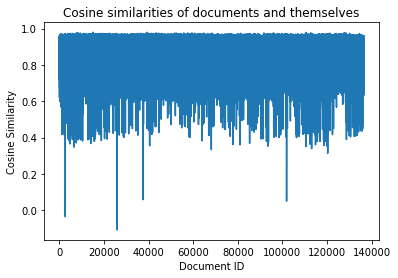

In [54]:
plt.plot(range(len(documents)), doc_similarities)
plt.xlabel('Document ID')
plt.ylabel('Cosine Similarity')
plt.title('Cosine similarities of documents and themselves')
plt.show()

In [6]:
model = Doc2Vec(vector_size=100, window=3, min_count=20, workers=4, epochs=500)

2022-05-26 07:46:39,840 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec(dm/m,d100,n5,w3,mc20,s0.001,t4)', 'datetime': '2022-05-26T07:46:39.840256', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}


In [7]:
model.build_vocab(documents)

2022-05-26 07:46:39,854 : INFO : collecting all words and their counts
2022-05-26 07:46:39,855 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2022-05-26 07:46:39,873 : INFO : PROGRESS: at example #10000, processed 58495 words (3307942/s), 8444 word types, 0 tags
2022-05-26 07:46:39,890 : INFO : PROGRESS: at example #20000, processed 119066 words (3683762/s), 14182 word types, 0 tags
2022-05-26 07:46:39,908 : INFO : PROGRESS: at example #30000, processed 182038 words (3685245/s), 20375 word types, 0 tags
2022-05-26 07:46:39,939 : INFO : PROGRESS: at example #40000, processed 247145 words (2079816/s), 27163 word types, 0 tags
2022-05-26 07:46:39,960 : INFO : PROGRESS: at example #50000, processed 310852 words (3127230/s), 33299 word types, 0 tags
2022-05-26 07:46:39,980 : INFO : PROGRESS: at example #60000, processed 372821 words (3231743/s), 38509 word types, 0 tags
2022-05-26 07:46:40,002 : INFO : PROGRESS: at example #70000, processed 432306 words (284

In [8]:
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

2022-05-26 07:46:40,319 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 2163 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=3 shrink_windows=True', 'datetime': '2022-05-26T07:46:40.319490', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'train'}
2022-05-26 07:46:41,448 : INFO : EPOCH 1 - PROGRESS: at 11.20% examples, 55238 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:46:42,581 : INFO : EPOCH 1 - PROGRESS: at 29.63% examples, 73235 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:46:43,845 : INFO : EPOCH 1 - PROGRESS: at 48.47% examples, 75207 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:46:44,860 : INFO : EPOCH 1 - PROGRESS: at 64.35% examples, 75962 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:46:45,997 : INFO : EPOCH 1 - PROGRESS: at 83.21% examples, 78845 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:46:46,683 : INFO : worke

2022-05-26 07:47:30,630 : INFO : EPOCH 8 - PROGRESS: at 89.05% examples, 82697 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:47:31,076 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 07:47:31,090 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 07:47:31,110 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 07:47:31,121 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 07:47:31,122 : INFO : EPOCH - 8 : training on 804638 raw words (516548 effective words) took 6.1s, 84027 effective words/s
2022-05-26 07:47:32,291 : INFO : EPOCH 9 - PROGRESS: at 15.84% examples, 72280 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:47:33,297 : INFO : EPOCH 9 - PROGRESS: at 33.13% examples, 82209 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:47:34,488 : INFO : EPOCH 9 - PROGRESS: at 48.47% examples, 77162 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:47:35,508 : INFO : EPOCH 9 - PROGRESS: a

2022-05-26 07:48:17,655 : INFO : EPOCH 16 - PROGRESS: at 34.24% examples, 80952 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:48:18,809 : INFO : EPOCH 16 - PROGRESS: at 53.53% examples, 83223 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:48:19,985 : INFO : EPOCH 16 - PROGRESS: at 73.61% examples, 84551 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:48:20,992 : INFO : EPOCH 16 - PROGRESS: at 91.61% examples, 85701 words/s, in_qsize 6, out_qsize 0
2022-05-26 07:48:21,322 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 07:48:21,358 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 07:48:21,377 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 07:48:21,387 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 07:48:21,387 : INFO : EPOCH - 16 : training on 804638 raw words (516766 effective words) took 6.0s, 86044 effective words/s
2022-05-26 07:48:22,562 : INFO : EPOCH 17 - PROGR

2022-05-26 07:49:02,157 : INFO : EPOCH - 23 : training on 804638 raw words (516406 effective words) took 5.8s, 88545 effective words/s
2022-05-26 07:49:03,356 : INFO : EPOCH 24 - PROGRESS: at 15.84% examples, 70501 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:49:04,448 : INFO : EPOCH 24 - PROGRESS: at 34.24% examples, 80788 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:49:05,459 : INFO : EPOCH 24 - PROGRESS: at 52.23% examples, 84740 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:49:06,576 : INFO : EPOCH 24 - PROGRESS: at 69.64% examples, 82742 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:49:07,692 : INFO : EPOCH 24 - PROGRESS: at 89.05% examples, 84757 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:49:08,036 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 07:49:08,080 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 07:49:08,103 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 07:49:08,114 : I

2022-05-26 07:49:48,923 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 07:49:48,947 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 07:49:48,957 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 07:49:48,957 : INFO : EPOCH - 31 : training on 804638 raw words (516784 effective words) took 5.9s, 87414 effective words/s
2022-05-26 07:49:50,096 : INFO : EPOCH 32 - PROGRESS: at 15.84% examples, 74308 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:49:51,272 : INFO : EPOCH 32 - PROGRESS: at 34.24% examples, 79890 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:49:52,284 : INFO : EPOCH 32 - PROGRESS: at 50.98% examples, 82125 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:49:53,381 : INFO : EPOCH 32 - PROGRESS: at 69.68% examples, 82657 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:49:54,398 : INFO : EPOCH 32 - PROGRESS: at 86.61% examples, 83877 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:49:54,971 : I

2022-05-26 07:50:34,904 : INFO : EPOCH 39 - PROGRESS: at 72.61% examples, 86771 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:50:35,906 : INFO : EPOCH 39 - PROGRESS: at 89.05% examples, 86419 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:50:36,336 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 07:50:36,377 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 07:50:36,380 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 07:50:36,403 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 07:50:36,404 : INFO : EPOCH - 39 : training on 804638 raw words (516367 effective words) took 5.9s, 87387 effective words/s
2022-05-26 07:50:37,620 : INFO : EPOCH 40 - PROGRESS: at 15.84% examples, 69328 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:50:38,745 : INFO : EPOCH 40 - PROGRESS: at 34.24% examples, 78896 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:50:39,903 : INFO : EPOCH 40 - PROGR

2022-05-26 07:51:21,005 : INFO : EPOCH 47 - PROGRESS: at 33.13% examples, 81845 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:51:22,103 : INFO : EPOCH 47 - PROGRESS: at 48.47% examples, 79088 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:51:23,128 : INFO : EPOCH 47 - PROGRESS: at 68.71% examples, 83336 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:51:24,200 : INFO : EPOCH 47 - PROGRESS: at 83.21% examples, 82169 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:51:24,853 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 07:51:24,885 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 07:51:24,909 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 07:51:24,923 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 07:51:24,924 : INFO : EPOCH - 47 : training on 804638 raw words (516387 effective words) took 6.1s, 84772 effective words/s
2022-05-26 07:51:26,093 : INFO : EPOCH 48 - PROGR

2022-05-26 07:52:06,149 : INFO : EPOCH - 54 : training on 804638 raw words (516371 effective words) took 5.9s, 87400 effective words/s
2022-05-26 07:52:07,264 : INFO : EPOCH 55 - PROGRESS: at 15.84% examples, 75860 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:52:08,281 : INFO : EPOCH 55 - PROGRESS: at 33.13% examples, 83948 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:52:09,282 : INFO : EPOCH 55 - PROGRESS: at 48.47% examples, 82931 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:52:10,425 : INFO : EPOCH 55 - PROGRESS: at 69.64% examples, 85431 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:52:11,474 : INFO : EPOCH 55 - PROGRESS: at 87.99% examples, 86880 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:52:11,980 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 07:52:12,044 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 07:52:12,049 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 07:52:12,062 : I

2022-05-26 07:52:54,169 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 07:52:54,204 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 07:52:54,218 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 07:52:54,219 : INFO : EPOCH - 62 : training on 804638 raw words (516557 effective words) took 6.0s, 85681 effective words/s
2022-05-26 07:52:55,399 : INFO : EPOCH 63 - PROGRESS: at 15.84% examples, 72019 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:52:56,546 : INFO : EPOCH 63 - PROGRESS: at 34.24% examples, 79589 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:52:57,567 : INFO : EPOCH 63 - PROGRESS: at 52.23% examples, 83533 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:52:58,595 : INFO : EPOCH 63 - PROGRESS: at 68.71% examples, 82133 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:52:59,783 : INFO : EPOCH 63 - PROGRESS: at 83.21% examples, 79499 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:53:00,507 : I

2022-05-26 07:53:42,671 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 07:53:42,684 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 07:53:42,685 : INFO : EPOCH - 69 : training on 804638 raw words (515919 effective words) took 6.2s, 82657 effective words/s
2022-05-26 07:53:43,833 : INFO : EPOCH 70 - PROGRESS: at 15.84% examples, 73558 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:53:44,861 : INFO : EPOCH 70 - PROGRESS: at 34.24% examples, 84897 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:53:46,051 : INFO : EPOCH 70 - PROGRESS: at 53.53% examples, 84997 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:53:47,058 : INFO : EPOCH 70 - PROGRESS: at 69.64% examples, 83544 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:53:48,060 : INFO : EPOCH 70 - PROGRESS: at 86.61% examples, 84833 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:53:48,668 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 07:53:48,684 : I

2022-05-26 07:54:30,041 : INFO : EPOCH 77 - PROGRESS: at 29.63% examples, 73576 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:54:31,059 : INFO : EPOCH 77 - PROGRESS: at 44.84% examples, 75282 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:54:32,065 : INFO : EPOCH 77 - PROGRESS: at 60.09% examples, 76126 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:54:33,103 : INFO : EPOCH 77 - PROGRESS: at 74.65% examples, 75613 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:54:34,209 : INFO : EPOCH 77 - PROGRESS: at 90.51% examples, 74913 words/s, in_qsize 6, out_qsize 1
2022-05-26 07:54:34,522 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 07:54:34,600 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 07:54:34,615 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 07:54:34,650 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 07:54:34,651 : INFO : EPOCH - 77 : training on 804638 raw wo

2022-05-26 07:55:17,451 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 07:55:17,455 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 07:55:17,455 : INFO : EPOCH - 84 : training on 804638 raw words (516470 effective words) took 6.1s, 84493 effective words/s
2022-05-26 07:55:18,650 : INFO : EPOCH 85 - PROGRESS: at 15.84% examples, 70777 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:55:19,724 : INFO : EPOCH 85 - PROGRESS: at 34.24% examples, 81612 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:55:20,891 : INFO : EPOCH 85 - PROGRESS: at 53.53% examples, 83418 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:55:22,015 : INFO : EPOCH 85 - PROGRESS: at 73.71% examples, 85684 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:55:23,029 : INFO : EPOCH 85 - PROGRESS: at 90.15% examples, 85321 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:55:23,344 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 07:55:23,368 : I

2022-05-26 07:56:05,393 : INFO : EPOCH 92 - PROGRESS: at 89.05% examples, 86707 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:56:05,850 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 07:56:05,865 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 07:56:05,877 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 07:56:05,894 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 07:56:05,895 : INFO : EPOCH - 92 : training on 804638 raw words (516557 effective words) took 5.9s, 87594 effective words/s
2022-05-26 07:56:07,067 : INFO : EPOCH 93 - PROGRESS: at 15.84% examples, 72402 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:56:08,159 : INFO : EPOCH 93 - PROGRESS: at 34.24% examples, 81887 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:56:09,211 : INFO : EPOCH 93 - PROGRESS: at 52.23% examples, 84501 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:56:10,283 : INFO : EPOCH 93 - PROGR

2022-05-26 07:56:51,320 : INFO : EPOCH 100 - PROGRESS: at 53.53% examples, 83427 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:56:52,442 : INFO : EPOCH 100 - PROGRESS: at 73.71% examples, 85741 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:56:53,479 : INFO : EPOCH 100 - PROGRESS: at 92.50% examples, 87306 words/s, in_qsize 5, out_qsize 0
2022-05-26 07:56:53,717 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 07:56:53,761 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 07:56:53,791 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 07:56:53,802 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 07:56:53,802 : INFO : EPOCH - 100 : training on 804638 raw words (516797 effective words) took 5.9s, 87573 effective words/s
2022-05-26 07:56:54,958 : INFO : EPOCH 101 - PROGRESS: at 15.84% examples, 72966 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:56:56,060 : INFO : EPOCH 101 -

2022-05-26 07:57:35,583 : INFO : EPOCH - 107 : training on 804638 raw words (516555 effective words) took 5.9s, 87182 effective words/s
2022-05-26 07:57:36,754 : INFO : EPOCH 108 - PROGRESS: at 15.84% examples, 72193 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:57:37,824 : INFO : EPOCH 108 - PROGRESS: at 34.24% examples, 82557 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:57:38,996 : INFO : EPOCH 108 - PROGRESS: at 53.53% examples, 83958 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:57:40,015 : INFO : EPOCH 108 - PROGRESS: at 70.59% examples, 83905 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:57:41,067 : INFO : EPOCH 108 - PROGRESS: at 87.99% examples, 84378 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:57:41,653 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 07:57:41,698 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 07:57:41,719 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 07:57:41,7

2022-05-26 07:58:23,772 : INFO : EPOCH 115 - PROGRESS: at 89.05% examples, 85415 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:58:24,203 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 07:58:24,237 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 07:58:24,252 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 07:58:24,265 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 07:58:24,265 : INFO : EPOCH - 115 : training on 804638 raw words (516998 effective words) took 6.0s, 86514 effective words/s
2022-05-26 07:58:25,479 : INFO : EPOCH 116 - PROGRESS: at 15.84% examples, 69646 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:58:26,600 : INFO : EPOCH 116 - PROGRESS: at 34.24% examples, 79227 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:58:27,777 : INFO : EPOCH 116 - PROGRESS: at 53.53% examples, 81434 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:58:28,994 : INFO : EPOCH 116 -

2022-05-26 07:59:08,981 : INFO : EPOCH - 122 : training on 804638 raw words (516520 effective words) took 6.3s, 81879 effective words/s
2022-05-26 07:59:10,011 : INFO : EPOCH 123 - PROGRESS: at 11.20% examples, 56706 words/s, in_qsize 7, out_qsize 0
2022-05-26 07:59:11,254 : INFO : EPOCH 123 - PROGRESS: at 29.63% examples, 70538 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:59:12,256 : INFO : EPOCH 123 - PROGRESS: at 47.22% examples, 77435 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:59:13,288 : INFO : EPOCH 123 - PROGRESS: at 63.07% examples, 77476 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:59:14,305 : INFO : EPOCH 123 - PROGRESS: at 76.83% examples, 76892 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:59:15,323 : INFO : EPOCH 123 - PROGRESS: at 92.50% examples, 76986 words/s, in_qsize 5, out_qsize 0
2022-05-26 07:59:15,648 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 07:59:15,677 : INFO : worker thread finished; awaiting finish of 2 more thread

2022-05-26 07:59:58,096 : INFO : EPOCH 130 - PROGRESS: at 48.46% examples, 72990 words/s, in_qsize 8, out_qsize 0
2022-05-26 07:59:59,235 : INFO : EPOCH 130 - PROGRESS: at 64.35% examples, 72273 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:00:00,237 : INFO : EPOCH 130 - PROGRESS: at 80.53% examples, 75243 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:00:01,250 : INFO : EPOCH 130 - PROGRESS: at 93.52% examples, 73542 words/s, in_qsize 4, out_qsize 0
2022-05-26 08:00:01,394 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:00:01,414 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:00:01,445 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:00:01,454 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:00:01,454 : INFO : EPOCH - 130 : training on 804638 raw words (516512 effective words) took 6.9s, 74801 effective words/s
2022-05-26 08:00:02,674 : INFO : EPOCH 131 -

2022-05-26 08:00:45,448 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:00:45,449 : INFO : EPOCH - 137 : training on 804638 raw words (516469 effective words) took 6.3s, 81467 effective words/s
2022-05-26 08:00:46,484 : INFO : EPOCH 138 - PROGRESS: at 12.34% examples, 63518 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:00:47,634 : INFO : EPOCH 138 - PROGRESS: at 29.63% examples, 73766 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:00:48,814 : INFO : EPOCH 138 - PROGRESS: at 48.47% examples, 77473 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:00:49,943 : INFO : EPOCH 138 - PROGRESS: at 64.74% examples, 75861 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:00:51,200 : INFO : EPOCH 138 - PROGRESS: at 83.21% examples, 77046 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:00:51,962 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:00:51,993 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:00:52,0

2022-05-26 08:01:34,479 : INFO : EPOCH 145 - PROGRESS: at 49.71% examples, 77226 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:01:35,530 : INFO : EPOCH 145 - PROGRESS: at 68.71% examples, 79812 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:01:36,630 : INFO : EPOCH 145 - PROGRESS: at 83.21% examples, 78947 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:01:37,348 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:01:37,398 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:01:37,421 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:01:37,426 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:01:37,426 : INFO : EPOCH - 145 : training on 804638 raw words (516712 effective words) took 6.4s, 80930 effective words/s
2022-05-26 08:01:38,466 : INFO : EPOCH 146 - PROGRESS: at 11.20% examples, 55993 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:01:39,627 : INFO : EPOCH 146 -

2022-05-26 08:02:21,702 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:02:21,712 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:02:21,712 : INFO : EPOCH - 152 : training on 804638 raw words (516346 effective words) took 6.3s, 81963 effective words/s
2022-05-26 08:02:22,925 : INFO : EPOCH 153 - PROGRESS: at 15.84% examples, 69645 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:02:24,045 : INFO : EPOCH 153 - PROGRESS: at 34.24% examples, 79210 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:02:25,064 : INFO : EPOCH 153 - PROGRESS: at 49.71% examples, 79483 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:02:26,120 : INFO : EPOCH 153 - PROGRESS: at 64.74% examples, 77119 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:02:27,276 : INFO : EPOCH 153 - PROGRESS: at 83.21% examples, 79461 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:02:27,984 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:02:28,0

2022-05-26 08:03:10,819 : INFO : EPOCH 160 - PROGRESS: at 64.35% examples, 75222 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:03:11,987 : INFO : EPOCH 160 - PROGRESS: at 83.21% examples, 77829 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:03:12,693 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:03:12,706 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:03:12,733 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:03:12,743 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:03:12,744 : INFO : EPOCH - 160 : training on 804638 raw words (516968 effective words) took 6.4s, 80409 effective words/s
2022-05-26 08:03:13,975 : INFO : EPOCH 161 - PROGRESS: at 15.84% examples, 68744 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:03:15,209 : INFO : EPOCH 161 - PROGRESS: at 34.24% examples, 75032 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:03:16,217 : INFO : EPOCH 161 -

2022-05-26 08:03:58,192 : INFO : EPOCH 168 - PROGRESS: at 14.76% examples, 75917 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:03:59,300 : INFO : EPOCH 168 - PROGRESS: at 29.63% examples, 74955 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:04:00,493 : INFO : EPOCH 168 - PROGRESS: at 48.47% examples, 77990 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:04:01,495 : INFO : EPOCH 168 - PROGRESS: at 67.70% examples, 81508 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:04:02,639 : INFO : EPOCH 168 - PROGRESS: at 83.21% examples, 80743 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:04:03,342 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:04:03,371 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:04:03,391 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:04:03,402 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:04:03,402 : INFO : EPOCH - 168 : training on 804638 

2022-05-26 08:04:47,301 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:04:47,314 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:04:47,314 : INFO : EPOCH - 175 : training on 804638 raw words (516741 effective words) took 6.2s, 83560 effective words/s
2022-05-26 08:04:48,567 : INFO : EPOCH 176 - PROGRESS: at 15.84% examples, 67186 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:04:49,725 : INFO : EPOCH 176 - PROGRESS: at 34.24% examples, 76480 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:04:50,753 : INFO : EPOCH 176 - PROGRESS: at 52.23% examples, 81175 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:04:51,761 : INFO : EPOCH 176 - PROGRESS: at 65.36% examples, 77667 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:04:52,967 : INFO : EPOCH 176 - PROGRESS: at 83.21% examples, 78165 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:04:53,807 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:04:53,8

2022-05-26 08:05:36,746 : INFO : EPOCH 183 - PROGRESS: at 69.64% examples, 79743 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:05:37,786 : INFO : EPOCH 183 - PROGRESS: at 86.61% examples, 81107 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:05:38,439 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:05:38,476 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:05:38,511 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:05:38,518 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:05:38,519 : INFO : EPOCH - 183 : training on 804638 raw words (516623 effective words) took 6.3s, 81463 effective words/s
2022-05-26 08:05:39,535 : INFO : EPOCH 184 - PROGRESS: at 14.76% examples, 76612 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:05:40,710 : INFO : EPOCH 184 - PROGRESS: at 29.63% examples, 72996 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:05:41,928 : INFO : EPOCH 184 -

2022-05-26 08:06:24,172 : INFO : EPOCH 191 - PROGRESS: at 11.17% examples, 57274 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:06:25,352 : INFO : EPOCH 191 - PROGRESS: at 29.63% examples, 72828 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:06:26,592 : INFO : EPOCH 191 - PROGRESS: at 48.47% examples, 75529 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:06:27,592 : INFO : EPOCH 191 - PROGRESS: at 64.08% examples, 76423 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:06:28,784 : INFO : EPOCH 191 - PROGRESS: at 83.21% examples, 78557 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:06:29,415 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:06:29,440 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:06:29,492 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:06:29,497 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:06:29,498 : INFO : EPOCH - 191 : training on 804638 

2022-05-26 08:07:13,625 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:07:13,638 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:07:13,638 : INFO : EPOCH - 198 : training on 804638 raw words (516601 effective words) took 6.1s, 84794 effective words/s
2022-05-26 08:07:14,771 : INFO : EPOCH 199 - PROGRESS: at 15.84% examples, 74987 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:07:15,910 : INFO : EPOCH 199 - PROGRESS: at 34.24% examples, 81581 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:07:16,918 : INFO : EPOCH 199 - PROGRESS: at 52.23% examples, 85384 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:07:17,962 : INFO : EPOCH 199 - PROGRESS: at 64.35% examples, 78640 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:07:18,964 : INFO : EPOCH 199 - PROGRESS: at 81.72% examples, 81895 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:07:19,860 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:07:19,8

2022-05-26 08:08:01,710 : INFO : EPOCH 206 - PROGRESS: at 43.64% examples, 72101 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:08:02,723 : INFO : EPOCH 206 - PROGRESS: at 60.09% examples, 75112 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:08:03,946 : INFO : EPOCH 206 - PROGRESS: at 77.95% examples, 75768 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:08:05,066 : INFO : EPOCH 206 - PROGRESS: at 95.05% examples, 75782 words/s, in_qsize 3, out_qsize 1
2022-05-26 08:08:05,069 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:08:05,089 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:08:05,179 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:08:05,194 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:08:05,195 : INFO : EPOCH - 206 : training on 804638 raw words (516533 effective words) took 6.7s, 76887 effective words/s
2022-05-26 08:08:06,438 : INFO : EPOCH 207 -

2022-05-26 08:08:50,580 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:08:50,593 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:08:50,642 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:08:50,646 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:08:50,646 : INFO : EPOCH - 213 : training on 804638 raw words (516648 effective words) took 6.3s, 81850 effective words/s
2022-05-26 08:08:51,823 : INFO : EPOCH 214 - PROGRESS: at 15.84% examples, 71738 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:08:52,932 : INFO : EPOCH 214 - PROGRESS: at 34.24% examples, 80839 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:08:53,952 : INFO : EPOCH 214 - PROGRESS: at 52.23% examples, 84614 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:08:55,128 : INFO : EPOCH 214 - PROGRESS: at 69.64% examples, 81549 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:08:56,165 : INFO : EPOCH 214 -

2022-05-26 08:09:37,172 : INFO : EPOCH 221 - PROGRESS: at 15.84% examples, 66411 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:09:38,272 : INFO : EPOCH 221 - PROGRESS: at 34.24% examples, 78005 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:09:39,539 : INFO : EPOCH 221 - PROGRESS: at 53.53% examples, 78701 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:09:40,541 : INFO : EPOCH 221 - PROGRESS: at 69.64% examples, 78759 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:09:41,558 : INFO : EPOCH 221 - PROGRESS: at 86.61% examples, 80676 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:09:42,115 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:09:42,158 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:09:42,188 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:09:42,193 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:09:42,193 : INFO : EPOCH - 221 : training on 804638 

2022-05-26 08:10:26,529 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:10:26,575 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:10:26,584 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:10:26,585 : INFO : EPOCH - 228 : training on 804638 raw words (516782 effective words) took 6.5s, 79310 effective words/s
2022-05-26 08:10:27,782 : INFO : EPOCH 229 - PROGRESS: at 15.84% examples, 70462 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:10:28,939 : INFO : EPOCH 229 - PROGRESS: at 34.24% examples, 78372 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:10:30,162 : INFO : EPOCH 229 - PROGRESS: at 53.53% examples, 79995 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:10:31,181 : INFO : EPOCH 229 - PROGRESS: at 72.61% examples, 83561 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:10:32,190 : INFO : EPOCH 229 - PROGRESS: at 87.99% examples, 82551 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:10:32,8

2022-05-26 08:11:13,787 : INFO : EPOCH 236 - PROGRESS: at 34.24% examples, 75523 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:11:15,011 : INFO : EPOCH 236 - PROGRESS: at 53.53% examples, 77974 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:11:16,043 : INFO : EPOCH 236 - PROGRESS: at 72.61% examples, 81650 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:11:17,129 : INFO : EPOCH 236 - PROGRESS: at 89.05% examples, 81002 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:11:17,541 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:11:17,568 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:11:17,587 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:11:17,598 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:11:17,599 : INFO : EPOCH - 236 : training on 804638 raw words (516549 effective words) took 6.2s, 82725 effective words/s
2022-05-26 08:11:18,789 : INFO : EPOCH 237 -

2022-05-26 08:12:01,481 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:12:01,495 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:12:01,495 : INFO : EPOCH - 243 : training on 804638 raw words (515827 effective words) took 6.3s, 81720 effective words/s
2022-05-26 08:12:02,742 : INFO : EPOCH 244 - PROGRESS: at 15.84% examples, 67868 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:12:03,859 : INFO : EPOCH 244 - PROGRESS: at 34.24% examples, 78200 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:12:04,860 : INFO : EPOCH 244 - PROGRESS: at 49.71% examples, 79164 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:12:05,927 : INFO : EPOCH 244 - PROGRESS: at 64.08% examples, 76583 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:12:07,157 : INFO : EPOCH 244 - PROGRESS: at 83.21% examples, 78169 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:12:07,850 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:12:07,8

2022-05-26 08:12:50,191 : INFO : EPOCH 251 - PROGRESS: at 64.35% examples, 77960 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:12:51,417 : INFO : EPOCH 251 - PROGRESS: at 83.21% examples, 79262 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:12:52,166 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:12:52,197 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:12:52,220 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:12:52,230 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:12:52,230 : INFO : EPOCH - 251 : training on 804638 raw words (516899 effective words) took 6.4s, 80992 effective words/s
2022-05-26 08:12:53,397 : INFO : EPOCH 252 - PROGRESS: at 15.84% examples, 72355 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:12:54,558 : INFO : EPOCH 252 - PROGRESS: at 34.24% examples, 79373 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:12:55,764 : INFO : EPOCH 252 -

2022-05-26 08:13:37,438 : INFO : EPOCH 259 - PROGRESS: at 15.84% examples, 69282 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:13:38,624 : INFO : EPOCH 259 - PROGRESS: at 34.24% examples, 76854 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:13:39,653 : INFO : EPOCH 259 - PROGRESS: at 50.98% examples, 79475 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:13:40,655 : INFO : EPOCH 259 - PROGRESS: at 67.70% examples, 79587 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:13:41,881 : INFO : EPOCH 259 - PROGRESS: at 83.21% examples, 78073 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:13:42,629 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:13:42,637 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:13:42,671 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:13:42,679 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:13:42,679 : INFO : EPOCH - 259 : training on 804638 

2022-05-26 08:14:26,791 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:14:26,830 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:14:26,838 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:14:26,839 : INFO : EPOCH - 266 : training on 804638 raw words (516540 effective words) took 6.4s, 80670 effective words/s
2022-05-26 08:14:28,014 : INFO : EPOCH 267 - PROGRESS: at 15.84% examples, 71770 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:14:29,155 : INFO : EPOCH 267 - PROGRESS: at 34.24% examples, 79732 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:14:30,352 : INFO : EPOCH 267 - PROGRESS: at 53.53% examples, 81454 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:14:31,361 : INFO : EPOCH 267 - PROGRESS: at 72.61% examples, 84855 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:14:32,380 : INFO : EPOCH 267 - PROGRESS: at 84.74% examples, 81005 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:14:32,9

2022-05-26 08:15:13,162 : INFO : EPOCH 274 - PROGRESS: at 30.79% examples, 73541 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:15:14,367 : INFO : EPOCH 274 - PROGRESS: at 48.47% examples, 74897 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:15:15,447 : INFO : EPOCH 274 - PROGRESS: at 64.74% examples, 74741 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:15:16,460 : INFO : EPOCH 274 - PROGRESS: at 81.72% examples, 78337 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:15:17,470 : INFO : EPOCH 274 - PROGRESS: at 95.05% examples, 76163 words/s, in_qsize 3, out_qsize 1
2022-05-26 08:15:17,471 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:15:17,494 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:15:17,529 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:15:17,542 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:15:17,543 : INFO : EPOCH - 274 : training on 804638 

2022-05-26 08:16:02,266 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:16:02,310 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:16:02,322 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:16:02,322 : INFO : EPOCH - 281 : training on 804638 raw words (516428 effective words) took 6.4s, 80407 effective words/s
2022-05-26 08:16:03,596 : INFO : EPOCH 282 - PROGRESS: at 15.84% examples, 66201 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:16:04,616 : INFO : EPOCH 282 - PROGRESS: at 29.63% examples, 69867 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:16:05,914 : INFO : EPOCH 282 - PROGRESS: at 48.47% examples, 72311 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:16:06,945 : INFO : EPOCH 282 - PROGRESS: at 64.08% examples, 73467 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:16:08,135 : INFO : EPOCH 282 - PROGRESS: at 83.21% examples, 76127 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:16:08,9

2022-05-26 08:16:51,853 : INFO : EPOCH 289 - PROGRESS: at 72.61% examples, 82766 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:16:52,997 : INFO : EPOCH 289 - PROGRESS: at 89.05% examples, 81131 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:16:53,386 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:16:53,414 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:16:53,444 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:16:53,454 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:16:53,454 : INFO : EPOCH - 289 : training on 804638 raw words (516907 effective words) took 6.2s, 83008 effective words/s
2022-05-26 08:16:54,707 : INFO : EPOCH 290 - PROGRESS: at 15.84% examples, 67341 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:16:55,930 : INFO : EPOCH 290 - PROGRESS: at 34.24% examples, 74625 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:16:56,944 : INFO : EPOCH 290 -

2022-05-26 08:17:37,783 : INFO : EPOCH - 296 : training on 804638 raw words (516773 effective words) took 6.2s, 83318 effective words/s
2022-05-26 08:17:39,016 : INFO : EPOCH 297 - PROGRESS: at 15.84% examples, 68387 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:17:40,177 : INFO : EPOCH 297 - PROGRESS: at 34.24% examples, 77118 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:17:41,208 : INFO : EPOCH 297 - PROGRESS: at 50.98% examples, 79647 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:17:42,255 : INFO : EPOCH 297 - PROGRESS: at 64.08% examples, 75826 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:17:43,492 : INFO : EPOCH 297 - PROGRESS: at 83.21% examples, 77449 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:17:44,192 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:17:44,226 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:17:44,259 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:17:44,2

2022-05-26 08:18:28,857 : INFO : EPOCH 304 - PROGRESS: at 83.21% examples, 76917 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:18:29,506 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:18:29,538 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:18:29,576 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:18:29,580 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:18:29,580 : INFO : EPOCH - 304 : training on 804638 raw words (516393 effective words) took 6.5s, 79977 effective words/s
2022-05-26 08:18:30,756 : INFO : EPOCH 305 - PROGRESS: at 15.84% examples, 71784 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:18:31,858 : INFO : EPOCH 305 - PROGRESS: at 34.24% examples, 81181 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:18:33,073 : INFO : EPOCH 305 - PROGRESS: at 53.53% examples, 82003 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:18:34,077 : INFO : EPOCH 305 -

2022-05-26 08:19:14,498 : INFO : EPOCH 312 - PROGRESS: at 11.20% examples, 55870 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:19:15,677 : INFO : EPOCH 312 - PROGRESS: at 29.63% examples, 72101 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:19:16,770 : INFO : EPOCH 312 - PROGRESS: at 48.47% examples, 78484 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:19:17,961 : INFO : EPOCH 312 - PROGRESS: at 64.08% examples, 75403 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:19:19,199 : INFO : EPOCH 312 - PROGRESS: at 83.21% examples, 77043 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:19:19,889 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:19:19,918 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:19:19,953 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:19:19,967 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:19:19,967 : INFO : EPOCH - 312 : training on 804638 

2022-05-26 08:20:04,146 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:20:04,168 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:20:04,175 : INFO : EPOCH 319 - PROGRESS: at 100.00% examples, 78852 words/s, in_qsize 0, out_qsize 1
2022-05-26 08:20:04,175 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:20:04,176 : INFO : EPOCH - 319 : training on 804638 raw words (516748 effective words) took 6.6s, 78842 effective words/s
2022-05-26 08:20:05,358 : INFO : EPOCH 320 - PROGRESS: at 15.84% examples, 71462 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:20:06,376 : INFO : EPOCH 320 - PROGRESS: at 33.13% examples, 81231 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:20:07,430 : INFO : EPOCH 320 - PROGRESS: at 48.47% examples, 79699 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:20:08,546 : INFO : EPOCH 320 - PROGRESS: at 64.74% examples, 77648 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:20:09,

2022-05-26 08:20:50,598 : INFO : EPOCH 327 - PROGRESS: at 34.24% examples, 81166 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:20:51,598 : INFO : EPOCH 327 - PROGRESS: at 49.71% examples, 81326 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:20:52,818 : INFO : EPOCH 327 - PROGRESS: at 69.64% examples, 81230 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:20:53,822 : INFO : EPOCH 327 - PROGRESS: at 84.74% examples, 81635 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:20:54,494 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:20:54,521 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:20:54,558 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:20:54,569 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:20:54,570 : INFO : EPOCH - 327 : training on 804638 raw words (516767 effective words) took 6.2s, 82862 effective words/s
2022-05-26 08:20:55,780 : INFO : EPOCH 328 -

2022-05-26 08:21:38,876 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:21:38,884 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:21:38,885 : INFO : EPOCH - 334 : training on 804638 raw words (516975 effective words) took 6.2s, 83099 effective words/s
2022-05-26 08:21:40,024 : INFO : EPOCH 335 - PROGRESS: at 15.84% examples, 73926 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:21:41,201 : INFO : EPOCH 335 - PROGRESS: at 34.24% examples, 79675 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:21:42,228 : INFO : EPOCH 335 - PROGRESS: at 50.98% examples, 81559 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:21:43,421 : INFO : EPOCH 335 - PROGRESS: at 69.64% examples, 80440 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:21:44,438 : INFO : EPOCH 335 - PROGRESS: at 86.61% examples, 82054 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:21:45,037 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:21:45,0

2022-05-26 08:22:28,472 : INFO : EPOCH 342 - PROGRESS: at 86.61% examples, 82853 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:22:29,131 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:22:29,158 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:22:29,186 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:22:29,196 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:22:29,196 : INFO : EPOCH - 342 : training on 804638 raw words (516228 effective words) took 6.2s, 83109 effective words/s
2022-05-26 08:22:30,399 : INFO : EPOCH 343 - PROGRESS: at 15.84% examples, 70111 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:22:31,546 : INFO : EPOCH 343 - PROGRESS: at 34.24% examples, 78585 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:22:32,799 : INFO : EPOCH 343 - PROGRESS: at 53.53% examples, 79312 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:22:33,954 : INFO : EPOCH 343 -

2022-05-26 08:23:14,793 : INFO : EPOCH 350 - PROGRESS: at 15.84% examples, 70062 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:23:15,907 : INFO : EPOCH 350 - PROGRESS: at 34.24% examples, 79614 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:23:16,909 : INFO : EPOCH 350 - PROGRESS: at 52.23% examples, 84156 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:23:17,924 : INFO : EPOCH 350 - PROGRESS: at 64.74% examples, 78347 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:23:19,127 : INFO : EPOCH 350 - PROGRESS: at 83.21% examples, 79812 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:23:19,804 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:23:19,832 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:23:19,870 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:23:19,881 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:23:19,881 : INFO : EPOCH - 350 : training on 804638 

2022-05-26 08:24:04,196 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:24:04,205 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:24:04,206 : INFO : EPOCH - 357 : training on 804638 raw words (516352 effective words) took 6.4s, 80872 effective words/s
2022-05-26 08:24:05,485 : INFO : EPOCH 358 - PROGRESS: at 15.84% examples, 65969 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:24:06,632 : INFO : EPOCH 358 - PROGRESS: at 34.24% examples, 76113 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:24:07,636 : INFO : EPOCH 358 - PROGRESS: at 50.98% examples, 79500 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:24:08,649 : INFO : EPOCH 358 - PROGRESS: at 64.74% examples, 76425 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:24:09,886 : INFO : EPOCH 358 - PROGRESS: at 83.21% examples, 77814 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:24:10,565 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:24:10,6

2022-05-26 08:24:53,784 : INFO : EPOCH 365 - PROGRESS: at 75.65% examples, 75972 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:24:54,788 : INFO : EPOCH 365 - PROGRESS: at 91.04% examples, 76367 words/s, in_qsize 6, out_qsize 0
2022-05-26 08:24:55,117 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:24:55,164 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:24:55,186 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:24:55,193 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:24:55,193 : INFO : EPOCH - 365 : training on 804638 raw words (516209 effective words) took 6.7s, 77176 effective words/s
2022-05-26 08:24:56,374 : INFO : EPOCH 366 - PROGRESS: at 15.84% examples, 71892 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:24:57,553 : INFO : EPOCH 366 - PROGRESS: at 34.24% examples, 78561 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:24:58,591 : INFO : EPOCH 366 -

2022-05-26 08:25:39,969 : INFO : EPOCH - 372 : training on 804638 raw words (516580 effective words) took 6.4s, 80308 effective words/s
2022-05-26 08:25:41,174 : INFO : EPOCH 373 - PROGRESS: at 15.84% examples, 69906 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:25:42,355 : INFO : EPOCH 373 - PROGRESS: at 34.24% examples, 77326 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:25:43,358 : INFO : EPOCH 373 - PROGRESS: at 49.71% examples, 78469 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:25:44,458 : INFO : EPOCH 373 - PROGRESS: at 69.64% examples, 81286 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:25:45,664 : INFO : EPOCH 373 - PROGRESS: at 89.05% examples, 82275 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:25:46,058 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:25:46,085 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:25:46,138 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:25:46,1

2022-05-26 08:26:30,246 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:26:30,261 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:26:30,305 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:26:30,315 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:26:30,315 : INFO : EPOCH - 380 : training on 804638 raw words (516725 effective words) took 6.3s, 81963 effective words/s
2022-05-26 08:26:31,339 : INFO : EPOCH 381 - PROGRESS: at 14.76% examples, 76122 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:26:32,415 : INFO : EPOCH 381 - PROGRESS: at 29.63% examples, 76250 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:26:33,520 : INFO : EPOCH 381 - PROGRESS: at 46.07% examples, 76937 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:26:34,537 : INFO : EPOCH 381 - PROGRESS: at 61.54% examples, 77351 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:26:35,587 : INFO : EPOCH 381 -

2022-05-26 08:27:16,070 : INFO : EPOCH 388 - PROGRESS: at 11.20% examples, 56614 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:27:17,214 : INFO : EPOCH 388 - PROGRESS: at 29.63% examples, 73737 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:27:18,449 : INFO : EPOCH 388 - PROGRESS: at 48.47% examples, 76188 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:27:19,468 : INFO : EPOCH 388 - PROGRESS: at 64.74% examples, 76739 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:27:20,569 : INFO : EPOCH 388 - PROGRESS: at 83.21% examples, 79951 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:27:21,320 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:27:21,328 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:27:21,362 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:27:21,369 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:27:21,370 : INFO : EPOCH - 388 : training on 804638 

2022-05-26 08:28:05,589 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:28:05,621 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:28:05,627 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:28:05,627 : INFO : EPOCH - 395 : training on 804638 raw words (516768 effective words) took 6.3s, 82030 effective words/s
2022-05-26 08:28:06,928 : INFO : EPOCH 396 - PROGRESS: at 15.84% examples, 64741 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:28:07,939 : INFO : EPOCH 396 - PROGRESS: at 33.13% examples, 77253 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:28:09,109 : INFO : EPOCH 396 - PROGRESS: at 48.47% examples, 74518 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:28:10,120 : INFO : EPOCH 396 - PROGRESS: at 64.35% examples, 75547 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:28:11,129 : INFO : EPOCH 396 - PROGRESS: at 81.72% examples, 79102 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:28:12,1

2022-05-26 08:28:53,149 : INFO : EPOCH 403 - PROGRESS: at 52.23% examples, 81857 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:28:54,229 : INFO : EPOCH 403 - PROGRESS: at 64.35% examples, 75563 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:28:55,463 : INFO : EPOCH 403 - PROGRESS: at 83.21% examples, 77191 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:28:56,126 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:28:56,169 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:28:56,199 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:28:56,208 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:28:56,209 : INFO : EPOCH - 403 : training on 804638 raw words (516147 effective words) took 6.5s, 79931 effective words/s
2022-05-26 08:28:57,376 : INFO : EPOCH 404 - PROGRESS: at 15.84% examples, 72524 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:28:58,388 : INFO : EPOCH 404 -

2022-05-26 08:29:40,694 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:29:40,694 : INFO : EPOCH - 410 : training on 804638 raw words (517059 effective words) took 6.3s, 82578 effective words/s
2022-05-26 08:29:41,721 : INFO : EPOCH 411 - PROGRESS: at 12.34% examples, 63280 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:29:42,952 : INFO : EPOCH 411 - PROGRESS: at 29.63% examples, 70972 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:29:44,226 : INFO : EPOCH 411 - PROGRESS: at 48.46% examples, 73497 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:29:45,265 : INFO : EPOCH 411 - PROGRESS: at 64.35% examples, 74288 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:29:46,433 : INFO : EPOCH 411 - PROGRESS: at 83.21% examples, 77022 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:29:47,226 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:29:47,238 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:29:47,2

2022-05-26 08:30:29,789 : INFO : EPOCH 418 - PROGRESS: at 67.70% examples, 82542 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:30:30,875 : INFO : EPOCH 418 - PROGRESS: at 83.21% examples, 82445 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:30:31,629 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:30:31,650 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:30:31,662 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:30:31,680 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:30:31,680 : INFO : EPOCH - 418 : training on 804638 raw words (516557 effective words) took 6.2s, 83900 effective words/s
2022-05-26 08:30:32,879 : INFO : EPOCH 419 - PROGRESS: at 15.84% examples, 70627 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:30:34,010 : INFO : EPOCH 419 - PROGRESS: at 34.24% examples, 79507 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:30:35,208 : INFO : EPOCH 419 -

2022-05-26 08:31:15,810 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:31:15,810 : INFO : EPOCH - 425 : training on 804638 raw words (516823 effective words) took 6.4s, 81329 effective words/s
2022-05-26 08:31:17,048 : INFO : EPOCH 426 - PROGRESS: at 15.84% examples, 68092 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:31:18,229 : INFO : EPOCH 426 - PROGRESS: at 34.24% examples, 76334 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:31:19,508 : INFO : EPOCH 426 - PROGRESS: at 53.53% examples, 77341 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:31:20,522 : INFO : EPOCH 426 - PROGRESS: at 72.61% examples, 81482 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:31:21,725 : INFO : EPOCH 426 - PROGRESS: at 89.05% examples, 79288 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:31:22,169 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:31:22,188 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:31:22,2

2022-05-26 08:32:05,416 : INFO : EPOCH 433 - PROGRESS: at 71.56% examples, 80405 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:32:06,423 : INFO : EPOCH 433 - PROGRESS: at 83.21% examples, 77584 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:32:07,144 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:32:07,195 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:32:07,204 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:32:07,212 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:32:07,213 : INFO : EPOCH - 433 : training on 804638 raw words (516344 effective words) took 6.5s, 79735 effective words/s
2022-05-26 08:32:08,271 : INFO : EPOCH 434 - PROGRESS: at 11.20% examples, 55301 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:32:09,437 : INFO : EPOCH 434 - PROGRESS: at 29.63% examples, 72183 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:32:10,449 : INFO : EPOCH 434 -

2022-05-26 08:32:52,729 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:32:52,729 : INFO : EPOCH - 440 : training on 804638 raw words (516977 effective words) took 6.3s, 81865 effective words/s
2022-05-26 08:32:53,766 : INFO : EPOCH 441 - PROGRESS: at 13.50% examples, 68870 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:32:54,836 : INFO : EPOCH 441 - PROGRESS: at 29.63% examples, 76167 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:32:56,017 : INFO : EPOCH 441 - PROGRESS: at 48.47% examples, 79028 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:32:57,058 : INFO : EPOCH 441 - PROGRESS: at 64.74% examples, 78530 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:32:58,250 : INFO : EPOCH 441 - PROGRESS: at 83.21% examples, 80098 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:32:58,951 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:32:58,965 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:32:59,0

2022-05-26 08:33:43,284 : INFO : EPOCH 448 - PROGRESS: at 83.21% examples, 79075 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:33:44,047 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:33:44,073 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:33:44,101 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:33:44,112 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:33:44,112 : INFO : EPOCH - 448 : training on 804638 raw words (516785 effective words) took 6.4s, 80617 effective words/s
2022-05-26 08:33:45,360 : INFO : EPOCH 449 - PROGRESS: at 15.84% examples, 67581 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:33:46,493 : INFO : EPOCH 449 - PROGRESS: at 34.24% examples, 77590 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:33:47,501 : INFO : EPOCH 449 - PROGRESS: at 50.98% examples, 80554 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:33:48,509 : INFO : EPOCH 449 -

2022-05-26 08:34:30,031 : INFO : EPOCH 456 - PROGRESS: at 33.13% examples, 80820 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:34:31,109 : INFO : EPOCH 456 - PROGRESS: at 48.47% examples, 78949 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:34:32,137 : INFO : EPOCH 456 - PROGRESS: at 66.42% examples, 80283 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:34:33,170 : INFO : EPOCH 456 - PROGRESS: at 81.72% examples, 81434 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:34:34,112 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:34:34,112 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:34:34,156 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:34:34,161 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:34:34,162 : INFO : EPOCH - 456 : training on 804638 raw words (516782 effective words) took 6.3s, 81621 effective words/s
2022-05-26 08:34:35,378 : INFO : EPOCH 457 -

2022-05-26 08:35:18,444 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:35:18,444 : INFO : EPOCH - 463 : training on 804638 raw words (516736 effective words) took 6.4s, 81210 effective words/s
2022-05-26 08:35:19,469 : INFO : EPOCH 464 - PROGRESS: at 14.76% examples, 76009 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:35:20,552 : INFO : EPOCH 464 - PROGRESS: at 29.63% examples, 75919 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:35:21,712 : INFO : EPOCH 464 - PROGRESS: at 48.47% examples, 79476 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:35:22,726 : INFO : EPOCH 464 - PROGRESS: at 67.70% examples, 82425 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:35:23,753 : INFO : EPOCH 464 - PROGRESS: at 81.72% examples, 82036 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:35:24,730 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:35:24,740 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:35:24,7

2022-05-26 08:36:08,036 : INFO : EPOCH 471 - PROGRESS: at 83.21% examples, 80050 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:36:08,688 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:36:08,729 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:36:08,758 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:36:08,768 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:36:08,768 : INFO : EPOCH - 471 : training on 804638 raw words (516997 effective words) took 6.2s, 82725 effective words/s
2022-05-26 08:36:09,942 : INFO : EPOCH 472 - PROGRESS: at 15.84% examples, 72003 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:36:10,952 : INFO : EPOCH 472 - PROGRESS: at 30.79% examples, 76238 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:36:12,183 : INFO : EPOCH 472 - PROGRESS: at 48.47% examples, 76059 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:36:13,190 : INFO : EPOCH 472 -

2022-05-26 08:36:54,140 : INFO : EPOCH 479 - PROGRESS: at 15.84% examples, 69470 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:36:55,338 : INFO : EPOCH 479 - PROGRESS: at 34.24% examples, 76595 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:36:56,557 : INFO : EPOCH 479 - PROGRESS: at 53.53% examples, 78851 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:36:57,591 : INFO : EPOCH 479 - PROGRESS: at 69.64% examples, 78278 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:36:58,605 : INFO : EPOCH 479 - PROGRESS: at 83.21% examples, 77877 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:36:59,268 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:36:59,280 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:36:59,308 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:36:59,318 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:36:59,319 : INFO : EPOCH - 479 : training on 804638 

2022-05-26 08:37:42,810 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:37:42,834 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:37:42,845 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:37:42,845 : INFO : EPOCH - 486 : training on 804638 raw words (517036 effective words) took 6.3s, 81706 effective words/s
2022-05-26 08:37:44,068 : INFO : EPOCH 487 - PROGRESS: at 15.84% examples, 68910 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:37:45,140 : INFO : EPOCH 487 - PROGRESS: at 34.24% examples, 80477 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:37:46,179 : INFO : EPOCH 487 - PROGRESS: at 49.71% examples, 79884 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:37:47,190 : INFO : EPOCH 487 - PROGRESS: at 64.74% examples, 78212 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:37:48,245 : INFO : EPOCH 487 - PROGRESS: at 81.72% examples, 80592 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:37:49,1

2022-05-26 08:38:31,688 : INFO : EPOCH 494 - PROGRESS: at 73.71% examples, 81339 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:38:32,690 : INFO : EPOCH 494 - PROGRESS: at 91.04% examples, 83045 words/s, in_qsize 6, out_qsize 0
2022-05-26 08:38:32,986 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 08:38:33,039 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 08:38:33,062 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 08:38:33,071 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 08:38:33,071 : INFO : EPOCH - 494 : training on 804638 raw words (516914 effective words) took 6.2s, 83824 effective words/s
2022-05-26 08:38:34,225 : INFO : EPOCH 495 - PROGRESS: at 15.84% examples, 72892 words/s, in_qsize 7, out_qsize 0
2022-05-26 08:38:35,438 : INFO : EPOCH 495 - PROGRESS: at 34.24% examples, 77818 words/s, in_qsize 8, out_qsize 0
2022-05-26 08:38:36,707 : INFO : EPOCH 495 -

In [9]:
most_similarity = 0
doc_similarities = []
for doc_id in range(len(documents)):
    inferred_vector = model.infer_vector(documents[doc_id].words)
    sims = model.dv.most_similar([inferred_vector], topn=1)
    if sims[0][0] == doc_id:
        most_similarity = most_similarity + 1
    doc_similarities.append(inferred_vector.dot(model.dv[doc_id] / (np.linalg.norm(inferred_vector) * np.linalg.norm(model.dv[doc_id]))))

In [10]:
most_similarity / len(documents)

0.6237797906956293

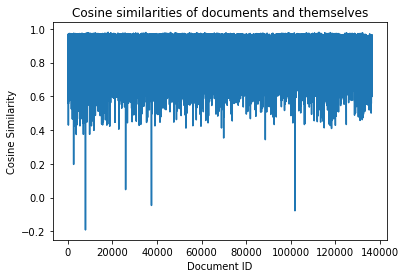

In [11]:
plt.plot(range(len(documents)), doc_similarities)
plt.xlabel('Document ID')
plt.ylabel('Cosine Similarity')
plt.title('Cosine similarities of documents and themselves')
plt.show()

In [6]:
model = Doc2Vec(vector_size=100, window=5, min_count=10, workers=4, epochs=500)

2022-05-27 08:13:14,362 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec(dm/m,d100,n5,w5,mc10,s0.001,t4)', 'datetime': '2022-05-27T08:13:14.362324', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}


In [7]:
model.build_vocab(documents)

2022-05-27 08:13:14,376 : INFO : collecting all words and their counts
2022-05-27 08:13:14,376 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2022-05-27 08:13:14,400 : INFO : PROGRESS: at example #10000, processed 58495 words (2549001/s), 8444 word types, 0 tags
2022-05-27 08:13:14,416 : INFO : PROGRESS: at example #20000, processed 119066 words (3828494/s), 14182 word types, 0 tags
2022-05-27 08:13:14,434 : INFO : PROGRESS: at example #30000, processed 182038 words (3839053/s), 20375 word types, 0 tags
2022-05-27 08:13:14,454 : INFO : PROGRESS: at example #40000, processed 247145 words (3272563/s), 27163 word types, 0 tags
2022-05-27 08:13:14,482 : INFO : PROGRESS: at example #50000, processed 310852 words (2394324/s), 33299 word types, 0 tags
2022-05-27 08:13:14,500 : INFO : PROGRESS: at example #60000, processed 372821 words (3371636/s), 38509 word types, 0 tags
2022-05-27 08:13:14,518 : INFO : PROGRESS: at example #70000, processed 432306 words (325

In [8]:
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

2022-05-27 08:13:14,970 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 4295 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5 shrink_windows=True', 'datetime': '2022-05-27T08:13:14.970700', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'train'}
2022-05-27 08:13:17,777 : INFO : EPOCH 1 - PROGRESS: at 11.20% examples, 58022 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:13:19,013 : INFO : EPOCH 1 - PROGRESS: at 29.63% examples, 73543 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:13:20,032 : INFO : EPOCH 1 - PROGRESS: at 44.84% examples, 76821 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:13:21,074 : INFO : EPOCH 1 - PROGRESS: at 63.07% examples, 81335 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:13:22,198 : INFO : EPOCH 1 - PROGRESS: at 78.07% examples, 80764 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:13:23,293 : INFO : EPOCH

2022-05-27 08:14:05,469 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:14:05,477 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:14:05,478 : INFO : EPOCH - 7 : training on 804638 raw words (548948 effective words) took 7.4s, 73832 effective words/s
2022-05-27 08:14:06,551 : INFO : EPOCH 8 - PROGRESS: at 11.20% examples, 56879 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:14:07,769 : INFO : EPOCH 8 - PROGRESS: at 29.63% examples, 73512 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:14:08,775 : INFO : EPOCH 8 - PROGRESS: at 46.07% examples, 79085 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:14:09,821 : INFO : EPOCH 8 - PROGRESS: at 58.76% examples, 76411 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:14:10,892 : INFO : EPOCH 8 - PROGRESS: at 73.61% examples, 76528 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:14:11,955 : INFO : EPOCH 8 - PROGRESS: at 89.05% examples, 76833 words/s, in_qsize 7, out_qsize 0
2022-05-27 0

2022-05-27 08:14:54,592 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:14:54,592 : INFO : EPOCH - 14 : training on 804638 raw words (548937 effective words) took 7.0s, 78198 effective words/s
2022-05-27 08:14:55,620 : INFO : EPOCH 15 - PROGRESS: at 11.20% examples, 59757 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:14:56,631 : INFO : EPOCH 15 - PROGRESS: at 27.36% examples, 76457 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:14:57,654 : INFO : EPOCH 15 - PROGRESS: at 41.20% examples, 76456 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:14:58,719 : INFO : EPOCH 15 - PROGRESS: at 56.15% examples, 77015 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:14:59,957 : INFO : EPOCH 15 - PROGRESS: at 73.71% examples, 77421 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:15:01,097 : INFO : EPOCH 15 - PROGRESS: at 89.05% examples, 76652 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:15:01,529 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-

2022-05-27 08:15:47,920 : INFO : EPOCH 21 - PROGRESS: at 81.72% examples, 61203 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:15:49,045 : INFO : EPOCH 21 - PROGRESS: at 95.05% examples, 61198 words/s, in_qsize 3, out_qsize 1
2022-05-27 08:15:49,046 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:15:49,057 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:15:49,151 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:15:49,165 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:15:49,165 : INFO : EPOCH - 21 : training on 804638 raw words (549452 effective words) took 8.8s, 62390 effective words/s
2022-05-27 08:15:50,535 : INFO : EPOCH 22 - PROGRESS: at 11.20% examples, 44637 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:15:51,782 : INFO : EPOCH 22 - PROGRESS: at 25.22% examples, 54382 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:15:52,985 : INFO : EPOCH 22 - PROGR

2022-05-27 08:16:40,635 : INFO : EPOCH - 27 : training on 804638 raw words (548742 effective words) took 8.4s, 65579 effective words/s
2022-05-27 08:16:41,902 : INFO : EPOCH 28 - PROGRESS: at 11.20% examples, 48207 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:16:43,101 : INFO : EPOCH 28 - PROGRESS: at 25.22% examples, 57671 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:16:44,148 : INFO : EPOCH 28 - PROGRESS: at 38.86% examples, 62833 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:16:45,179 : INFO : EPOCH 28 - PROGRESS: at 50.98% examples, 63591 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:16:46,218 : INFO : EPOCH 28 - PROGRESS: at 63.07% examples, 63401 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:16:47,463 : INFO : EPOCH 28 - PROGRESS: at 73.71% examples, 60744 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:16:48,540 : INFO : EPOCH 28 - PROGRESS: at 86.61% examples, 61304 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:16:49,364 : INFO : worker thread finished; awaiting finish o

2022-05-27 08:17:35,936 : INFO : EPOCH 34 - PROGRESS: at 34.24% examples, 57776 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:17:37,140 : INFO : EPOCH 34 - PROGRESS: at 47.22% examples, 58560 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:17:38,203 : INFO : EPOCH 34 - PROGRESS: at 58.76% examples, 58941 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:17:39,283 : INFO : EPOCH 34 - PROGRESS: at 71.56% examples, 59771 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:17:40,534 : INFO : EPOCH 34 - PROGRESS: at 83.21% examples, 59018 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:17:41,551 : INFO : EPOCH 34 - PROGRESS: at 95.05% examples, 59219 words/s, in_qsize 3, out_qsize 1
2022-05-27 08:17:41,551 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:17:41,563 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:17:41,600 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:17:41,629 : INFO : worker thread fi

2022-05-27 08:18:32,191 : INFO : EPOCH 40 - PROGRESS: at 86.61% examples, 62272 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:18:33,049 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:18:33,052 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:18:33,067 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:18:33,096 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:18:33,096 : INFO : EPOCH - 40 : training on 804638 raw words (548839 effective words) took 8.7s, 63308 effective words/s
2022-05-27 08:18:34,302 : INFO : EPOCH 41 - PROGRESS: at 11.20% examples, 50920 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:18:35,390 : INFO : EPOCH 41 - PROGRESS: at 25.22% examples, 62160 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:18:36,535 : INFO : EPOCH 41 - PROGRESS: at 38.89% examples, 64285 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:18:37,546 : INFO : EPOCH 41 - PROGR

2022-05-27 08:19:24,028 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:19:24,029 : INFO : EPOCH - 46 : training on 804638 raw words (549088 effective words) took 8.6s, 63609 effective words/s
2022-05-27 08:19:25,292 : INFO : EPOCH 47 - PROGRESS: at 11.20% examples, 48308 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:19:26,510 : INFO : EPOCH 47 - PROGRESS: at 25.22% examples, 57298 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:19:27,764 : INFO : EPOCH 47 - PROGRESS: at 38.89% examples, 59066 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:19:28,947 : INFO : EPOCH 47 - PROGRESS: at 53.54% examples, 61598 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:19:30,162 : INFO : EPOCH 47 - PROGRESS: at 69.64% examples, 63242 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:19:31,187 : INFO : EPOCH 47 - PROGRESS: at 81.72% examples, 64686 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:19:32,355 : INFO : EPOCH 47 - PROGRESS: at 93.52% examples, 63028 words/s, in_qsiz

2022-05-27 08:20:19,353 : INFO : EPOCH 53 - PROGRESS: at 33.05% examples, 57872 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:20:20,443 : INFO : EPOCH 53 - PROGRESS: at 46.07% examples, 60183 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:20:21,534 : INFO : EPOCH 53 - PROGRESS: at 57.45% examples, 59856 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:20:22,666 : INFO : EPOCH 53 - PROGRESS: at 71.56% examples, 61203 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:20:23,779 : INFO : EPOCH 53 - PROGRESS: at 83.21% examples, 61283 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:20:24,720 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:20:24,733 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:20:24,736 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:20:24,784 : INFO : EPOCH 53 - PROGRESS: at 100.00% examples, 63369 words/s, in_qsize 0, out_qsize 1
2022-05-27 08:20:24,785 : INFO : worker thread f

2022-05-27 08:21:13,315 : INFO : EPOCH 59 - PROGRESS: at 64.74% examples, 60745 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:21:14,348 : INFO : EPOCH 59 - PROGRESS: at 76.83% examples, 62367 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:21:15,372 : INFO : EPOCH 59 - PROGRESS: at 90.51% examples, 63103 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:21:15,857 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:21:15,892 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:21:15,927 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:21:15,961 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:21:15,961 : INFO : EPOCH - 59 : training on 804638 raw words (548361 effective words) took 8.6s, 63984 effective words/s
2022-05-27 08:21:17,273 : INFO : EPOCH 60 - PROGRESS: at 11.20% examples, 46510 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:21:18,497 : INFO : EPOCH 60 - PROGR

2022-05-27 08:22:08,594 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:22:08,607 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:22:08,659 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:22:08,664 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:22:08,664 : INFO : EPOCH - 65 : training on 804638 raw words (548611 effective words) took 8.5s, 64857 effective words/s
2022-05-27 08:22:09,878 : INFO : EPOCH 66 - PROGRESS: at 11.20% examples, 50862 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:22:10,931 : INFO : EPOCH 66 - PROGRESS: at 24.14% examples, 60167 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:22:11,943 : INFO : EPOCH 66 - PROGRESS: at 35.39% examples, 61571 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:22:13,101 : INFO : EPOCH 66 - PROGRESS: at 47.22% examples, 60525 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:22:14,127 : INFO : EPOCH 66 - PROGR

2022-05-27 08:23:02,461 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:23:02,468 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:23:02,468 : INFO : EPOCH - 71 : training on 804638 raw words (549145 effective words) took 8.5s, 64542 effective words/s
2022-05-27 08:23:03,721 : INFO : EPOCH 72 - PROGRESS: at 11.20% examples, 48695 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:23:04,809 : INFO : EPOCH 72 - PROGRESS: at 24.14% examples, 57892 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:23:05,837 : INFO : EPOCH 72 - PROGRESS: at 34.24% examples, 57761 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:23:06,991 : INFO : EPOCH 72 - PROGRESS: at 47.22% examples, 59148 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:23:08,005 : INFO : EPOCH 72 - PROGRESS: at 60.09% examples, 61250 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:23:09,058 : INFO : EPOCH 72 - PROGRESS: at 71.56% examples, 60855 words/s, in_qsize 8, out_qsize 0
2022-

2022-05-27 08:23:55,252 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:23:55,253 : INFO : EPOCH - 77 : training on 804638 raw words (548756 effective words) took 9.0s, 61248 effective words/s
2022-05-27 08:23:56,603 : INFO : EPOCH 78 - PROGRESS: at 11.20% examples, 45262 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:23:57,766 : INFO : EPOCH 78 - PROGRESS: at 25.22% examples, 56750 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:23:58,790 : INFO : EPOCH 78 - PROGRESS: at 37.71% examples, 60671 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:23:59,988 : INFO : EPOCH 78 - PROGRESS: at 48.47% examples, 58087 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:24:01,131 : INFO : EPOCH 78 - PROGRESS: at 61.54% examples, 59067 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:24:02,255 : INFO : EPOCH 78 - PROGRESS: at 73.71% examples, 59295 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:24:03,307 : INFO : EPOCH 78 - PROGRESS: at 87.99% examples, 61061 words/s, in_qsiz

2022-05-27 08:24:49,996 : INFO : EPOCH - 83 : training on 804638 raw words (549464 effective words) took 8.8s, 62439 effective words/s
2022-05-27 08:24:51,260 : INFO : EPOCH 84 - PROGRESS: at 11.20% examples, 48280 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:24:52,476 : INFO : EPOCH 84 - PROGRESS: at 25.22% examples, 57366 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:24:53,717 : INFO : EPOCH 84 - PROGRESS: at 38.89% examples, 59267 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:24:55,002 : INFO : EPOCH 84 - PROGRESS: at 53.53% examples, 60508 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:24:56,031 : INFO : EPOCH 84 - PROGRESS: at 64.35% examples, 59766 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:24:57,196 : INFO : EPOCH 84 - PROGRESS: at 78.17% examples, 61437 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:24:58,231 : INFO : EPOCH 84 - PROGRESS: at 92.50% examples, 62942 words/s, in_qsize 5, out_qsize 0
2022-05-27 08:24:58,649 : INFO : worker thread finished; awaiting finish o

2022-05-27 08:25:46,887 : INFO : EPOCH 90 - PROGRESS: at 33.05% examples, 57907 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:25:48,116 : INFO : EPOCH 90 - PROGRESS: at 47.22% examples, 59797 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:25:49,136 : INFO : EPOCH 90 - PROGRESS: at 57.45% examples, 59101 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:25:50,156 : INFO : EPOCH 90 - PROGRESS: at 70.61% examples, 60559 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:25:51,298 : INFO : EPOCH 90 - PROGRESS: at 80.53% examples, 59580 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:25:52,561 : INFO : EPOCH 90 - PROGRESS: at 95.05% examples, 59616 words/s, in_qsize 3, out_qsize 1
2022-05-27 08:25:52,561 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:25:52,616 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:25:52,664 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:25:52,686 : INFO : worker thread fi

2022-05-27 08:26:41,859 : INFO : EPOCH 96 - PROGRESS: at 47.22% examples, 59956 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:26:42,871 : INFO : EPOCH 96 - PROGRESS: at 58.76% examples, 60665 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:26:43,890 : INFO : EPOCH 96 - PROGRESS: at 69.64% examples, 59749 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:26:45,058 : INFO : EPOCH 96 - PROGRESS: at 81.72% examples, 60430 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:26:46,118 : INFO : EPOCH 96 - PROGRESS: at 93.52% examples, 60150 words/s, in_qsize 4, out_qsize 0
2022-05-27 08:26:46,404 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:26:46,427 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:26:46,442 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:26:46,473 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:26:46,473 : INFO : EPOCH - 96 : training on 804638 raw wo

2022-05-27 08:27:37,256 : INFO : EPOCH 102 - PROGRESS: at 64.35% examples, 58936 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:27:38,337 : INFO : EPOCH 102 - PROGRESS: at 77.95% examples, 61405 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:27:39,412 : INFO : EPOCH 102 - PROGRESS: at 89.94% examples, 60977 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:27:39,914 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:27:39,936 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:27:39,972 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:27:39,985 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:27:39,985 : INFO : EPOCH - 102 : training on 804638 raw words (549216 effective words) took 8.8s, 62131 effective words/s
2022-05-27 08:27:41,271 : INFO : EPOCH 103 - PROGRESS: at 11.20% examples, 47497 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:27:42,493 : INFO : EPOCH 103 -

2022-05-27 08:28:32,467 : INFO : EPOCH 108 - PROGRESS: at 77.95% examples, 61996 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:28:33,728 : INFO : EPOCH 108 - PROGRESS: at 93.52% examples, 62559 words/s, in_qsize 4, out_qsize 0
2022-05-27 08:28:33,914 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:28:33,937 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:28:33,978 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:28:33,990 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:28:33,990 : INFO : EPOCH - 108 : training on 804638 raw words (548560 effective words) took 8.6s, 63532 effective words/s
2022-05-27 08:28:35,023 : INFO : EPOCH 109 - PROGRESS: at 10.03% examples, 52535 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:28:36,121 : INFO : EPOCH 109 - PROGRESS: at 20.45% examples, 54232 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:28:37,175 : INFO : EPOCH 109 -

2022-05-27 08:29:26,990 : INFO : EPOCH 114 - PROGRESS: at 93.52% examples, 60477 words/s, in_qsize 4, out_qsize 0
2022-05-27 08:29:27,289 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:29:27,310 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:29:27,327 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:29:27,341 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:29:27,341 : INFO : EPOCH - 114 : training on 804638 raw words (548785 effective words) took 9.0s, 60879 effective words/s
2022-05-27 08:29:28,632 : INFO : EPOCH 115 - PROGRESS: at 11.20% examples, 47401 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:29:29,833 : INFO : EPOCH 115 - PROGRESS: at 24.02% examples, 54506 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:29:31,014 : INFO : EPOCH 115 - PROGRESS: at 37.71% examples, 58322 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:29:32,154 : INFO : EPOCH 115 -

2022-05-27 08:30:20,629 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:30:20,639 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:30:20,670 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:30:20,670 : INFO : EPOCH - 120 : training on 804638 raw words (549321 effective words) took 8.8s, 62373 effective words/s
2022-05-27 08:30:21,964 : INFO : EPOCH 121 - PROGRESS: at 11.20% examples, 47325 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:30:23,124 : INFO : EPOCH 121 - PROGRESS: at 25.22% examples, 58055 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:30:24,356 : INFO : EPOCH 121 - PROGRESS: at 38.89% examples, 59922 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:30:25,399 : INFO : EPOCH 121 - PROGRESS: at 52.23% examples, 62590 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:30:26,449 : INFO : EPOCH 121 - PROGRESS: at 63.07% examples, 61260 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:30:27,4

2022-05-27 08:31:14,054 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:31:14,059 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:31:14,059 : INFO : EPOCH - 126 : training on 804638 raw words (548933 effective words) took 8.5s, 64488 effective words/s
2022-05-27 08:31:15,260 : INFO : EPOCH 127 - PROGRESS: at 11.20% examples, 51045 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:31:16,360 : INFO : EPOCH 127 - PROGRESS: at 25.22% examples, 61944 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:31:17,466 : INFO : EPOCH 127 - PROGRESS: at 38.89% examples, 64925 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:31:18,469 : INFO : EPOCH 127 - PROGRESS: at 50.98% examples, 65577 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:31:19,742 : INFO : EPOCH 127 - PROGRESS: at 64.35% examples, 63509 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:31:20,850 : INFO : EPOCH 127 - PROGRESS: at 78.07% examples, 65128 words/s, in_qsize 7, out_qsize 

2022-05-27 08:32:07,369 : INFO : EPOCH 133 - PROGRESS: at 52.23% examples, 66915 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:32:08,378 : INFO : EPOCH 133 - PROGRESS: at 64.74% examples, 66465 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:32:09,380 : INFO : EPOCH 133 - PROGRESS: at 80.53% examples, 70968 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:32:10,414 : INFO : EPOCH 133 - PROGRESS: at 92.50% examples, 69450 words/s, in_qsize 5, out_qsize 0
2022-05-27 08:32:10,654 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:32:10,727 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:32:10,728 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:32:10,759 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:32:10,759 : INFO : EPOCH - 133 : training on 804638 raw words (549252 effective words) took 7.8s, 70425 effective words/s
2022-05-27 08:32:11,911 : INFO : EPOCH 134 -

2022-05-27 08:32:57,905 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:32:57,923 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:32:57,948 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:32:57,949 : INFO : EPOCH - 139 : training on 804638 raw words (549509 effective words) took 7.9s, 69784 effective words/s
2022-05-27 08:32:59,046 : INFO : EPOCH 140 - PROGRESS: at 11.20% examples, 55902 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:33:00,120 : INFO : EPOCH 140 - PROGRESS: at 25.22% examples, 65648 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:33:01,298 : INFO : EPOCH 140 - PROGRESS: at 38.89% examples, 66016 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:33:02,468 : INFO : EPOCH 140 - PROGRESS: at 53.53% examples, 67151 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:33:03,497 : INFO : EPOCH 140 - PROGRESS: at 68.71% examples, 68860 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:33:04,6

2022-05-27 08:33:48,716 : INFO : EPOCH 146 - PROGRESS: at 25.22% examples, 60886 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:33:49,809 : INFO : EPOCH 146 - PROGRESS: at 38.89% examples, 64361 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:33:50,914 : INFO : EPOCH 146 - PROGRESS: at 52.23% examples, 65243 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:33:51,943 : INFO : EPOCH 146 - PROGRESS: at 64.74% examples, 64861 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:33:52,958 : INFO : EPOCH 146 - PROGRESS: at 79.19% examples, 68234 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:33:53,972 : INFO : EPOCH 146 - PROGRESS: at 92.50% examples, 68223 words/s, in_qsize 5, out_qsize 0
2022-05-27 08:33:54,383 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:33:54,401 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:33:54,405 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:33:54,433 : INFO : worker thr

2022-05-27 08:34:43,037 : INFO : EPOCH 152 - PROGRESS: at 67.70% examples, 65363 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:34:44,403 : INFO : EPOCH 152 - PROGRESS: at 81.72% examples, 65199 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:34:45,351 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:34:45,433 : INFO : EPOCH 152 - PROGRESS: at 96.30% examples, 65835 words/s, in_qsize 2, out_qsize 1
2022-05-27 08:34:45,435 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:34:45,436 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:34:45,460 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:34:45,460 : INFO : EPOCH - 152 : training on 804638 raw words (549127 effective words) took 8.1s, 67378 effective words/s
2022-05-27 08:34:46,618 : INFO : EPOCH 153 - PROGRESS: at 11.20% examples, 52920 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:34:47,671 : INFO : EPOCH 153 -

2022-05-27 08:35:32,600 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:35:32,611 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:35:32,612 : INFO : EPOCH - 158 : training on 804638 raw words (549317 effective words) took 7.9s, 69170 effective words/s
2022-05-27 08:35:33,856 : INFO : EPOCH 159 - PROGRESS: at 11.20% examples, 49113 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:35:34,935 : INFO : EPOCH 159 - PROGRESS: at 25.22% examples, 61227 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:35:36,055 : INFO : EPOCH 159 - PROGRESS: at 38.89% examples, 64140 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:35:37,246 : INFO : EPOCH 159 - PROGRESS: at 53.53% examples, 65349 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:35:38,492 : INFO : EPOCH 159 - PROGRESS: at 69.64% examples, 65954 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:35:39,726 : INFO : EPOCH 159 - PROGRESS: at 83.21% examples, 66045 words/s, in_qsize 8, out_qsize 

2022-05-27 08:36:25,076 : INFO : EPOCH 165 - PROGRESS: at 38.89% examples, 63065 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:36:26,204 : INFO : EPOCH 165 - PROGRESS: at 52.23% examples, 63910 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:36:27,216 : INFO : EPOCH 165 - PROGRESS: at 63.07% examples, 62678 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:36:28,247 : INFO : EPOCH 165 - PROGRESS: at 76.83% examples, 65170 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:36:29,355 : INFO : EPOCH 165 - PROGRESS: at 92.50% examples, 66568 words/s, in_qsize 5, out_qsize 0
2022-05-27 08:36:29,580 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:36:29,639 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:36:29,656 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:36:29,680 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:36:29,681 : INFO : EPOCH - 165 : training on 804638 

2022-05-27 08:37:16,803 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:37:16,836 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:37:16,856 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:37:16,857 : INFO : EPOCH - 171 : training on 804638 raw words (549362 effective words) took 8.1s, 68129 effective words/s
2022-05-27 08:37:18,000 : INFO : EPOCH 172 - PROGRESS: at 11.20% examples, 53407 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:37:19,222 : INFO : EPOCH 172 - PROGRESS: at 25.22% examples, 60099 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:37:20,435 : INFO : EPOCH 172 - PROGRESS: at 38.89% examples, 61617 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:37:21,643 : INFO : EPOCH 172 - PROGRESS: at 53.53% examples, 63263 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:37:22,890 : INFO : EPOCH 172 - PROGRESS: at 69.64% examples, 64278 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:37:24,1

2022-05-27 08:38:07,526 : INFO : EPOCH 178 - PROGRESS: at 25.22% examples, 62749 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:38:08,576 : INFO : EPOCH 178 - PROGRESS: at 38.89% examples, 66571 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:38:09,636 : INFO : EPOCH 178 - PROGRESS: at 52.23% examples, 67602 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:38:10,678 : INFO : EPOCH 178 - PROGRESS: at 63.07% examples, 65296 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:38:11,933 : INFO : EPOCH 178 - PROGRESS: at 76.83% examples, 65167 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:38:13,070 : INFO : EPOCH 178 - PROGRESS: at 92.50% examples, 66332 words/s, in_qsize 5, out_qsize 0
2022-05-27 08:38:13,361 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:38:13,366 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:38:13,409 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:38:13,436 : INFO : worker thr

2022-05-27 08:39:00,691 : INFO : EPOCH 184 - PROGRESS: at 92.50% examples, 67710 words/s, in_qsize 5, out_qsize 0
2022-05-27 08:39:00,918 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:39:00,934 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:39:00,976 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:39:01,008 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:39:01,009 : INFO : EPOCH - 184 : training on 804638 raw words (549471 effective words) took 8.0s, 68957 effective words/s
2022-05-27 08:39:02,126 : INFO : EPOCH 185 - PROGRESS: at 11.20% examples, 54823 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:39:03,134 : INFO : EPOCH 185 - PROGRESS: at 26.28% examples, 70238 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:39:04,221 : INFO : EPOCH 185 - PROGRESS: at 38.89% examples, 68828 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:39:05,305 : INFO : EPOCH 185 -

2022-05-27 08:39:49,582 : INFO : EPOCH 191 - PROGRESS: at 38.89% examples, 68255 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:39:50,697 : INFO : EPOCH 191 - PROGRESS: at 53.53% examples, 69737 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:39:51,710 : INFO : EPOCH 191 - PROGRESS: at 64.74% examples, 67354 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:39:52,749 : INFO : EPOCH 191 - PROGRESS: at 81.72% examples, 72430 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:39:53,928 : INFO : EPOCH 191 - PROGRESS: at 95.05% examples, 70227 words/s, in_qsize 3, out_qsize 1
2022-05-27 08:39:53,930 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:39:53,945 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:39:53,988 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:39:54,000 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:39:54,000 : INFO : EPOCH - 191 : training on 804638 

2022-05-27 08:40:40,742 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:40:40,768 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:40:40,769 : INFO : EPOCH - 197 : training on 804638 raw words (548758 effective words) took 8.2s, 66862 effective words/s
2022-05-27 08:40:41,996 : INFO : EPOCH 198 - PROGRESS: at 11.17% examples, 49788 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:40:43,069 : INFO : EPOCH 198 - PROGRESS: at 25.22% examples, 61843 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:40:44,190 : INFO : EPOCH 198 - PROGRESS: at 38.89% examples, 64476 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:40:45,462 : INFO : EPOCH 198 - PROGRESS: at 53.53% examples, 64548 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:40:46,634 : INFO : EPOCH 198 - PROGRESS: at 69.64% examples, 66163 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:40:47,833 : INFO : EPOCH 198 - PROGRESS: at 83.21% examples, 66551 words/s, in_qsize 7, out_qsize 

2022-05-27 08:41:31,897 : INFO : EPOCH 204 - PROGRESS: at 38.89% examples, 64841 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:41:33,085 : INFO : EPOCH 204 - PROGRESS: at 53.53% examples, 65992 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:41:34,345 : INFO : EPOCH 204 - PROGRESS: at 69.64% examples, 66341 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:41:35,479 : INFO : EPOCH 204 - PROGRESS: at 83.21% examples, 67309 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:41:36,326 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:41:36,345 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:41:36,391 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:41:36,400 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:41:36,400 : INFO : EPOCH - 204 : training on 804638 raw words (549223 effective words) took 7.9s, 69549 effective words/s
2022-05-27 08:41:37,619 : INFO : EPOCH 205 -

2022-05-27 08:42:24,496 : INFO : EPOCH 211 - PROGRESS: at 11.20% examples, 51995 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:42:25,596 : INFO : EPOCH 211 - PROGRESS: at 25.22% examples, 62532 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:42:26,693 : INFO : EPOCH 211 - PROGRESS: at 38.89% examples, 65413 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:42:27,803 : INFO : EPOCH 211 - PROGRESS: at 52.23% examples, 65964 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:42:28,815 : INFO : EPOCH 211 - PROGRESS: at 67.70% examples, 68211 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:42:29,815 : INFO : EPOCH 211 - PROGRESS: at 76.83% examples, 66956 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:42:30,869 : INFO : EPOCH 211 - PROGRESS: at 92.50% examples, 68665 words/s, in_qsize 5, out_qsize 0
2022-05-27 08:42:31,194 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:42:31,249 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:42:31,

2022-05-27 08:43:18,670 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:43:18,685 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:43:18,822 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:43:18,847 : INFO : EPOCH 217 - PROGRESS: at 100.00% examples, 72618 words/s, in_qsize 0, out_qsize 1
2022-05-27 08:43:18,848 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:43:18,848 : INFO : EPOCH - 217 : training on 804638 raw words (548605 effective words) took 7.6s, 72605 effective words/s
2022-05-27 08:43:19,944 : INFO : EPOCH 218 - PROGRESS: at 11.20% examples, 56302 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:43:20,956 : INFO : EPOCH 218 - PROGRESS: at 26.28% examples, 71002 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:43:21,994 : INFO : EPOCH 218 - PROGRESS: at 38.89% examples, 70444 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:43:23,094 : INFO : EPOCH 218 

2022-05-27 08:44:08,318 : INFO : EPOCH 224 - PROGRESS: at 26.28% examples, 69368 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:44:09,326 : INFO : EPOCH 224 - PROGRESS: at 41.20% examples, 74146 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:44:10,381 : INFO : EPOCH 224 - PROGRESS: at 52.23% examples, 70287 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:44:11,416 : INFO : EPOCH 224 - PROGRESS: at 63.07% examples, 67468 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:44:12,490 : INFO : EPOCH 224 - PROGRESS: at 76.83% examples, 68842 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:44:13,607 : INFO : EPOCH 224 - PROGRESS: at 92.50% examples, 69695 words/s, in_qsize 5, out_qsize 0
2022-05-27 08:44:13,788 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:44:13,845 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:44:13,852 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:44:13,881 : INFO : worker thr

2022-05-27 08:45:00,432 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:45:00,491 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:45:00,496 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:45:00,496 : INFO : EPOCH - 230 : training on 804638 raw words (549269 effective words) took 7.7s, 71633 effective words/s
2022-05-27 08:45:01,719 : INFO : EPOCH 231 - PROGRESS: at 11.17% examples, 49955 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:45:02,866 : INFO : EPOCH 231 - PROGRESS: at 25.22% examples, 60070 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:45:03,946 : INFO : EPOCH 231 - PROGRESS: at 38.89% examples, 64017 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:45:05,081 : INFO : EPOCH 231 - PROGRESS: at 53.53% examples, 66125 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:45:06,108 : INFO : EPOCH 231 - PROGRESS: at 68.71% examples, 68030 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:45:07,1

2022-05-27 08:45:50,576 : INFO : EPOCH 237 - PROGRESS: at 25.22% examples, 64609 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:45:51,577 : INFO : EPOCH 237 - PROGRESS: at 37.71% examples, 66919 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:45:52,580 : INFO : EPOCH 237 - PROGRESS: at 50.98% examples, 68736 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:45:53,782 : INFO : EPOCH 237 - PROGRESS: at 63.07% examples, 65466 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:45:54,856 : INFO : EPOCH 237 - PROGRESS: at 76.83% examples, 67143 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:45:55,918 : INFO : EPOCH 237 - PROGRESS: at 91.61% examples, 67854 words/s, in_qsize 6, out_qsize 0
2022-05-27 08:45:56,330 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:45:56,392 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:45:56,405 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:45:56,427 : INFO : worker thr

2022-05-27 08:46:43,990 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:46:44,061 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:46:44,079 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:46:44,097 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:46:44,097 : INFO : EPOCH - 243 : training on 804638 raw words (548811 effective words) took 8.0s, 68800 effective words/s
2022-05-27 08:46:45,271 : INFO : EPOCH 244 - PROGRESS: at 11.20% examples, 51968 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:46:46,403 : INFO : EPOCH 244 - PROGRESS: at 25.22% examples, 61620 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:46:47,520 : INFO : EPOCH 244 - PROGRESS: at 38.89% examples, 64423 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:46:48,684 : INFO : EPOCH 244 - PROGRESS: at 53.53% examples, 65995 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:46:49,808 : INFO : EPOCH 244 -

2022-05-27 08:47:34,634 : INFO : EPOCH 250 - PROGRESS: at 25.22% examples, 62860 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:47:35,789 : INFO : EPOCH 250 - PROGRESS: at 37.71% examples, 62621 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:47:37,067 : INFO : EPOCH 250 - PROGRESS: at 52.23% examples, 62963 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:47:38,108 : INFO : EPOCH 250 - PROGRESS: at 64.74% examples, 62863 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:47:39,216 : INFO : EPOCH 250 - PROGRESS: at 76.83% examples, 63521 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:47:40,245 : INFO : EPOCH 250 - PROGRESS: at 91.61% examples, 64964 words/s, in_qsize 6, out_qsize 0
2022-05-27 08:47:40,648 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:47:40,697 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:47:40,718 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:47:40,740 : INFO : worker thr

2022-05-27 08:48:28,874 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:48:28,902 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:48:28,921 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:48:28,946 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:48:28,946 : INFO : EPOCH - 256 : training on 804638 raw words (548936 effective words) took 7.9s, 69344 effective words/s
2022-05-27 08:48:30,159 : INFO : EPOCH 257 - PROGRESS: at 11.20% examples, 50116 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:48:31,300 : INFO : EPOCH 257 - PROGRESS: at 25.22% examples, 60358 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:48:32,361 : INFO : EPOCH 257 - PROGRESS: at 38.89% examples, 64510 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:48:33,506 : INFO : EPOCH 257 - PROGRESS: at 53.53% examples, 66339 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:48:34,678 : INFO : EPOCH 257 -

2022-05-27 08:49:20,230 : INFO : EPOCH 263 - PROGRESS: at 38.89% examples, 65816 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:49:21,436 : INFO : EPOCH 263 - PROGRESS: at 53.53% examples, 66444 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:49:22,662 : INFO : EPOCH 263 - PROGRESS: at 69.64% examples, 67078 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:49:23,891 : INFO : EPOCH 263 - PROGRESS: at 83.21% examples, 67034 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:49:24,862 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:49:24,869 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:49:24,903 : INFO : EPOCH 263 - PROGRESS: at 97.77% examples, 67629 words/s, in_qsize 1, out_qsize 1
2022-05-27 08:49:24,904 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:49:24,913 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:49:24,914 : INFO : EPOCH - 263 : training on 804638 

2022-05-27 08:50:12,698 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:50:12,775 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:50:12,785 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:50:12,806 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:50:12,807 : INFO : EPOCH - 269 : training on 804638 raw words (549406 effective words) took 8.1s, 67869 effective words/s
2022-05-27 08:50:14,007 : INFO : EPOCH 270 - PROGRESS: at 11.17% examples, 50986 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:50:15,132 : INFO : EPOCH 270 - PROGRESS: at 25.22% examples, 61170 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:50:16,251 : INFO : EPOCH 270 - PROGRESS: at 38.89% examples, 64032 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:50:17,497 : INFO : EPOCH 270 - PROGRESS: at 53.53% examples, 64581 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:50:18,701 : INFO : EPOCH 270 -

2022-05-27 08:51:02,607 : INFO : EPOCH 276 - PROGRESS: at 25.22% examples, 64631 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:51:03,739 : INFO : EPOCH 276 - PROGRESS: at 38.89% examples, 66260 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:51:04,989 : INFO : EPOCH 276 - PROGRESS: at 53.53% examples, 66108 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:51:06,202 : INFO : EPOCH 276 - PROGRESS: at 69.64% examples, 66958 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:51:07,474 : INFO : EPOCH 276 - PROGRESS: at 83.21% examples, 66528 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:51:08,420 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:51:08,438 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:51:08,473 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:51:08,484 : INFO : EPOCH 276 - PROGRESS: at 100.00% examples, 68079 words/s, in_qsize 0, out_qsize 1
2022-05-27 08:51:08,484 : INFO : worker th

2022-05-27 08:51:56,290 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:51:56,300 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:51:56,328 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:51:56,360 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:51:56,360 : INFO : EPOCH - 282 : training on 804638 raw words (548876 effective words) took 8.1s, 67613 effective words/s
2022-05-27 08:51:57,443 : INFO : EPOCH 283 - PROGRESS: at 11.20% examples, 56825 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:51:58,529 : INFO : EPOCH 283 - PROGRESS: at 25.22% examples, 65771 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:51:59,604 : INFO : EPOCH 283 - PROGRESS: at 37.71% examples, 66174 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:52:00,902 : INFO : EPOCH 283 - PROGRESS: at 52.23% examples, 65232 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:52:01,931 : INFO : EPOCH 283 -

2022-05-27 08:52:48,986 : INFO : EPOCH 289 - PROGRESS: at 53.53% examples, 64409 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:52:50,200 : INFO : EPOCH 289 - PROGRESS: at 69.64% examples, 65606 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:52:51,377 : INFO : EPOCH 289 - PROGRESS: at 83.21% examples, 66283 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:52:52,368 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:52:52,371 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:52:52,415 : INFO : EPOCH 289 - PROGRESS: at 97.77% examples, 66737 words/s, in_qsize 1, out_qsize 1
2022-05-27 08:52:52,415 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:52:52,431 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:52:52,432 : INFO : EPOCH - 289 : training on 804638 raw words (549235 effective words) took 8.1s, 67488 effective words/s
2022-05-27 08:52:53,578 : INFO : EPOCH 290 -

2022-05-27 08:53:40,707 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:53:40,751 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:53:40,758 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:53:40,759 : INFO : EPOCH - 295 : training on 804638 raw words (549149 effective words) took 8.5s, 64856 effective words/s
2022-05-27 08:53:41,994 : INFO : EPOCH 296 - PROGRESS: at 11.20% examples, 49722 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:53:43,054 : INFO : EPOCH 296 - PROGRESS: at 25.22% examples, 62175 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:53:44,142 : INFO : EPOCH 296 - PROGRESS: at 37.71% examples, 63342 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:53:45,255 : INFO : EPOCH 296 - PROGRESS: at 52.23% examples, 65868 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:53:46,304 : INFO : EPOCH 296 - PROGRESS: at 64.74% examples, 65141 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:53:47,4

2022-05-27 08:54:31,168 : INFO : EPOCH 302 - PROGRESS: at 11.20% examples, 52418 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:54:32,193 : INFO : EPOCH 302 - PROGRESS: at 25.22% examples, 64924 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:54:33,239 : INFO : EPOCH 302 - PROGRESS: at 38.89% examples, 68175 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:54:34,364 : INFO : EPOCH 302 - PROGRESS: at 53.53% examples, 69419 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:54:35,500 : INFO : EPOCH 302 - PROGRESS: at 69.64% examples, 70572 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:54:36,600 : INFO : EPOCH 302 - PROGRESS: at 83.21% examples, 71248 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:54:37,463 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:54:37,490 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:54:37,506 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:54:37,516 : INFO : worker thr

2022-05-27 08:55:24,079 : INFO : EPOCH 308 - PROGRESS: at 83.21% examples, 67750 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:55:24,912 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:55:24,916 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:55:24,970 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:55:24,983 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:55:24,984 : INFO : EPOCH - 308 : training on 804638 raw words (548662 effective words) took 7.8s, 70099 effective words/s
2022-05-27 08:55:26,164 : INFO : EPOCH 309 - PROGRESS: at 11.20% examples, 51843 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:55:27,203 : INFO : EPOCH 309 - PROGRESS: at 25.22% examples, 64232 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:55:28,261 : INFO : EPOCH 309 - PROGRESS: at 38.89% examples, 67452 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:55:29,367 : INFO : EPOCH 309 -

2022-05-27 08:56:14,215 : INFO : EPOCH 315 - PROGRESS: at 25.22% examples, 63981 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:56:15,287 : INFO : EPOCH 315 - PROGRESS: at 38.89% examples, 66955 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:56:16,386 : INFO : EPOCH 315 - PROGRESS: at 52.23% examples, 67298 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:56:17,396 : INFO : EPOCH 315 - PROGRESS: at 67.70% examples, 69343 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:56:18,419 : INFO : EPOCH 315 - PROGRESS: at 78.07% examples, 68758 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:56:19,434 : INFO : EPOCH 315 - PROGRESS: at 90.15% examples, 67799 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:56:19,912 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:56:19,931 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:56:19,932 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:56:19,962 : INFO : worker thr

2022-05-27 08:57:08,462 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:57:08,513 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:57:08,517 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:57:08,518 : INFO : EPOCH - 321 : training on 804638 raw words (549244 effective words) took 7.9s, 69510 effective words/s
2022-05-27 08:57:09,703 : INFO : EPOCH 322 - PROGRESS: at 11.20% examples, 51461 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:57:10,785 : INFO : EPOCH 322 - PROGRESS: at 25.22% examples, 62740 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:57:11,851 : INFO : EPOCH 322 - PROGRESS: at 38.89% examples, 66229 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:57:12,993 : INFO : EPOCH 322 - PROGRESS: at 52.23% examples, 66154 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:57:14,016 : INFO : EPOCH 322 - PROGRESS: at 63.07% examples, 64417 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:57:15,2

2022-05-27 08:57:59,050 : INFO : EPOCH 328 - PROGRESS: at 25.22% examples, 62171 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:58:00,068 : INFO : EPOCH 328 - PROGRESS: at 37.71% examples, 64824 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:58:01,316 : INFO : EPOCH 328 - PROGRESS: at 52.23% examples, 65044 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:58:02,332 : INFO : EPOCH 328 - PROGRESS: at 62.81% examples, 63559 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:58:03,385 : INFO : EPOCH 328 - PROGRESS: at 76.83% examples, 65805 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:58:04,393 : INFO : EPOCH 328 - PROGRESS: at 91.61% examples, 67155 words/s, in_qsize 6, out_qsize 0
2022-05-27 08:58:04,730 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:58:04,795 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:58:04,833 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:58:04,851 : INFO : worker thr

2022-05-27 08:58:52,841 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:58:52,870 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:58:52,948 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:58:52,960 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 08:58:52,960 : INFO : EPOCH - 334 : training on 804638 raw words (549192 effective words) took 7.4s, 74339 effective words/s
2022-05-27 08:58:54,095 : INFO : EPOCH 335 - PROGRESS: at 11.20% examples, 53831 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:58:55,148 : INFO : EPOCH 335 - PROGRESS: at 25.22% examples, 65025 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:58:56,258 : INFO : EPOCH 335 - PROGRESS: at 38.89% examples, 66952 words/s, in_qsize 8, out_qsize 0
2022-05-27 08:58:57,449 : INFO : EPOCH 335 - PROGRESS: at 53.53% examples, 67481 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:58:58,554 : INFO : EPOCH 335 -

2022-05-27 08:59:43,210 : INFO : EPOCH 341 - PROGRESS: at 25.22% examples, 59584 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:59:44,263 : INFO : EPOCH 341 - PROGRESS: at 38.89% examples, 64132 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:59:45,351 : INFO : EPOCH 341 - PROGRESS: at 52.23% examples, 65315 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:59:46,414 : INFO : EPOCH 341 - PROGRESS: at 64.74% examples, 64564 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:59:47,575 : INFO : EPOCH 341 - PROGRESS: at 76.83% examples, 64457 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:59:48,601 : INFO : EPOCH 341 - PROGRESS: at 90.15% examples, 64953 words/s, in_qsize 7, out_qsize 0
2022-05-27 08:59:49,013 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 08:59:49,069 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 08:59:49,116 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 08:59:49,159 : INFO : worker thr

2022-05-27 09:00:38,530 : INFO : EPOCH 347 - PROGRESS: at 70.61% examples, 62343 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:00:39,651 : INFO : EPOCH 347 - PROGRESS: at 83.21% examples, 63101 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:00:40,504 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 09:00:40,518 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 09:00:40,566 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:00:40,598 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 09:00:40,599 : INFO : EPOCH - 347 : training on 804638 raw words (549586 effective words) took 8.4s, 65451 effective words/s
2022-05-27 09:00:41,757 : INFO : EPOCH 348 - PROGRESS: at 11.20% examples, 52871 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:00:42,917 : INFO : EPOCH 348 - PROGRESS: at 25.22% examples, 61443 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:00:44,011 : INFO : EPOCH 348 -

2022-05-27 09:01:29,383 : INFO : EPOCH 354 - PROGRESS: at 25.22% examples, 62868 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:01:30,412 : INFO : EPOCH 354 - PROGRESS: at 38.89% examples, 67018 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:01:31,580 : INFO : EPOCH 354 - PROGRESS: at 52.23% examples, 66367 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:01:32,754 : INFO : EPOCH 354 - PROGRESS: at 68.62% examples, 67735 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:01:33,848 : INFO : EPOCH 354 - PROGRESS: at 81.72% examples, 68849 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:01:34,882 : INFO : EPOCH 354 - PROGRESS: at 95.05% examples, 68526 words/s, in_qsize 3, out_qsize 1
2022-05-27 09:01:34,882 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 09:01:34,913 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 09:01:34,928 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:01:34,949 : INFO : worker thr

2022-05-27 09:02:20,159 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 09:02:20,178 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:02:20,200 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 09:02:20,201 : INFO : EPOCH - 360 : training on 804638 raw words (549176 effective words) took 7.5s, 73662 effective words/s
2022-05-27 09:02:21,327 : INFO : EPOCH 361 - PROGRESS: at 11.20% examples, 54334 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:02:22,339 : INFO : EPOCH 361 - PROGRESS: at 28.49% examples, 75777 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:02:23,358 : INFO : EPOCH 361 - PROGRESS: at 38.89% examples, 69939 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:02:24,411 : INFO : EPOCH 361 - PROGRESS: at 53.53% examples, 71957 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:02:25,474 : INFO : EPOCH 361 - PROGRESS: at 69.64% examples, 73633 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:02:26,5

2022-05-27 09:03:12,176 : INFO : EPOCH 367 - PROGRESS: at 69.64% examples, 69445 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:03:13,410 : INFO : EPOCH 367 - PROGRESS: at 83.21% examples, 68889 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:03:14,327 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 09:03:14,340 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 09:03:14,386 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:03:14,394 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 09:03:14,394 : INFO : EPOCH - 367 : training on 804638 raw words (549147 effective words) took 7.8s, 70441 effective words/s
2022-05-27 09:03:15,488 : INFO : EPOCH 368 - PROGRESS: at 11.17% examples, 55620 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:03:16,554 : INFO : EPOCH 368 - PROGRESS: at 25.22% examples, 65819 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:03:17,682 : INFO : EPOCH 368 -

2022-05-27 09:04:03,300 : INFO : EPOCH 374 - PROGRESS: at 11.20% examples, 50315 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:04:04,407 : INFO : EPOCH 374 - PROGRESS: at 25.22% examples, 61281 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:04:05,561 : INFO : EPOCH 374 - PROGRESS: at 38.89% examples, 63526 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:04:06,699 : INFO : EPOCH 374 - PROGRESS: at 53.53% examples, 65638 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:04:07,870 : INFO : EPOCH 374 - PROGRESS: at 69.64% examples, 67081 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:04:08,947 : INFO : EPOCH 374 - PROGRESS: at 83.21% examples, 68525 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:04:09,782 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 09:04:09,794 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 09:04:09,832 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:04:09,842 : INFO : worker thr

2022-05-27 09:04:57,020 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 09:04:57,030 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 09:04:57,074 : INFO : EPOCH 380 - PROGRESS: at 97.77% examples, 69650 words/s, in_qsize 1, out_qsize 1
2022-05-27 09:04:57,075 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:04:57,082 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 09:04:57,082 : INFO : EPOCH - 380 : training on 804638 raw words (549570 effective words) took 7.8s, 70518 effective words/s
2022-05-27 09:04:58,231 : INFO : EPOCH 381 - PROGRESS: at 11.20% examples, 53149 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:04:59,314 : INFO : EPOCH 381 - PROGRESS: at 25.22% examples, 63702 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:05:00,430 : INFO : EPOCH 381 - PROGRESS: at 38.89% examples, 65888 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:05:01,578 : INFO : EPOCH 381 -

2022-05-27 09:05:48,886 : INFO : EPOCH 387 - PROGRESS: at 68.71% examples, 70448 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:05:49,945 : INFO : EPOCH 387 - PROGRESS: at 81.72% examples, 71500 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:05:50,763 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 09:05:50,785 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 09:05:50,856 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:05:50,877 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 09:05:50,878 : INFO : EPOCH - 387 : training on 804638 raw words (549122 effective words) took 7.4s, 74194 effective words/s
2022-05-27 09:05:52,072 : INFO : EPOCH 388 - PROGRESS: at 11.20% examples, 51489 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:05:53,139 : INFO : EPOCH 388 - PROGRESS: at 26.28% examples, 66079 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:05:54,145 : INFO : EPOCH 388 -

2022-05-27 09:06:40,163 : INFO : EPOCH 394 - PROGRESS: at 38.89% examples, 69878 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:06:41,218 : INFO : EPOCH 394 - PROGRESS: at 52.23% examples, 70218 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:06:42,254 : INFO : EPOCH 394 - PROGRESS: at 67.70% examples, 71431 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:06:43,555 : INFO : EPOCH 394 - PROGRESS: at 81.72% examples, 70724 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:06:44,611 : INFO : EPOCH 394 - PROGRESS: at 95.05% examples, 69949 words/s, in_qsize 3, out_qsize 1
2022-05-27 09:06:44,612 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 09:06:44,624 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 09:06:44,645 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:06:44,675 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 09:06:44,676 : INFO : EPOCH - 394 : training on 804638 

2022-05-27 09:07:31,344 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 09:07:31,361 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 09:07:31,425 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:07:31,444 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 09:07:31,445 : INFO : EPOCH - 400 : training on 804638 raw words (549205 effective words) took 7.5s, 72922 effective words/s
2022-05-27 09:07:32,629 : INFO : EPOCH 401 - PROGRESS: at 11.17% examples, 51691 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:07:33,943 : INFO : EPOCH 401 - PROGRESS: at 29.63% examples, 67460 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:07:35,020 : INFO : EPOCH 401 - PROGRESS: at 43.64% examples, 69173 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:07:36,383 : INFO : EPOCH 401 - PROGRESS: at 58.76% examples, 67236 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:07:37,423 : INFO : EPOCH 401 -

2022-05-27 09:08:22,842 : INFO : EPOCH 407 - PROGRESS: at 83.21% examples, 70898 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:08:23,652 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 09:08:23,678 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 09:08:23,712 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:08:23,727 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 09:08:23,727 : INFO : EPOCH - 407 : training on 804638 raw words (549151 effective words) took 7.5s, 73113 effective words/s
2022-05-27 09:08:24,790 : INFO : EPOCH 408 - PROGRESS: at 11.17% examples, 57323 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:08:25,808 : INFO : EPOCH 408 - PROGRESS: at 26.28% examples, 71444 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:08:26,937 : INFO : EPOCH 408 - PROGRESS: at 42.42% examples, 74884 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:08:28,053 : INFO : EPOCH 408 -

2022-05-27 09:09:12,427 : INFO : EPOCH 414 - PROGRESS: at 25.22% examples, 59817 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:09:13,539 : INFO : EPOCH 414 - PROGRESS: at 38.89% examples, 63261 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:09:14,732 : INFO : EPOCH 414 - PROGRESS: at 53.53% examples, 64710 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:09:15,899 : INFO : EPOCH 414 - PROGRESS: at 69.64% examples, 66375 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:09:17,143 : INFO : EPOCH 414 - PROGRESS: at 83.21% examples, 66270 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:09:17,994 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 09:09:18,004 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 09:09:18,069 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:09:18,078 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 09:09:18,079 : INFO : EPOCH - 414 : training on 804638 

2022-05-27 09:10:04,637 : INFO : EPOCH - 420 : training on 804638 raw words (549190 effective words) took 8.3s, 66178 effective words/s
2022-05-27 09:10:05,823 : INFO : EPOCH 421 - PROGRESS: at 11.20% examples, 51534 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:10:06,866 : INFO : EPOCH 421 - PROGRESS: at 25.22% examples, 63866 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:10:08,003 : INFO : EPOCH 421 - PROGRESS: at 37.71% examples, 63613 words/s, in_qsize 8, out_qsize 1
2022-05-27 09:10:09,207 : INFO : EPOCH 421 - PROGRESS: at 52.23% examples, 64752 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:10:10,277 : INFO : EPOCH 421 - PROGRESS: at 67.70% examples, 66501 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:10:11,288 : INFO : EPOCH 421 - PROGRESS: at 80.53% examples, 68630 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:10:12,324 : INFO : EPOCH 421 - PROGRESS: at 93.52% examples, 68317 words/s, in_qsize 4, out_qsize 0
2022-05-27 09:10:12,609 : INFO : worker thread finished; awaiting 

2022-05-27 09:10:58,502 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 09:10:58,526 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 09:10:58,580 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:10:58,600 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 09:10:58,601 : INFO : EPOCH - 427 : training on 804638 raw words (549556 effective words) took 7.7s, 71240 effective words/s
2022-05-27 09:10:59,744 : INFO : EPOCH 428 - PROGRESS: at 11.20% examples, 53445 words/s, in_qsize 6, out_qsize 1
2022-05-27 09:11:00,791 : INFO : EPOCH 428 - PROGRESS: at 25.22% examples, 65098 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:11:01,899 : INFO : EPOCH 428 - PROGRESS: at 38.89% examples, 67039 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:11:02,919 : INFO : EPOCH 428 - PROGRESS: at 50.96% examples, 66986 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:11:04,085 : INFO : EPOCH 428 -

2022-05-27 09:11:49,501 : INFO : EPOCH 434 - PROGRESS: at 37.71% examples, 60324 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:11:50,854 : INFO : EPOCH 434 - PROGRESS: at 52.23% examples, 60311 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:11:51,866 : INFO : EPOCH 434 - PROGRESS: at 66.03% examples, 62175 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:11:52,871 : INFO : EPOCH 434 - PROGRESS: at 76.83% examples, 62858 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:11:53,898 : INFO : EPOCH 434 - PROGRESS: at 91.61% examples, 64364 words/s, in_qsize 6, out_qsize 0
2022-05-27 09:11:54,325 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 09:11:54,345 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 09:11:54,369 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:11:54,396 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 09:11:54,397 : INFO : EPOCH - 434 : training on 804638 

2022-05-27 09:12:40,293 : INFO : EPOCH 441 - PROGRESS: at 11.20% examples, 55120 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:12:41,309 : INFO : EPOCH 441 - PROGRESS: at 25.22% examples, 67072 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:12:42,342 : INFO : EPOCH 441 - PROGRESS: at 38.89% examples, 69986 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:12:43,444 : INFO : EPOCH 441 - PROGRESS: at 53.53% examples, 71193 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:12:44,632 : INFO : EPOCH 441 - PROGRESS: at 69.64% examples, 71339 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:12:45,695 : INFO : EPOCH 441 - PROGRESS: at 83.21% examples, 72293 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:12:46,475 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 09:12:46,519 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 09:12:46,546 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:12:46,555 : INFO : worker thr

2022-05-27 09:13:31,225 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:13:31,236 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 09:13:31,237 : INFO : EPOCH - 447 : training on 804638 raw words (549200 effective words) took 7.3s, 75453 effective words/s
2022-05-27 09:13:32,259 : INFO : EPOCH 448 - PROGRESS: at 11.20% examples, 60255 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:13:33,271 : INFO : EPOCH 448 - PROGRESS: at 25.22% examples, 70206 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:13:34,316 : INFO : EPOCH 448 - PROGRESS: at 38.89% examples, 71860 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:13:35,410 : INFO : EPOCH 448 - PROGRESS: at 53.53% examples, 72759 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:13:36,481 : INFO : EPOCH 448 - PROGRESS: at 69.64% examples, 74128 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:13:37,524 : INFO : EPOCH 448 - PROGRESS: at 81.72% examples, 73756 words/s, in_qsize 8, out_qsize 

2022-05-27 09:14:21,167 : INFO : EPOCH 454 - PROGRESS: at 53.54% examples, 69750 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:14:22,236 : INFO : EPOCH 454 - PROGRESS: at 69.64% examples, 71665 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:14:23,393 : INFO : EPOCH 454 - PROGRESS: at 83.21% examples, 71522 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:14:24,262 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 09:14:24,272 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 09:14:24,305 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:14:24,315 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 09:14:24,315 : INFO : EPOCH - 454 : training on 804638 raw words (548678 effective words) took 7.5s, 73327 effective words/s
2022-05-27 09:14:25,437 : INFO : EPOCH 455 - PROGRESS: at 11.17% examples, 54856 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:14:26,464 : INFO : EPOCH 455 -

2022-05-27 09:15:09,358 : INFO : EPOCH - 460 : training on 804638 raw words (548938 effective words) took 7.8s, 70765 effective words/s
2022-05-27 09:15:10,456 : INFO : EPOCH 461 - PROGRESS: at 11.20% examples, 55606 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:15:11,509 : INFO : EPOCH 461 - PROGRESS: at 25.22% examples, 66120 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:15:12,563 : INFO : EPOCH 461 - PROGRESS: at 38.89% examples, 68896 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:15:13,677 : INFO : EPOCH 461 - PROGRESS: at 53.53% examples, 70170 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:15:14,745 : INFO : EPOCH 461 - PROGRESS: at 68.71% examples, 70853 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:15:15,971 : INFO : EPOCH 461 - PROGRESS: at 81.72% examples, 70037 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:15:16,956 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 09:15:16,971 : INFO : worker thread finished; awaiting finish of 2 more thread

2022-05-27 09:16:02,137 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 09:16:02,156 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:16:02,174 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 09:16:02,175 : INFO : EPOCH - 467 : training on 804638 raw words (548618 effective words) took 7.4s, 73933 effective words/s
2022-05-27 09:16:03,210 : INFO : EPOCH 468 - PROGRESS: at 11.20% examples, 59054 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:16:04,246 : INFO : EPOCH 468 - PROGRESS: at 26.31% examples, 71907 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:16:05,252 : INFO : EPOCH 468 - PROGRESS: at 41.20% examples, 76009 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:16:06,293 : INFO : EPOCH 468 - PROGRESS: at 53.53% examples, 73621 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:16:07,416 : INFO : EPOCH 468 - PROGRESS: at 69.64% examples, 74094 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:16:08,6

2022-05-27 09:16:53,327 : INFO : EPOCH 474 - PROGRESS: at 83.21% examples, 71757 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:16:54,170 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 09:16:54,196 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 09:16:54,213 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:16:54,235 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 09:16:54,236 : INFO : EPOCH - 474 : training on 804638 raw words (549209 effective words) took 7.5s, 73695 effective words/s
2022-05-27 09:16:55,298 : INFO : EPOCH 475 - PROGRESS: at 11.20% examples, 57416 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:16:56,320 : INFO : EPOCH 475 - PROGRESS: at 26.28% examples, 71472 words/s, in_qsize 8, out_qsize 1
2022-05-27 09:16:57,389 : INFO : EPOCH 475 - PROGRESS: at 42.42% examples, 76314 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:16:58,423 : INFO : EPOCH 475 -

2022-05-27 09:17:42,146 : INFO : EPOCH 481 - PROGRESS: at 38.89% examples, 69666 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:17:43,275 : INFO : EPOCH 481 - PROGRESS: at 53.53% examples, 70504 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:17:44,390 : INFO : EPOCH 481 - PROGRESS: at 69.64% examples, 71731 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:17:45,484 : INFO : EPOCH 481 - PROGRESS: at 83.21% examples, 72282 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:17:46,357 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-27 09:17:46,374 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 09:17:46,413 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:17:46,426 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 09:17:46,427 : INFO : EPOCH - 481 : training on 804638 raw words (549044 effective words) took 7.4s, 73848 effective words/s
2022-05-27 09:17:47,567 : INFO : EPOCH 482 -

2022-05-27 09:18:31,649 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:18:31,658 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 09:18:31,658 : INFO : EPOCH - 487 : training on 804638 raw words (548766 effective words) took 8.0s, 69000 effective words/s
2022-05-27 09:18:32,677 : INFO : EPOCH 488 - PROGRESS: at 11.20% examples, 59954 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:18:33,683 : INFO : EPOCH 488 - PROGRESS: at 26.28% examples, 73560 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:18:34,769 : INFO : EPOCH 488 - PROGRESS: at 38.89% examples, 70928 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:18:35,868 : INFO : EPOCH 488 - PROGRESS: at 53.53% examples, 71940 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:18:36,988 : INFO : EPOCH 488 - PROGRESS: at 69.64% examples, 72833 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:18:38,014 : INFO : EPOCH 488 - PROGRESS: at 83.21% examples, 73983 words/s, in_qsize 8, out_qsize 

2022-05-27 09:19:22,442 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-27 09:19:22,489 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-27 09:19:22,502 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-27 09:19:22,502 : INFO : EPOCH - 494 : training on 804638 raw words (549034 effective words) took 7.4s, 74627 effective words/s
2022-05-27 09:19:23,670 : INFO : EPOCH 495 - PROGRESS: at 11.20% examples, 52623 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:19:24,763 : INFO : EPOCH 495 - PROGRESS: at 25.22% examples, 63152 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:19:25,892 : INFO : EPOCH 495 - PROGRESS: at 38.89% examples, 65271 words/s, in_qsize 8, out_qsize 0
2022-05-27 09:19:27,064 : INFO : EPOCH 495 - PROGRESS: at 53.53% examples, 66535 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:19:28,235 : INFO : EPOCH 495 - PROGRESS: at 69.64% examples, 67802 words/s, in_qsize 7, out_qsize 0
2022-05-27 09:19:29,3

In [9]:
most_similarity = 0
doc_similarities = []
for doc_id in range(len(documents)):
    inferred_vector = model.infer_vector(documents[doc_id].words)
    sims = model.dv.most_similar([inferred_vector], topn=1)
    if sims[0][0] == doc_id:
        most_similarity = most_similarity + 1
    doc_similarities.append(inferred_vector.dot(model.dv[doc_id] / (np.linalg.norm(inferred_vector) * np.linalg.norm(model.dv[doc_id]))))

In [10]:
most_similarity / len(documents)

0.6361284554275496

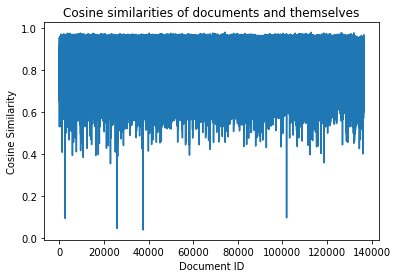

In [11]:
plt.plot(range(len(documents)), doc_similarities)
plt.xlabel('Document ID')
plt.ylabel('Cosine Similarity')
plt.title('Cosine similarities of documents and themselves')
plt.show()

### 进行推荐

In [12]:
model = Doc2Vec(vector_size=100, window=3, min_count=10, workers=4, epochs=500)

2022-05-26 15:06:29,593 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec(dm/m,d100,n5,w3,mc10,s0.001,t4)', 'datetime': '2022-05-26T15:06:29.593402', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}


In [13]:
model.build_vocab(documents)

2022-05-26 15:06:30,335 : INFO : collecting all words and their counts
2022-05-26 15:06:30,337 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2022-05-26 15:06:30,481 : INFO : PROGRESS: at example #10000, processed 58495 words (414322/s), 8444 word types, 0 tags
2022-05-26 15:06:30,502 : INFO : PROGRESS: at example #20000, processed 119066 words (2754153/s), 14182 word types, 0 tags
2022-05-26 15:06:30,525 : INFO : PROGRESS: at example #30000, processed 182038 words (2811576/s), 20375 word types, 0 tags
2022-05-26 15:06:30,552 : INFO : PROGRESS: at example #40000, processed 247145 words (2558935/s), 27163 word types, 0 tags
2022-05-26 15:06:30,576 : INFO : PROGRESS: at example #50000, processed 310852 words (2655188/s), 33299 word types, 0 tags
2022-05-26 15:06:30,602 : INFO : PROGRESS: at example #60000, processed 372821 words (2508805/s), 38509 word types, 0 tags
2022-05-26 15:06:30,625 : INFO : PROGRESS: at example #70000, processed 432306 words (2636

In [14]:
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

2022-05-26 15:06:31,602 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 4295 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=3 shrink_windows=True', 'datetime': '2022-05-26T15:06:31.602575', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'train'}
2022-05-26 15:06:32,788 : INFO : EPOCH 1 - PROGRESS: at 15.84% examples, 75289 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:06:33,994 : INFO : EPOCH 1 - PROGRESS: at 34.24% examples, 81808 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:06:35,209 : INFO : EPOCH 1 - PROGRESS: at 53.53% examples, 84265 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:06:36,244 : INFO : EPOCH 1 - PROGRESS: at 72.61% examples, 88142 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:06:37,356 : INFO : EPOCH 1 - PROGRESS: at 89.05% examples, 86752 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:06:37,770 : INFO : worke

2022-05-26 15:07:19,888 : INFO : EPOCH 8 - PROGRESS: at 47.22% examples, 82365 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:07:20,891 : INFO : EPOCH 8 - PROGRESS: at 60.09% examples, 79845 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:07:21,960 : INFO : EPOCH 8 - PROGRESS: at 76.83% examples, 81754 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:07:22,982 : INFO : EPOCH 8 - PROGRESS: at 89.94% examples, 79572 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:07:23,349 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:07:23,375 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:07:23,405 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:07:23,415 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:07:23,415 : INFO : EPOCH - 8 : training on 804638 raw words (549073 effective words) took 6.8s, 81141 effective words/s
2022-05-26 15:07:24,710 : INFO : EPOCH 9 - PROGRESS: a

2022-05-26 15:08:07,610 : INFO : EPOCH - 15 : training on 804638 raw words (549136 effective words) took 6.3s, 86793 effective words/s
2022-05-26 15:08:08,819 : INFO : EPOCH 16 - PROGRESS: at 15.84% examples, 73350 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:08:09,939 : INFO : EPOCH 16 - PROGRESS: at 34.24% examples, 83648 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:08:10,953 : INFO : EPOCH 16 - PROGRESS: at 50.98% examples, 86501 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:08:12,098 : INFO : EPOCH 16 - PROGRESS: at 69.64% examples, 86537 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:08:13,101 : INFO : EPOCH 16 - PROGRESS: at 86.12% examples, 88211 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:08:13,746 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:08:13,779 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:08:13,808 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:08:13,823 : I

2022-05-26 15:08:57,596 : INFO : EPOCH 23 - PROGRESS: at 95.05% examples, 83098 words/s, in_qsize 3, out_qsize 1
2022-05-26 15:08:57,596 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:08:57,644 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:08:57,660 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:08:57,670 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:08:57,670 : INFO : EPOCH - 23 : training on 804638 raw words (549123 effective words) took 6.5s, 84915 effective words/s
2022-05-26 15:08:58,927 : INFO : EPOCH 24 - PROGRESS: at 15.84% examples, 70299 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:09:00,013 : INFO : EPOCH 24 - PROGRESS: at 34.24% examples, 83080 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:09:01,024 : INFO : EPOCH 24 - PROGRESS: at 49.71% examples, 83991 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:09:02,096 : INFO : EPOCH 24 - PROGR

2022-05-26 15:09:44,809 : INFO : EPOCH 31 - PROGRESS: at 48.47% examples, 83628 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:09:45,842 : INFO : EPOCH 31 - PROGRESS: at 64.74% examples, 83542 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:09:47,023 : INFO : EPOCH 31 - PROGRESS: at 83.21% examples, 85448 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:09:47,692 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:09:47,744 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:09:47,765 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:09:47,777 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:09:47,778 : INFO : EPOCH - 31 : training on 804638 raw words (548280 effective words) took 6.2s, 87851 effective words/s
2022-05-26 15:09:48,931 : INFO : EPOCH 32 - PROGRESS: at 15.84% examples, 76905 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:09:49,937 : INFO : EPOCH 32 - PROGR

2022-05-26 15:10:32,260 : INFO : EPOCH - 38 : training on 804638 raw words (548913 effective words) took 6.4s, 85176 effective words/s
2022-05-26 15:10:33,411 : INFO : EPOCH 39 - PROGRESS: at 15.84% examples, 77089 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:10:34,600 : INFO : EPOCH 39 - PROGRESS: at 34.24% examples, 83373 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:10:35,615 : INFO : EPOCH 39 - PROGRESS: at 49.71% examples, 84121 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:10:36,630 : INFO : EPOCH 39 - PROGRESS: at 64.74% examples, 82682 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:10:37,665 : INFO : EPOCH 39 - PROGRESS: at 81.72% examples, 85773 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:10:38,589 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:10:38,639 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:10:38,653 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:10:38,668 : I

2022-05-26 15:11:22,728 : INFO : EPOCH 46 - PROGRESS: at 69.64% examples, 82316 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:11:23,860 : INFO : EPOCH 46 - PROGRESS: at 89.05% examples, 85157 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:11:24,304 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:11:24,326 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:11:24,352 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:11:24,369 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:11:24,369 : INFO : EPOCH - 46 : training on 804638 raw words (548852 effective words) took 6.3s, 86468 effective words/s
2022-05-26 15:11:25,607 : INFO : EPOCH 47 - PROGRESS: at 15.84% examples, 71419 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:11:26,773 : INFO : EPOCH 47 - PROGRESS: at 34.24% examples, 80940 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:11:27,789 : INFO : EPOCH 47 - PROGR

2022-05-26 15:12:10,437 : INFO : EPOCH - 53 : training on 804638 raw words (549033 effective words) took 6.7s, 81352 effective words/s
2022-05-26 15:12:11,466 : INFO : EPOCH 54 - PROGRESS: at 14.76% examples, 80454 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:12:12,654 : INFO : EPOCH 54 - PROGRESS: at 29.63% examples, 76376 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:12:13,670 : INFO : EPOCH 54 - PROGRESS: at 45.98% examples, 80945 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:12:14,964 : INFO : EPOCH 54 - PROGRESS: at 64.08% examples, 79818 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:12:16,143 : INFO : EPOCH 54 - PROGRESS: at 83.21% examples, 82556 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:12:16,829 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:12:16,892 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:12:16,911 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:12:16,923 : I

2022-05-26 15:13:00,552 : INFO : EPOCH 61 - PROGRESS: at 78.07% examples, 84793 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:13:01,578 : INFO : EPOCH 61 - PROGRESS: at 93.52% examples, 84134 words/s, in_qsize 4, out_qsize 0
2022-05-26 15:13:01,769 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:13:01,803 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:13:01,852 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:13:01,859 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:13:01,859 : INFO : EPOCH - 61 : training on 804638 raw words (548914 effective words) took 6.5s, 84328 effective words/s
2022-05-26 15:13:03,135 : INFO : EPOCH 62 - PROGRESS: at 15.91% examples, 69759 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:13:04,339 : INFO : EPOCH 62 - PROGRESS: at 34.24% examples, 78789 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:13:05,356 : INFO : EPOCH 62 - PROGR

2022-05-26 15:13:47,738 : INFO : EPOCH 69 - PROGRESS: at 15.84% examples, 73058 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:13:48,954 : INFO : EPOCH 69 - PROGRESS: at 34.24% examples, 80273 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:13:49,977 : INFO : EPOCH 69 - PROGRESS: at 48.47% examples, 79674 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:13:51,044 : INFO : EPOCH 69 - PROGRESS: at 64.74% examples, 79914 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:13:52,302 : INFO : EPOCH 69 - PROGRESS: at 83.21% examples, 81380 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:13:52,954 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:13:53,001 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:13:53,021 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:13:53,039 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:13:53,040 : INFO : EPOCH - 69 : training on 804638 raw wo

2022-05-26 15:14:35,993 : INFO : EPOCH 76 - PROGRESS: at 48.47% examples, 82036 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:14:37,058 : INFO : EPOCH 76 - PROGRESS: at 64.08% examples, 81626 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:14:38,294 : INFO : EPOCH 76 - PROGRESS: at 83.21% examples, 83163 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:14:38,957 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:14:38,978 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:14:39,012 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:14:39,027 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:14:39,028 : INFO : EPOCH - 76 : training on 804638 raw words (548656 effective words) took 6.4s, 86066 effective words/s
2022-05-26 15:14:40,258 : INFO : EPOCH 77 - PROGRESS: at 15.84% examples, 72262 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:14:41,377 : INFO : EPOCH 77 - PROGR

2022-05-26 15:15:24,732 : INFO : EPOCH 84 - PROGRESS: at 15.84% examples, 70971 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:15:25,892 : INFO : EPOCH 84 - PROGRESS: at 34.24% examples, 80885 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:15:26,904 : INFO : EPOCH 84 - PROGRESS: at 50.98% examples, 84502 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:15:27,908 : INFO : EPOCH 84 - PROGRESS: at 67.03% examples, 84617 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:15:29,090 : INFO : EPOCH 84 - PROGRESS: at 83.21% examples, 83886 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:15:29,761 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:15:29,792 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:15:29,849 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:15:29,859 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:15:29,859 : INFO : EPOCH - 84 : training on 804638 raw wo

2022-05-26 15:16:14,675 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:16:14,688 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:16:14,703 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:16:14,703 : INFO : EPOCH - 91 : training on 804638 raw words (548741 effective words) took 6.3s, 87017 effective words/s
2022-05-26 15:16:15,944 : INFO : EPOCH 92 - PROGRESS: at 15.84% examples, 71221 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:16:17,157 : INFO : EPOCH 92 - PROGRESS: at 34.24% examples, 79445 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:16:18,162 : INFO : EPOCH 92 - PROGRESS: at 50.96% examples, 83602 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:16:19,183 : INFO : EPOCH 92 - PROGRESS: at 65.75% examples, 82118 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:16:20,356 : INFO : EPOCH 92 - PROGRESS: at 83.21% examples, 83219 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:16:21,080 : I

2022-05-26 15:17:01,897 : INFO : EPOCH 99 - PROGRESS: at 15.84% examples, 70419 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:17:03,010 : INFO : EPOCH 99 - PROGRESS: at 34.24% examples, 82261 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:17:04,025 : INFO : EPOCH 99 - PROGRESS: at 49.71% examples, 83327 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:17:05,048 : INFO : EPOCH 99 - PROGRESS: at 68.71% examples, 86631 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:17:06,172 : INFO : EPOCH 99 - PROGRESS: at 83.21% examples, 85009 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:17:06,864 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:17:06,897 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:17:06,929 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:17:06,939 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:17:06,939 : INFO : EPOCH - 99 : training on 804638 raw wo

2022-05-26 15:17:52,706 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:17:52,734 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:17:52,765 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:17:52,775 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:17:52,775 : INFO : EPOCH - 106 : training on 804638 raw words (548977 effective words) took 6.6s, 83139 effective words/s
2022-05-26 15:17:54,018 : INFO : EPOCH 107 - PROGRESS: at 15.84% examples, 71373 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:17:55,198 : INFO : EPOCH 107 - PROGRESS: at 34.24% examples, 80615 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:17:56,438 : INFO : EPOCH 107 - PROGRESS: at 53.53% examples, 82842 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:17:57,443 : INFO : EPOCH 107 - PROGRESS: at 69.64% examples, 83247 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:17:58,480 : INFO : EPOCH 107 -

2022-05-26 15:18:39,206 : INFO : EPOCH - 113 : training on 804638 raw words (548893 effective words) took 6.5s, 84389 effective words/s
2022-05-26 15:18:40,457 : INFO : EPOCH 114 - PROGRESS: at 15.84% examples, 70824 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:18:41,498 : INFO : EPOCH 114 - PROGRESS: at 30.79% examples, 76419 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:18:42,506 : INFO : EPOCH 114 - PROGRESS: at 43.64% examples, 74975 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:18:43,512 : INFO : EPOCH 114 - PROGRESS: at 58.76% examples, 77182 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:18:44,547 : INFO : EPOCH 114 - PROGRESS: at 76.83% examples, 81535 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:18:45,667 : INFO : EPOCH 114 - PROGRESS: at 93.52% examples, 81295 words/s, in_qsize 4, out_qsize 0
2022-05-26 15:18:45,806 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:18:45,845 : INFO : worker thread finished; awaiting finish of 2 more thread

2022-05-26 15:19:27,357 : INFO : EPOCH 121 - PROGRESS: at 31.95% examples, 81682 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:19:28,531 : INFO : EPOCH 121 - PROGRESS: at 48.47% examples, 80902 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:19:29,600 : INFO : EPOCH 121 - PROGRESS: at 64.74% examples, 80824 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:19:30,851 : INFO : EPOCH 121 - PROGRESS: at 83.21% examples, 82249 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:19:31,577 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:19:31,605 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:19:31,632 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:19:31,640 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:19:31,641 : INFO : EPOCH - 121 : training on 804638 raw words (549327 effective words) took 6.5s, 84494 effective words/s
2022-05-26 15:19:32,674 : INFO : EPOCH 122 -

2022-05-26 15:20:16,955 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:20:16,965 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:20:16,980 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:20:16,981 : INFO : EPOCH - 128 : training on 804638 raw words (548764 effective words) took 6.7s, 82516 effective words/s
2022-05-26 15:20:18,225 : INFO : EPOCH 129 - PROGRESS: at 15.84% examples, 71306 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:20:19,425 : INFO : EPOCH 129 - PROGRESS: at 34.24% examples, 79835 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:20:20,437 : INFO : EPOCH 129 - PROGRESS: at 50.96% examples, 83692 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:20:21,442 : INFO : EPOCH 129 - PROGRESS: at 65.36% examples, 82432 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:20:22,672 : INFO : EPOCH 129 - PROGRESS: at 83.21% examples, 82695 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:20:23,4

2022-05-26 15:21:04,684 : INFO : EPOCH 136 - PROGRESS: at 25.22% examples, 67636 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:21:05,721 : INFO : EPOCH 136 - PROGRESS: at 40.04% examples, 72448 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:21:06,731 : INFO : EPOCH 136 - PROGRESS: at 57.45% examples, 78327 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:21:07,929 : INFO : EPOCH 136 - PROGRESS: at 73.71% examples, 77599 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:21:08,963 : INFO : EPOCH 136 - PROGRESS: at 89.05% examples, 78097 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:21:09,338 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:21:09,379 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:21:09,415 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:21:09,422 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:21:09,423 : INFO : EPOCH - 136 : training on 804638 

2022-05-26 15:21:53,868 : INFO : EPOCH 143 - PROGRESS: at 76.83% examples, 82539 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:21:55,015 : INFO : EPOCH 143 - PROGRESS: at 93.52% examples, 81761 words/s, in_qsize 4, out_qsize 0
2022-05-26 15:21:55,168 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:21:55,193 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:21:55,229 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:21:55,235 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:21:55,235 : INFO : EPOCH - 143 : training on 804638 raw words (549069 effective words) took 6.6s, 82806 effective words/s
2022-05-26 15:21:56,267 : INFO : EPOCH 144 - PROGRESS: at 11.20% examples, 59552 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:21:57,269 : INFO : EPOCH 144 - PROGRESS: at 27.36% examples, 76660 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:21:58,478 : INFO : EPOCH 144 -

2022-05-26 15:22:40,427 : INFO : EPOCH 150 - PROGRESS: at 100.00% examples, 84018 words/s, in_qsize 0, out_qsize 1
2022-05-26 15:22:40,428 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:22:40,428 : INFO : EPOCH - 150 : training on 804638 raw words (549059 effective words) took 6.5s, 84008 effective words/s
2022-05-26 15:22:41,469 : INFO : EPOCH 151 - PROGRESS: at 13.60% examples, 72570 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:22:42,652 : INFO : EPOCH 151 - PROGRESS: at 29.63% examples, 76090 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:22:43,677 : INFO : EPOCH 151 - PROGRESS: at 46.07% examples, 80576 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:22:44,703 : INFO : EPOCH 151 - PROGRESS: at 63.07% examples, 82947 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:22:45,761 : INFO : EPOCH 151 - PROGRESS: at 78.17% examples, 83054 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:22:46,802 : INFO : EPOCH 151 - PROGRESS: at 95.05% examples, 83539 words/s

2022-05-26 15:23:29,491 : INFO : EPOCH 158 - PROGRESS: at 61.54% examples, 82551 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:23:30,576 : INFO : EPOCH 158 - PROGRESS: at 77.95% examples, 83590 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:23:31,624 : INFO : EPOCH 158 - PROGRESS: at 95.05% examples, 83955 words/s, in_qsize 3, out_qsize 1
2022-05-26 15:23:31,626 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:23:31,669 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:23:31,702 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:23:31,713 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:23:31,713 : INFO : EPOCH - 158 : training on 804638 raw words (548899 effective words) took 6.4s, 85590 effective words/s
2022-05-26 15:23:32,747 : INFO : EPOCH 159 - PROGRESS: at 12.34% examples, 65985 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:23:33,913 : INFO : EPOCH 159 -

2022-05-26 15:24:17,411 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:24:17,455 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:24:17,465 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:24:17,465 : INFO : EPOCH - 165 : training on 804638 raw words (548512 effective words) took 6.8s, 80611 effective words/s
2022-05-26 15:24:18,477 : INFO : EPOCH 166 - PROGRESS: at 14.76% examples, 80695 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:24:19,696 : INFO : EPOCH 166 - PROGRESS: at 29.63% examples, 75529 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:24:20,879 : INFO : EPOCH 166 - PROGRESS: at 48.47% examples, 80459 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:24:21,950 : INFO : EPOCH 166 - PROGRESS: at 64.35% examples, 80384 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:24:22,977 : INFO : EPOCH 166 - PROGRESS: at 81.72% examples, 84035 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:24:24,0

2022-05-26 15:25:04,099 : INFO : EPOCH 173 - PROGRESS: at 15.84% examples, 71967 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:25:05,305 : INFO : EPOCH 173 - PROGRESS: at 34.24% examples, 79953 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:25:06,321 : INFO : EPOCH 173 - PROGRESS: at 49.72% examples, 81653 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:25:07,340 : INFO : EPOCH 173 - PROGRESS: at 64.74% examples, 80759 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:25:08,349 : INFO : EPOCH 173 - PROGRESS: at 81.72% examples, 84576 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:25:09,243 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:25:09,263 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:25:09,302 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:25:09,308 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:25:09,308 : INFO : EPOCH - 173 : training on 804638 

2022-05-26 15:25:54,152 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:25:54,188 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:25:54,199 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:25:54,200 : INFO : EPOCH - 180 : training on 804638 raw words (548654 effective words) took 6.3s, 86780 effective words/s
2022-05-26 15:25:55,215 : INFO : EPOCH 181 - PROGRESS: at 11.20% examples, 60350 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:25:56,342 : INFO : EPOCH 181 - PROGRESS: at 29.63% examples, 78792 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:25:57,345 : INFO : EPOCH 181 - PROGRESS: at 46.07% examples, 83103 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:25:58,376 : INFO : EPOCH 181 - PROGRESS: at 63.07% examples, 84785 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:25:59,452 : INFO : EPOCH 181 - PROGRESS: at 78.07% examples, 84215 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:26:00,5

2022-05-26 15:26:41,010 : INFO : EPOCH 188 - PROGRESS: at 15.84% examples, 71839 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:26:42,203 : INFO : EPOCH 188 - PROGRESS: at 34.24% examples, 80365 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:26:43,463 : INFO : EPOCH 188 - PROGRESS: at 53.53% examples, 82228 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:26:44,508 : INFO : EPOCH 188 - PROGRESS: at 72.61% examples, 86339 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:26:45,529 : INFO : EPOCH 188 - PROGRESS: at 87.99% examples, 85502 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:26:46,128 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:26:46,151 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:26:46,177 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:26:46,189 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:26:46,190 : INFO : EPOCH - 188 : training on 804638 

2022-05-26 15:27:30,797 : INFO : EPOCH 195 - PROGRESS: at 76.83% examples, 81239 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:27:31,799 : INFO : EPOCH 195 - PROGRESS: at 92.50% examples, 81548 words/s, in_qsize 5, out_qsize 0
2022-05-26 15:27:32,096 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:27:32,132 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:27:32,163 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:27:32,174 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:27:32,175 : INFO : EPOCH - 195 : training on 804638 raw words (548708 effective words) took 6.7s, 81686 effective words/s
2022-05-26 15:27:33,396 : INFO : EPOCH 196 - PROGRESS: at 15.84% examples, 72626 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:27:34,588 : INFO : EPOCH 196 - PROGRESS: at 34.24% examples, 80791 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:27:35,884 : INFO : EPOCH 196 -

2022-05-26 15:28:18,681 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:28:18,702 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:28:18,714 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:28:18,715 : INFO : EPOCH - 202 : training on 804638 raw words (548868 effective words) took 6.6s, 83381 effective words/s
2022-05-26 15:28:19,955 : INFO : EPOCH 203 - PROGRESS: at 15.84% examples, 71518 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:28:21,085 : INFO : EPOCH 203 - PROGRESS: at 34.24% examples, 82303 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:28:22,088 : INFO : EPOCH 203 - PROGRESS: at 48.46% examples, 81554 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:28:23,138 : INFO : EPOCH 203 - PROGRESS: at 64.35% examples, 81594 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:28:24,370 : INFO : EPOCH 203 - PROGRESS: at 83.21% examples, 83196 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:28:25,1

2022-05-26 15:29:04,696 : INFO : EPOCH - 209 : training on 804638 raw words (549097 effective words) took 6.5s, 84790 effective words/s
2022-05-26 15:29:05,763 : INFO : EPOCH 210 - PROGRESS: at 11.17% examples, 57644 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:29:06,776 : INFO : EPOCH 210 - PROGRESS: at 26.28% examples, 71784 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:29:07,983 : INFO : EPOCH 210 - PROGRESS: at 43.64% examples, 75369 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:29:09,005 : INFO : EPOCH 210 - PROGRESS: at 58.76% examples, 77196 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:29:10,039 : INFO : EPOCH 210 - PROGRESS: at 76.83% examples, 81530 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:29:11,227 : INFO : EPOCH 210 - PROGRESS: at 93.52% examples, 80444 words/s, in_qsize 4, out_qsize 0
2022-05-26 15:29:11,408 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:29:11,434 : INFO : worker thread finished; awaiting finish of 2 more thread

2022-05-26 15:29:54,702 : INFO : EPOCH 217 - PROGRESS: at 52.23% examples, 85894 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:29:55,735 : INFO : EPOCH 217 - PROGRESS: at 68.71% examples, 85212 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:29:56,932 : INFO : EPOCH 217 - PROGRESS: at 83.21% examples, 82839 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:29:57,684 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:29:57,709 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:29:57,740 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:29:57,748 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:29:57,748 : INFO : EPOCH - 217 : training on 804638 raw words (548838 effective words) took 6.5s, 84688 effective words/s
2022-05-26 15:29:58,994 : INFO : EPOCH 218 - PROGRESS: at 15.84% examples, 70983 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:30:00,108 : INFO : EPOCH 218 -

2022-05-26 15:30:43,928 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:30:43,954 : INFO : EPOCH 224 - PROGRESS: at 97.77% examples, 82734 words/s, in_qsize 1, out_qsize 1
2022-05-26 15:30:43,955 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:30:43,969 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:30:43,970 : INFO : EPOCH - 224 : training on 804638 raw words (549311 effective words) took 6.6s, 83647 effective words/s
2022-05-26 15:30:45,010 : INFO : EPOCH 225 - PROGRESS: at 14.76% examples, 79134 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:30:46,218 : INFO : EPOCH 225 - PROGRESS: at 29.63% examples, 75250 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:30:47,235 : INFO : EPOCH 225 - PROGRESS: at 44.84% examples, 78051 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:30:48,258 : INFO : EPOCH 225 - PROGRESS: at 61.54% examples, 81079 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:30:49,4

2022-05-26 15:31:30,238 : INFO : EPOCH - 231 : training on 804638 raw words (549310 effective words) took 6.5s, 83904 effective words/s
2022-05-26 15:31:31,537 : INFO : EPOCH 232 - PROGRESS: at 15.84% examples, 68114 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:31:32,559 : INFO : EPOCH 232 - PROGRESS: at 30.79% examples, 75459 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:31:33,570 : INFO : EPOCH 232 - PROGRESS: at 47.22% examples, 80371 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:31:34,585 : INFO : EPOCH 232 - PROGRESS: at 63.07% examples, 81346 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:31:35,727 : INFO : EPOCH 232 - PROGRESS: at 77.95% examples, 80476 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:31:36,731 : INFO : EPOCH 232 - PROGRESS: at 93.52% examples, 80808 words/s, in_qsize 4, out_qsize 0
2022-05-26 15:31:36,892 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:31:36,899 : INFO : worker thread finished; awaiting finish of 2 more thread

2022-05-26 15:32:17,766 : INFO : EPOCH 239 - PROGRESS: at 13.50% examples, 73633 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:32:18,773 : INFO : EPOCH 239 - PROGRESS: at 27.36% examples, 76793 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:32:20,001 : INFO : EPOCH 239 - PROGRESS: at 43.64% examples, 76039 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:32:21,020 : INFO : EPOCH 239 - PROGRESS: at 58.76% examples, 77813 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:32:22,077 : INFO : EPOCH 239 - PROGRESS: at 76.83% examples, 81657 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:32:23,195 : INFO : EPOCH 239 - PROGRESS: at 93.52% examples, 81424 words/s, in_qsize 4, out_qsize 0
2022-05-26 15:32:23,340 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:32:23,386 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:32:23,397 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:32:23,408 : INFO : worker thr

2022-05-26 15:33:07,444 : INFO : EPOCH 246 - PROGRESS: at 64.74% examples, 81970 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:33:08,677 : INFO : EPOCH 246 - PROGRESS: at 83.21% examples, 83408 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:33:09,444 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:33:09,476 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:33:09,503 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:33:09,519 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:33:09,521 : INFO : EPOCH - 246 : training on 804638 raw words (548963 effective words) took 6.5s, 84848 effective words/s
2022-05-26 15:33:10,549 : INFO : EPOCH 247 - PROGRESS: at 11.17% examples, 59683 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:33:11,724 : INFO : EPOCH 247 - PROGRESS: at 29.63% examples, 76704 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:33:12,728 : INFO : EPOCH 247 -

2022-05-26 15:33:55,528 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:33:55,545 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:33:55,593 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:33:55,602 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:33:55,603 : INFO : EPOCH - 253 : training on 804638 raw words (549323 effective words) took 6.8s, 80977 effective words/s
2022-05-26 15:33:56,896 : INFO : EPOCH 254 - PROGRESS: at 15.84% examples, 68411 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:33:58,069 : INFO : EPOCH 254 - PROGRESS: at 34.24% examples, 78984 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:33:59,127 : INFO : EPOCH 254 - PROGRESS: at 50.96% examples, 81991 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:34:00,143 : INFO : EPOCH 254 - PROGRESS: at 64.74% examples, 79525 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:34:01,194 : INFO : EPOCH 254 -

2022-05-26 15:34:42,502 : INFO : EPOCH 261 - PROGRESS: at 15.84% examples, 71203 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:34:43,699 : INFO : EPOCH 261 - PROGRESS: at 34.24% examples, 79870 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:34:44,702 : INFO : EPOCH 261 - PROGRESS: at 52.23% examples, 86038 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:34:45,708 : INFO : EPOCH 261 - PROGRESS: at 67.03% examples, 84212 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:34:46,874 : INFO : EPOCH 261 - PROGRESS: at 83.21% examples, 83780 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:34:47,619 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:34:47,660 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:34:47,717 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:34:47,726 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:34:47,727 : INFO : EPOCH - 261 : training on 804638 

2022-05-26 15:35:31,586 : INFO : EPOCH 268 - PROGRESS: at 65.75% examples, 83529 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:35:32,813 : INFO : EPOCH 268 - PROGRESS: at 83.21% examples, 83557 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:35:33,491 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:35:33,516 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:35:33,548 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:35:33,560 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:35:33,561 : INFO : EPOCH - 268 : training on 804638 raw words (549011 effective words) took 6.4s, 86274 effective words/s
2022-05-26 15:35:34,748 : INFO : EPOCH 269 - PROGRESS: at 15.84% examples, 74544 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:35:35,909 : INFO : EPOCH 269 - PROGRESS: at 34.24% examples, 83028 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:35:37,135 : INFO : EPOCH 269 -

2022-05-26 15:36:19,100 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:36:19,137 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:36:19,146 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:36:19,147 : INFO : EPOCH - 275 : training on 804638 raw words (548969 effective words) took 7.1s, 77550 effective words/s
2022-05-26 15:36:20,184 : INFO : EPOCH 276 - PROGRESS: at 12.34% examples, 65690 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:36:21,213 : INFO : EPOCH 276 - PROGRESS: at 26.31% examples, 72071 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:36:22,217 : INFO : EPOCH 276 - PROGRESS: at 42.42% examples, 78402 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:36:23,459 : INFO : EPOCH 276 - PROGRESS: at 58.76% examples, 77058 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:36:24,483 : INFO : EPOCH 276 - PROGRESS: at 76.83% examples, 81567 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:36:25,5

2022-05-26 15:37:06,178 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:37:06,217 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:37:06,231 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:37:06,244 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:37:06,244 : INFO : EPOCH - 282 : training on 804638 raw words (549068 effective words) took 6.5s, 83920 effective words/s
2022-05-26 15:37:07,462 : INFO : EPOCH 283 - PROGRESS: at 15.84% examples, 72618 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:37:08,469 : INFO : EPOCH 283 - PROGRESS: at 33.13% examples, 84731 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:37:09,641 : INFO : EPOCH 283 - PROGRESS: at 48.47% examples, 80975 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:37:10,736 : INFO : EPOCH 283 - PROGRESS: at 64.74% examples, 80432 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:37:11,817 : INFO : EPOCH 283 -

2022-05-26 15:37:54,962 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:37:54,992 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:37:55,019 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:37:55,031 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:37:55,031 : INFO : EPOCH - 289 : training on 804638 raw words (548598 effective words) took 6.8s, 80823 effective words/s
2022-05-26 15:37:56,042 : INFO : EPOCH 290 - PROGRESS: at 13.50% examples, 73988 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:37:57,220 : INFO : EPOCH 290 - PROGRESS: at 29.63% examples, 76968 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:37:58,290 : INFO : EPOCH 290 - PROGRESS: at 43.64% examples, 75883 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:37:59,337 : INFO : EPOCH 290 - PROGRESS: at 58.76% examples, 77166 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:38:00,369 : INFO : EPOCH 290 -

2022-05-26 15:38:42,496 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:38:42,512 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:38:42,557 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:38:42,561 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:38:42,561 : INFO : EPOCH - 296 : training on 804638 raw words (549499 effective words) took 6.6s, 83584 effective words/s
2022-05-26 15:38:43,807 : INFO : EPOCH 297 - PROGRESS: at 15.84% examples, 70931 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:38:45,029 : INFO : EPOCH 297 - PROGRESS: at 34.24% examples, 78901 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:38:46,302 : INFO : EPOCH 297 - PROGRESS: at 53.54% examples, 81035 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:38:47,378 : INFO : EPOCH 297 - PROGRESS: at 69.64% examples, 80526 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:38:48,386 : INFO : EPOCH 297 -

2022-05-26 15:39:30,737 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:39:30,764 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:39:30,777 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:39:30,777 : INFO : EPOCH - 303 : training on 804638 raw words (548424 effective words) took 6.6s, 82629 effective words/s
2022-05-26 15:39:32,006 : INFO : EPOCH 304 - PROGRESS: at 15.84% examples, 72132 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:39:33,036 : INFO : EPOCH 304 - PROGRESS: at 33.13% examples, 83427 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:39:34,276 : INFO : EPOCH 304 - PROGRESS: at 48.47% examples, 78589 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:39:35,504 : INFO : EPOCH 304 - PROGRESS: at 64.75% examples, 76428 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:39:36,692 : INFO : EPOCH 304 - PROGRESS: at 83.21% examples, 79532 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:39:37,3

2022-05-26 15:40:19,218 : INFO : EPOCH 311 - PROGRESS: at 46.07% examples, 83130 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:40:20,226 : INFO : EPOCH 311 - PROGRESS: at 61.54% examples, 83593 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:40:21,419 : INFO : EPOCH 311 - PROGRESS: at 78.07% examples, 82712 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:40:22,466 : INFO : EPOCH 311 - PROGRESS: at 95.05% examples, 83228 words/s, in_qsize 3, out_qsize 1
2022-05-26 15:40:22,468 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:40:22,504 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:40:22,535 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:40:22,545 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:40:22,546 : INFO : EPOCH - 311 : training on 804638 raw words (548849 effective words) took 6.5s, 84966 effective words/s
2022-05-26 15:40:23,571 : INFO : EPOCH 312 -

2022-05-26 15:41:08,663 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:41:08,693 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:41:08,719 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:41:08,733 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:41:08,733 : INFO : EPOCH - 318 : training on 804638 raw words (549032 effective words) took 6.8s, 81027 effective words/s
2022-05-26 15:41:09,945 : INFO : EPOCH 319 - PROGRESS: at 15.84% examples, 73034 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:41:10,960 : INFO : EPOCH 319 - PROGRESS: at 33.13% examples, 84582 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:41:12,128 : INFO : EPOCH 319 - PROGRESS: at 48.47% examples, 80961 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:41:13,299 : INFO : EPOCH 319 - PROGRESS: at 64.74% examples, 79057 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:41:14,394 : INFO : EPOCH 319 -

2022-05-26 15:41:53,937 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:41:53,937 : INFO : EPOCH - 325 : training on 804638 raw words (549152 effective words) took 6.5s, 85072 effective words/s
2022-05-26 15:41:55,206 : INFO : EPOCH 326 - PROGRESS: at 15.84% examples, 69900 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:41:56,371 : INFO : EPOCH 326 - PROGRESS: at 34.24% examples, 80090 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:41:57,380 : INFO : EPOCH 326 - PROGRESS: at 49.71% examples, 81925 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:41:58,406 : INFO : EPOCH 326 - PROGRESS: at 64.35% examples, 80770 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:41:59,623 : INFO : EPOCH 326 - PROGRESS: at 83.21% examples, 82732 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:42:00,289 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:42:00,330 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:42:00,3

2022-05-26 15:42:42,692 : INFO : EPOCH 333 - PROGRESS: at 47.22% examples, 85594 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:42:43,728 : INFO : EPOCH 333 - PROGRESS: at 63.07% examples, 84975 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:42:44,919 : INFO : EPOCH 333 - PROGRESS: at 77.95% examples, 82530 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:42:45,940 : INFO : EPOCH 333 - PROGRESS: at 93.52% examples, 82270 words/s, in_qsize 4, out_qsize 0
2022-05-26 15:42:46,059 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:42:46,117 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:42:46,130 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:42:46,142 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:42:46,143 : INFO : EPOCH - 333 : training on 804638 raw words (548626 effective words) took 6.6s, 83517 effective words/s
2022-05-26 15:42:47,365 : INFO : EPOCH 334 -

2022-05-26 15:43:31,391 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:43:31,410 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:43:31,427 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:43:31,443 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:43:31,443 : INFO : EPOCH - 340 : training on 804638 raw words (548918 effective words) took 6.3s, 86686 effective words/s
2022-05-26 15:43:32,676 : INFO : EPOCH 341 - PROGRESS: at 15.84% examples, 71780 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:43:33,699 : INFO : EPOCH 341 - PROGRESS: at 29.63% examples, 74757 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:43:34,725 : INFO : EPOCH 341 - PROGRESS: at 47.22% examples, 81612 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:43:35,739 : INFO : EPOCH 341 - PROGRESS: at 63.07% examples, 82365 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:43:36,807 : INFO : EPOCH 341 -

2022-05-26 15:44:18,428 : INFO : EPOCH 348 - PROGRESS: at 15.84% examples, 70852 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:44:19,567 : INFO : EPOCH 348 - PROGRESS: at 34.24% examples, 81613 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:44:20,601 : INFO : EPOCH 348 - PROGRESS: at 50.98% examples, 84417 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:44:21,691 : INFO : EPOCH 348 - PROGRESS: at 64.35% examples, 79897 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:44:22,932 : INFO : EPOCH 348 - PROGRESS: at 83.21% examples, 81733 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:44:23,663 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:44:23,702 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:44:23,723 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:44:23,738 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:44:23,738 : INFO : EPOCH - 348 : training on 804638 

2022-05-26 15:45:09,159 : INFO : EPOCH 355 - PROGRESS: at 77.95% examples, 80570 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:45:10,192 : INFO : EPOCH 355 - PROGRESS: at 93.52% examples, 80516 words/s, in_qsize 4, out_qsize 0
2022-05-26 15:45:10,344 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:45:10,383 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:45:10,410 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:45:10,426 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:45:10,427 : INFO : EPOCH - 355 : training on 804638 raw words (548904 effective words) took 6.7s, 81400 effective words/s
2022-05-26 15:45:11,481 : INFO : EPOCH 356 - PROGRESS: at 11.17% examples, 57981 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:45:12,707 : INFO : EPOCH 356 - PROGRESS: at 29.63% examples, 73930 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:45:13,712 : INFO : EPOCH 356 -

2022-05-26 15:45:57,507 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:45:57,532 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:45:57,590 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:45:57,595 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:45:57,595 : INFO : EPOCH - 362 : training on 804638 raw words (548656 effective words) took 6.5s, 84187 effective words/s
2022-05-26 15:45:58,812 : INFO : EPOCH 363 - PROGRESS: at 15.84% examples, 72559 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:45:59,995 : INFO : EPOCH 363 - PROGRESS: at 34.24% examples, 81113 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:46:01,005 : INFO : EPOCH 363 - PROGRESS: at 50.98% examples, 84745 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:46:02,193 : INFO : EPOCH 363 - PROGRESS: at 69.64% examples, 84403 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:46:03,207 : INFO : EPOCH 363 -

2022-05-26 15:46:44,696 : INFO : EPOCH 370 - PROGRESS: at 29.63% examples, 76865 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:46:45,714 : INFO : EPOCH 370 - PROGRESS: at 43.64% examples, 77101 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:46:46,717 : INFO : EPOCH 370 - PROGRESS: at 58.76% examples, 78889 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:46:47,734 : INFO : EPOCH 370 - PROGRESS: at 73.71% examples, 79353 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:46:48,764 : INFO : EPOCH 370 - PROGRESS: at 89.05% examples, 79592 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:46:49,228 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:46:49,249 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:46:49,275 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:46:49,282 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:46:49,283 : INFO : EPOCH - 370 : training on 804638 

2022-05-26 15:47:34,763 : INFO : EPOCH 377 - PROGRESS: at 95.05% examples, 81358 words/s, in_qsize 3, out_qsize 1
2022-05-26 15:47:34,764 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:47:34,811 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:47:34,840 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:47:34,848 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:47:34,848 : INFO : EPOCH - 377 : training on 804638 raw words (548887 effective words) took 6.6s, 83027 effective words/s
2022-05-26 15:47:36,104 : INFO : EPOCH 378 - PROGRESS: at 15.84% examples, 70541 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:47:37,252 : INFO : EPOCH 378 - PROGRESS: at 34.24% examples, 81065 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:47:38,485 : INFO : EPOCH 378 - PROGRESS: at 53.53% examples, 83338 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:47:39,505 : INFO : EPOCH 378 -

2022-05-26 15:48:20,827 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:48:20,863 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:48:20,874 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:48:20,875 : INFO : EPOCH - 384 : training on 804638 raw words (549297 effective words) took 6.7s, 81695 effective words/s
2022-05-26 15:48:22,198 : INFO : EPOCH 385 - PROGRESS: at 15.84% examples, 67034 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:48:23,411 : INFO : EPOCH 385 - PROGRESS: at 34.24% examples, 76930 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:48:24,424 : INFO : EPOCH 385 - PROGRESS: at 49.71% examples, 79535 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:48:25,459 : INFO : EPOCH 385 - PROGRESS: at 68.71% examples, 83359 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:48:26,465 : INFO : EPOCH 385 - PROGRESS: at 81.72% examples, 82928 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:48:27,5

2022-05-26 15:49:07,595 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:49:07,607 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:49:07,607 : INFO : EPOCH - 391 : training on 804638 raw words (549179 effective words) took 6.4s, 85145 effective words/s
2022-05-26 15:49:08,643 : INFO : EPOCH 392 - PROGRESS: at 13.60% examples, 72612 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:49:09,846 : INFO : EPOCH 392 - PROGRESS: at 29.63% examples, 75439 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:49:11,057 : INFO : EPOCH 392 - PROGRESS: at 48.47% examples, 79774 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:49:12,084 : INFO : EPOCH 392 - PROGRESS: at 64.35% examples, 80690 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:49:13,123 : INFO : EPOCH 392 - PROGRESS: at 81.72% examples, 84114 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:49:14,000 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:49:14,0

2022-05-26 15:49:56,415 : INFO : EPOCH 399 - PROGRESS: at 46.07% examples, 81715 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:49:57,425 : INFO : EPOCH 399 - PROGRESS: at 61.54% examples, 82506 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:49:58,571 : INFO : EPOCH 399 - PROGRESS: at 77.95% examples, 82586 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:49:59,781 : INFO : EPOCH 399 - PROGRESS: at 95.05% examples, 81054 words/s, in_qsize 3, out_qsize 1
2022-05-26 15:49:59,782 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:49:59,798 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:49:59,820 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:49:59,836 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:49:59,836 : INFO : EPOCH - 399 : training on 804638 raw words (548905 effective words) took 6.6s, 83097 effective words/s
2022-05-26 15:50:01,081 : INFO : EPOCH 400 -

2022-05-26 15:50:45,098 : INFO : EPOCH 406 - PROGRESS: at 92.50% examples, 82392 words/s, in_qsize 5, out_qsize 0
2022-05-26 15:50:45,405 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:50:45,421 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:50:45,449 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:50:45,461 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:50:45,461 : INFO : EPOCH - 406 : training on 804638 raw words (548345 effective words) took 6.6s, 82643 effective words/s
2022-05-26 15:50:46,538 : INFO : EPOCH 407 - PROGRESS: at 11.20% examples, 56711 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:50:47,548 : INFO : EPOCH 407 - PROGRESS: at 27.36% examples, 74565 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:50:48,779 : INFO : EPOCH 407 - PROGRESS: at 43.64% examples, 74651 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:50:49,858 : INFO : EPOCH 407 -

2022-05-26 15:51:32,086 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:51:32,095 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:51:32,096 : INFO : EPOCH - 413 : training on 804638 raw words (549222 effective words) took 6.6s, 83144 effective words/s
2022-05-26 15:51:33,110 : INFO : EPOCH 414 - PROGRESS: at 13.50% examples, 73976 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:51:34,314 : INFO : EPOCH 414 - PROGRESS: at 29.63% examples, 75960 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:51:35,595 : INFO : EPOCH 414 - PROGRESS: at 48.47% examples, 78503 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:51:36,603 : INFO : EPOCH 414 - PROGRESS: at 67.03% examples, 83048 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:51:37,807 : INFO : EPOCH 414 - PROGRESS: at 83.21% examples, 82326 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:51:38,649 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:51:38,6

2022-05-26 15:52:18,869 : INFO : EPOCH - 420 : training on 804638 raw words (548816 effective words) took 6.4s, 85991 effective words/s
2022-05-26 15:52:20,077 : INFO : EPOCH 421 - PROGRESS: at 15.84% examples, 73393 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:52:21,305 : INFO : EPOCH 421 - PROGRESS: at 34.24% examples, 80099 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:52:22,356 : INFO : EPOCH 421 - PROGRESS: at 50.98% examples, 82966 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:52:23,369 : INFO : EPOCH 421 - PROGRESS: at 67.70% examples, 83432 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:52:24,482 : INFO : EPOCH 421 - PROGRESS: at 83.21% examples, 83897 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:52:25,309 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:52:25,342 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:52:25,367 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:52:25,3

2022-05-26 15:53:06,169 : INFO : EPOCH 428 - PROGRESS: at 15.84% examples, 72047 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:53:07,353 : INFO : EPOCH 428 - PROGRESS: at 34.24% examples, 80708 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:53:08,390 : INFO : EPOCH 428 - PROGRESS: at 50.98% examples, 83737 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:53:09,504 : INFO : EPOCH 428 - PROGRESS: at 64.08% examples, 78960 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:53:10,699 : INFO : EPOCH 428 - PROGRESS: at 83.21% examples, 81622 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:53:11,473 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:53:11,494 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:53:11,511 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:53:11,527 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:53:11,527 : INFO : EPOCH - 428 : training on 804638 

2022-05-26 15:53:55,692 : INFO : EPOCH 435 - PROGRESS: at 64.08% examples, 79350 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:53:56,888 : INFO : EPOCH 435 - PROGRESS: at 83.21% examples, 81867 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:53:57,720 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:53:57,734 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:53:57,772 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:53:57,782 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:53:57,783 : INFO : EPOCH - 435 : training on 804638 raw words (549144 effective words) took 6.6s, 82869 effective words/s
2022-05-26 15:53:58,806 : INFO : EPOCH 436 - PROGRESS: at 13.50% examples, 73290 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:53:59,910 : INFO : EPOCH 436 - PROGRESS: at 29.63% examples, 79306 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:54:01,135 : INFO : EPOCH 436 -

2022-05-26 15:54:43,764 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:54:43,770 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:54:43,770 : INFO : EPOCH - 442 : training on 804638 raw words (548996 effective words) took 6.5s, 84221 effective words/s
2022-05-26 15:54:44,807 : INFO : EPOCH 443 - PROGRESS: at 13.50% examples, 72323 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:54:45,987 : INFO : EPOCH 443 - PROGRESS: at 29.63% examples, 76074 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:54:47,244 : INFO : EPOCH 443 - PROGRESS: at 48.47% examples, 79127 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:54:48,358 : INFO : EPOCH 443 - PROGRESS: at 64.08% examples, 78634 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:54:49,385 : INFO : EPOCH 443 - PROGRESS: at 81.72% examples, 82525 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:54:50,427 : INFO : EPOCH 443 - PROGRESS: at 95.05% examples, 79914 words/s, in_qsize 3, out_qsize 

2022-05-26 15:55:30,326 : INFO : EPOCH - 449 : training on 804638 raw words (548863 effective words) took 6.8s, 81274 effective words/s
2022-05-26 15:55:31,373 : INFO : EPOCH 450 - PROGRESS: at 11.20% examples, 58646 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:55:32,629 : INFO : EPOCH 450 - PROGRESS: at 29.63% examples, 73292 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:55:33,657 : INFO : EPOCH 450 - PROGRESS: at 44.84% examples, 76410 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:55:34,696 : INFO : EPOCH 450 - PROGRESS: at 58.76% examples, 76112 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:55:35,765 : INFO : EPOCH 450 - PROGRESS: at 76.83% examples, 80110 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:55:36,786 : INFO : EPOCH 450 - PROGRESS: at 91.61% examples, 79360 words/s, in_qsize 6, out_qsize 0
2022-05-26 15:55:37,145 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:55:37,194 : INFO : worker thread finished; awaiting finish of 2 more thread

2022-05-26 15:56:18,425 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:56:18,426 : INFO : EPOCH - 456 : training on 804638 raw words (549195 effective words) took 6.9s, 79975 effective words/s
2022-05-26 15:56:19,443 : INFO : EPOCH 457 - PROGRESS: at 12.34% examples, 67011 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:56:20,612 : INFO : EPOCH 457 - PROGRESS: at 29.63% examples, 77051 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:56:21,615 : INFO : EPOCH 457 - PROGRESS: at 43.64% examples, 77533 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:56:22,655 : INFO : EPOCH 457 - PROGRESS: at 58.76% examples, 78532 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:56:23,657 : INFO : EPOCH 457 - PROGRESS: at 74.56% examples, 80505 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:56:24,677 : INFO : EPOCH 457 - PROGRESS: at 89.05% examples, 79679 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:56:25,094 : INFO : worker thread finished; awaiting finish of 3 more thread

2022-05-26 15:57:06,750 : INFO : EPOCH - 463 : training on 804638 raw words (548636 effective words) took 7.0s, 78569 effective words/s
2022-05-26 15:57:07,782 : INFO : EPOCH 464 - PROGRESS: at 14.76% examples, 79347 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:57:08,784 : INFO : EPOCH 464 - PROGRESS: at 28.49% examples, 79836 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:57:09,788 : INFO : EPOCH 464 - PROGRESS: at 40.04% examples, 74888 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:57:10,900 : INFO : EPOCH 464 - PROGRESS: at 53.53% examples, 73050 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:57:11,912 : INFO : EPOCH 464 - PROGRESS: at 70.61% examples, 76541 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:57:12,964 : INFO : EPOCH 464 - PROGRESS: at 84.74% examples, 76887 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:57:13,701 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 15:57:13,719 : INFO : worker thread finished; awaiting finish of 2 more thread

2022-05-26 15:57:54,890 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:57:54,891 : INFO : EPOCH - 470 : training on 804638 raw words (548755 effective words) took 6.7s, 82130 effective words/s
2022-05-26 15:57:55,939 : INFO : EPOCH 471 - PROGRESS: at 11.20% examples, 58172 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:57:57,188 : INFO : EPOCH 471 - PROGRESS: at 29.63% examples, 73385 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:57:58,323 : INFO : EPOCH 471 - PROGRESS: at 43.64% examples, 72108 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:57:59,645 : INFO : EPOCH 471 - PROGRESS: at 64.08% examples, 75888 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:58:00,758 : INFO : EPOCH 471 - PROGRESS: at 81.72% examples, 79020 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:58:01,855 : INFO : EPOCH 471 - PROGRESS: at 95.05% examples, 76440 words/s, in_qsize 3, out_qsize 1
2022-05-26 15:58:01,856 : INFO : worker thread finished; awaiting finish of 3 more thread

2022-05-26 15:58:43,327 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:58:43,341 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:58:43,342 : INFO : EPOCH - 477 : training on 804638 raw words (549331 effective words) took 7.0s, 78218 effective words/s
2022-05-26 15:58:44,372 : INFO : EPOCH 478 - PROGRESS: at 13.60% examples, 73031 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:58:45,381 : INFO : EPOCH 478 - PROGRESS: at 26.28% examples, 73233 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:58:46,382 : INFO : EPOCH 478 - PROGRESS: at 42.42% examples, 79279 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:58:47,401 : INFO : EPOCH 478 - PROGRESS: at 57.45% examples, 80143 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:58:48,425 : INFO : EPOCH 478 - PROGRESS: at 69.64% examples, 76416 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:58:49,455 : INFO : EPOCH 478 - PROGRESS: at 83.21% examples, 76961 words/s, in_qsize 8, out_qsize 

2022-05-26 15:59:32,955 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 15:59:32,970 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 15:59:32,977 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 15:59:32,978 : INFO : EPOCH - 484 : training on 804638 raw words (548903 effective words) took 7.0s, 78234 effective words/s
2022-05-26 15:59:34,040 : INFO : EPOCH 485 - PROGRESS: at 11.20% examples, 57839 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:59:35,046 : INFO : EPOCH 485 - PROGRESS: at 28.49% examples, 78505 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:59:36,062 : INFO : EPOCH 485 - PROGRESS: at 42.42% examples, 78068 words/s, in_qsize 7, out_qsize 0
2022-05-26 15:59:37,099 : INFO : EPOCH 485 - PROGRESS: at 56.15% examples, 77070 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:59:38,106 : INFO : EPOCH 485 - PROGRESS: at 70.61% examples, 76996 words/s, in_qsize 8, out_qsize 0
2022-05-26 15:59:39,1

2022-05-26 16:00:22,029 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 16:00:22,051 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 16:00:22,086 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 16:00:22,092 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 16:00:22,093 : INFO : EPOCH - 491 : training on 804638 raw words (549007 effective words) took 6.9s, 79922 effective words/s
2022-05-26 16:00:23,120 : INFO : EPOCH 492 - PROGRESS: at 13.60% examples, 73213 words/s, in_qsize 7, out_qsize 0
2022-05-26 16:00:24,129 : INFO : EPOCH 492 - PROGRESS: at 26.31% examples, 73259 words/s, in_qsize 7, out_qsize 0
2022-05-26 16:00:25,136 : INFO : EPOCH 492 - PROGRESS: at 40.04% examples, 74758 words/s, in_qsize 7, out_qsize 0
2022-05-26 16:00:26,146 : INFO : EPOCH 492 - PROGRESS: at 53.53% examples, 74776 words/s, in_qsize 8, out_qsize 0
2022-05-26 16:00:27,215 : INFO : EPOCH 492 -

2022-05-26 16:01:11,169 : INFO : EPOCH 498 - PROGRESS: at 93.52% examples, 72435 words/s, in_qsize 4, out_qsize 0
2022-05-26 16:01:11,283 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-05-26 16:01:11,324 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-05-26 16:01:11,371 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-05-26 16:01:11,382 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-05-26 16:01:11,382 : INFO : EPOCH - 498 : training on 804638 raw words (549483 effective words) took 7.5s, 73681 effective words/s
2022-05-26 16:01:12,395 : INFO : EPOCH 499 - PROGRESS: at 13.50% examples, 73980 words/s, in_qsize 7, out_qsize 0
2022-05-26 16:01:13,409 : INFO : EPOCH 499 - PROGRESS: at 25.22% examples, 70109 words/s, in_qsize 8, out_qsize 0
2022-05-26 16:01:14,433 : INFO : EPOCH 499 - PROGRESS: at 38.89% examples, 72293 words/s, in_qsize 7, out_qsize 0
2022-05-26 16:01:15,490 : INFO : EPOCH 499 -

In [17]:
model.save('doc2vec.model')

2022-05-26 16:53:57,617 : INFO : Doc2Vec lifecycle event {'fname_or_handle': 'doc2vec.model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2022-05-26T16:53:57.617289', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'saving'}
2022-05-26 16:53:57,618 : INFO : storing np array 'vectors' to doc2vec.model.dv.vectors.npy
2022-05-26 16:53:58,023 : INFO : not storing attribute cum_table
2022-05-26 16:53:58,060 : INFO : saved doc2vec.model


In [6]:
model_load = Doc2Vec.load('doc2vec.model')

2022-05-30 09:44:47,942 : INFO : loading Doc2Vec object from doc2vec.model
2022-05-30 09:44:47,958 : INFO : loading dv recursively from doc2vec.model.dv.* with mmap=None
2022-05-30 09:44:47,959 : INFO : loading vectors from doc2vec.model.dv.vectors.npy with mmap=None
2022-05-30 09:44:47,988 : INFO : loading wv recursively from doc2vec.model.wv.* with mmap=None
2022-05-30 09:44:47,989 : INFO : setting ignored attribute cum_table to None
2022-05-30 09:44:48,030 : INFO : Doc2Vec lifecycle event {'fname': 'doc2vec.model', 'datetime': '2022-05-30T09:44:48.030020', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'loaded'}


In [7]:
len(documents)

136452

In [11]:
movieprofile_results = {}
for i in range(len(documents)):
    inferred_vector = model_load.infer_vector(documents[i].words)
    sims = model_load.dv.most_similar([inferred_vector], topn=13)
    similar_movies = []
    for j in range(13):
        if sims[j][0] != i:
            similar_movies.append(movie_profile.loc[sims[j][0], 'MOVIE_ID'])
    movie_id = movie_profile.loc[i, 'MOVIE_ID']
    movieprofile_results[str(movie_id)] = similar_movies

In [12]:
movieprofile_results

{'26670818': [26673217,
  26891379,
  26865401,
  30387531,
  2057414,
  24846472,
  11620521,
  26742358,
  25803264,
  26614406,
  26826430,
  20393807],
 '25815002': [26766776,
  26765299,
  5202069,
  26768302,
  5093006,
  6878152,
  26353083,
  26847650,
  26923885,
  27020924,
  26986776,
  26385780],
 '26392287': [30165116,
  5136572,
  30240092,
  30259856,
  34430800,
  25842553,
  5179473,
  5221217,
  5073495,
  5234161,
  10810241,
  33456508,
  5103170],
 '26695995': [27081612,
  34670708,
  1401185,
  27005803,
  11620521,
  27610689,
  4194881,
  25908082,
  30312126,
  27168914,
  25901742,
  26993150],
 '26392292': [32525237,
  30206414,
  26832792,
  5105697,
  26720316,
  3243778,
  3251878,
  5111178,
  30305912,
  33433180,
  5146791,
  5111493,
  27596876],
 '6389523': [1999243,
  5268684,
  5119140,
  6785085,
  25708029,
  30224741,
  3329068,
  1307085,
  3273023,
  27011008,
  22224731,
  1307720],
 '26266621': [24298329,
  26381372,
  2995790,
  30365411,
  

In [15]:
_movieprofile_results = {}
for key, value in movieprofile_results.items():
    _movieprofile_results[key] = [str(x) for x in value]

In [16]:
_movieprofile_results

{'26670818': ['26673217',
  '26891379',
  '26865401',
  '30387531',
  '2057414',
  '24846472',
  '11620521',
  '26742358',
  '25803264',
  '26614406',
  '26826430',
  '20393807'],
 '25815002': ['26766776',
  '26765299',
  '5202069',
  '26768302',
  '5093006',
  '6878152',
  '26353083',
  '26847650',
  '26923885',
  '27020924',
  '26986776',
  '26385780'],
 '26392287': ['30165116',
  '5136572',
  '30240092',
  '30259856',
  '34430800',
  '25842553',
  '5179473',
  '5221217',
  '5073495',
  '5234161',
  '10810241',
  '33456508',
  '5103170'],
 '26695995': ['27081612',
  '34670708',
  '1401185',
  '27005803',
  '11620521',
  '27610689',
  '4194881',
  '25908082',
  '30312126',
  '27168914',
  '25901742',
  '26993150'],
 '26392292': ['32525237',
  '30206414',
  '26832792',
  '5105697',
  '26720316',
  '3243778',
  '3251878',
  '5111178',
  '30305912',
  '33433180',
  '5146791',
  '5111493',
  '27596876'],
 '6389523': ['1999243',
  '5268684',
  '5119140',
  '6785085',
  '25708029',
  '30224

In [13]:
import json

In [17]:
with open('movieprofile_results.json', 'a') as file:
    file.write(json.dumps(_movieprofile_results))

In [20]:
inferred_vector = model.infer_vector(documents[0].words)
sims = model.dv.most_similar([inferred_vector], topn=13)
sims

[(0, 0.9004065990447998),
 (98802, 0.6803442239761353),
 (12213, 0.6234490275382996),
 (12906, 0.5952284336090088),
 (12424, 0.5887824296951294),
 (104656, 0.5653356909751892),
 (110245, 0.5630854964256287),
 (6546, 0.5615581274032593),
 (6827, 0.5605524778366089),
 (111462, 0.551439642906189),
 (110439, 0.5512404441833496),
 (125665, 0.5494812726974487),
 (8088, 0.5448407530784607)]

In [21]:
similar_movies = []
for i in range(13):
    if sims[i][0] != 0:
        similar_movies.append(sims[i][0])
similar_movies

[98802,
 12213,
 12906,
 12424,
 104656,
 110245,
 6546,
 6827,
 111462,
 110439,
 125665,
 8088]